#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=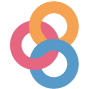)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
req

```
## <Response [200]>
```

Prenons par exemple les 1000 premiers caractères du résultat:


In [ ]:
print(req.content[:1000])

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="AGO">\r\n    <wb:iso2Code>AO</wb:iso2Code>\r\n    <wb:name>Angola</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Luanda</wb:capitalCity>\r\n    <wb:longitude>13.242</wb:longitude>\r\n    <wb:latitude>-8.81155</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BEN">\r\n    <wb:iso2Code>BJ</wb:iso2Code>\r\n    <wb:name>Benin</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="'

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(req.content[:1000])

b'[{"page":1,"pages":2,"per_page":"50","total":55},[{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Luanda","longitude":"13.242","latitude":"-8.81155"},{"id":"BEN","iso2Code":"BJ","name":"Benin","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Porto-Novo","longitude":"2.6323","latitude":"6.4779"},{"id":"BGD","iso2Code":"BD","name":"Bangladesh","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2'

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

```
##     id iso2Code  ... lendingType.iso2code lendingType.value
## 0  AGO       AO  ...                   XF              IBRD
## 1  BEN       BJ  ...                   XI               IDA
## 2  BGD       BD  ...                   XI               IDA
## 3  BLZ       BZ  ...                   XF              IBRD
## 4  BOL       BO  ...                   XF              IBRD
## 
## [5 rows x 18 columns]
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
##      id iso2Code  ... lendingType.iso2code lendingType.value
## 0   AGO       AO  ...                   XF              IBRD
## 1   BEN       BJ  ...                   XI               IDA
## 2   BGD       BD  ...                   XI               IDA
## 3   BLZ       BZ  ...                   XF              IBRD
## 4   BOL       BO  ...                   XF              IBRD
## 5   BTN       BT  ...                   XI               IDA
## 6   CIV       CI  ...                   XI               IDA
## 7   CMR       CM  ...                   XH             Blend
## 8   COG       CG  ...                   XH             Blend
## 9   COM       KM  ...                   XI               IDA
## 10  CPV       CV  ...                   XH             Blend
## 11  DJI       DJ  ...                   XI               IDA
## 12  DZA       DZ  ...                   XF              IBRD
## 13  EGY       EG  ...                   XF              IBRD
## 14  FSM       FM  ...                   XI               IDA
## 15  GHA       GH  ...                   XI               IDA
## 16  HND       HN  ...                   XI               IDA
## 17  HTI       HT  ...                   XI               IDA
## 18  IDN       ID  ...                   XF              IBRD
## 19  IND       IN  ...                   XF              IBRD
## 20  IRN       IR  ...                   XF              IBRD
## 21  KEN       KE  ...                   XH             Blend
## 22  KGZ       KG  ...                   XI               IDA
## 23  KHM       KH  ...                   XI               IDA
## 24  KIR       KI  ...                   XI               IDA
## 25  LAO       LA  ...                   XI               IDA
## 26  LKA       LK  ...                   XF              IBRD
## 27  LSO       LS  ...                   XI               IDA
## 28  MAR       MA  ...                   XF              IBRD
## 29  MMR       MM  ...                   XI               IDA
## 30  MNG       MN  ...                   XF              IBRD
## 31  MRT       MR  ...                   XI               IDA
## 32  NGA       NG  ...                   XH             Blend
## 33  NIC       NI  ...                   XI               IDA
## 34  NPL       NP  ...                   XI               IDA
## 35  PAK       PK  ...                   XH             Blend
## 36  PHL       PH  ...                   XF              IBRD
## 37  PNG       PG  ...                   XH             Blend
## 38  PSE       PS  ...                   XX    Not classified
## 39  SEN       SN  ...                   XI               IDA
## 40  SLB       SB  ...                   XI               IDA
## 41  SLV       SV  ...                   XF              IBRD
## 42  STP       ST  ...                   XI               IDA
## 43  SWZ       SZ  ...                   XF              IBRD
## 44  TJK       TJ  ...                   XI               IDA
## 45  TLS       TL  ...                   XH             Blend
## 46  TUN       TN  ...                   XF              IBRD
## 47  TZA       TZ  ...                   XI               IDA
## 48  UKR       UA  ...                   XF              IBRD
## 49  UZB       UZ  ...                   XH             Blend
## 0   VNM       VN  ...                   XF              IBRD
## 1   VUT       VU  ...                   XI               IDA
## 2   WSM       WS  ...                   XI               IDA
## 3   ZMB       ZM  ...                   XI               IDA
## 4   ZWE       ZW  ...                   XH             Blend
## 
## [55 rows x 18 columns]
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## True
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 


In [ ]:
# Question 1
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168").json()
data_immo.keys()

```
## dict_keys(['source', 'derniere_maj', 'licence', 'nb_resultats', 'resultats'])
```

In [ ]:
ventes = pd.json_normalize(data_immo["resultats"])

:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:


In [ ]:
# Question 2
maisons = requests.get("http://api.cquest.org/dvf?code_commune=29168&type_local=Maison").json()
pd.json_normalize(maisons["resultats"])

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


In [ ]:
import geopandas as gpd
plgf = gpd.read_file("https://geo.api.gouv.fr/communes/29168?fields=nom,code,codesPostaux,codeDepartement,codeRegion,population&format=geojson&geometry=contour")

:four:
Représenter l'histogramme des prix de vente


In [ ]:
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Avant de faire une carte, on va convertir 
les limites de la commune de Plogoff en geoJSON pour faciliter 
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):


In [ ]:
geo_j = plgf.to_json()

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter). 


In [ ]:
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_10b9a080ea3b4cd991723d8c9634eb8d%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_10b9a080ea3b4cd991723d8c9634eb8d%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_10b9a080ea3b4cd991723d8c9634eb8d%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_10b9a080ea3b4cd991723d8c9634eb8d%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.03477472157772%2C%20-4.671743032482598%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_7edf19c732ad444e825ec5aaf866f0db%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a85474b84aa244bd89087d4177032009%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b76c457dd9a4d58bb2e881074127546%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a85474b84aa244bd89087d4177032009.setIcon%28icon_3b76c457dd9a4d58bb2e881074127546%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_917ffb2ee95d450e850c8eb2da877dc8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b28fc634ce74de288a7d21035b65387%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b28fc634ce74de288a7d21035b65387%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20176000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_917ffb2ee95d450e850c8eb2da877dc8.setContent%28html_0b28fc634ce74de288a7d21035b65387%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a85474b84aa244bd89087d4177032009.bindPopup%28popup_917ffb2ee95d450e850c8eb2da877dc8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5178d503c1043ed9c2a7b7b5cfb1c77%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7371e1acfbf246769d0a23e3707182fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5178d503c1043ed9c2a7b7b5cfb1c77.setIcon%28icon_7371e1acfbf246769d0a23e3707182fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35a0af1a26164a22a4eb0309fc2788f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c98dfbc7afbb484b894f42b4ed062080%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c98dfbc7afbb484b894f42b4ed062080%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35a0af1a26164a22a4eb0309fc2788f9.setContent%28html_c98dfbc7afbb484b894f42b4ed062080%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5178d503c1043ed9c2a7b7b5cfb1c77.bindPopup%28popup_35a0af1a26164a22a4eb0309fc2788f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f3fc1d0f0a2d4f4785a0f3cc49476d81%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042296%2C%20-4.709488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60c19a3a26d344ee851bc6ce93a5c72e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f3fc1d0f0a2d4f4785a0f3cc49476d81.setIcon%28icon_60c19a3a26d344ee851bc6ce93a5c72e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e1ebf1c49f49440f847b670ea7a16094%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_710faeccddb54248b0f644e1281ba3f3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_710faeccddb54248b0f644e1281ba3f3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e1ebf1c49f49440f847b670ea7a16094.setContent%28html_710faeccddb54248b0f644e1281ba3f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f3fc1d0f0a2d4f4785a0f3cc49476d81.bindPopup%28popup_e1ebf1c49f49440f847b670ea7a16094%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f0ab0e10b7f84ffd845918b1ddf11d73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.043125%2C%20-4.706963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a99b956f5034772bf530bb545deb96e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f0ab0e10b7f84ffd845918b1ddf11d73.setIcon%28icon_7a99b956f5034772bf530bb545deb96e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_86f32597d7f64ba1abceb8194f5e87c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_edbe43cc9ded417bbcac4fcbedc43e10%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_edbe43cc9ded417bbcac4fcbedc43e10%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_86f32597d7f64ba1abceb8194f5e87c7.setContent%28html_edbe43cc9ded417bbcac4fcbedc43e10%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f0ab0e10b7f84ffd845918b1ddf11d73.bindPopup%28popup_86f32597d7f64ba1abceb8194f5e87c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_53bdb9fcf6d84c9ba7595ed21ea93050%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042232%2C%20-4.705553%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56be0f41f05e4b76b04d81372db16789%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_53bdb9fcf6d84c9ba7595ed21ea93050.setIcon%28icon_56be0f41f05e4b76b04d81372db16789%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3b6a0113ac504d0398263260a4450bd5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_19b05dc6486e4a03b25632a50c3cb0cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_19b05dc6486e4a03b25632a50c3cb0cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3b6a0113ac504d0398263260a4450bd5.setContent%28html_19b05dc6486e4a03b25632a50c3cb0cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_53bdb9fcf6d84c9ba7595ed21ea93050.bindPopup%28popup_3b6a0113ac504d0398263260a4450bd5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2900478b799c4db887e0fee9f7ae927a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042047%2C%20-4.705626%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_00a352b8343643fc8a2d33d43b2d6b87%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2900478b799c4db887e0fee9f7ae927a.setIcon%28icon_00a352b8343643fc8a2d33d43b2d6b87%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f91b9785680e40068e5ce25a8a6398d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d9aa7fe0329434d81aedc12f20cd352%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d9aa7fe0329434d81aedc12f20cd352%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f91b9785680e40068e5ce25a8a6398d5.setContent%28html_5d9aa7fe0329434d81aedc12f20cd352%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2900478b799c4db887e0fee9f7ae927a.bindPopup%28popup_f91b9785680e40068e5ce25a8a6398d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_581e3f6c90284bf59fb2cb616703ad3e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038236%2C%20-4.709329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_611c2f407f554b1c87cba50f339609e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_581e3f6c90284bf59fb2cb616703ad3e.setIcon%28icon_611c2f407f554b1c87cba50f339609e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_27c164b21cb048e3a9534357cd937472%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66bcbb95fa364a97af098217a320b2c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66bcbb95fa364a97af098217a320b2c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_27c164b21cb048e3a9534357cd937472.setContent%28html_66bcbb95fa364a97af098217a320b2c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_581e3f6c90284bf59fb2cb616703ad3e.bindPopup%28popup_27c164b21cb048e3a9534357cd937472%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c83f7affe8884faabbbf79c0b7bcc85e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038356%2C%20-4.709215%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12a7dee9da2d40cfa0d41618a9fc007d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c83f7affe8884faabbbf79c0b7bcc85e.setIcon%28icon_12a7dee9da2d40cfa0d41618a9fc007d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b049d5fb7764a19b72c94559b9c65a9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6eae2176f2db4d4798d717b597225e8d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6eae2176f2db4d4798d717b597225e8d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20220%20KREIZ%20AN%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b049d5fb7764a19b72c94559b9c65a9.setContent%28html_6eae2176f2db4d4798d717b597225e8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c83f7affe8884faabbbf79c0b7bcc85e.bindPopup%28popup_8b049d5fb7764a19b72c94559b9c65a9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1be8e8d94bd94070b08cd5318fcda1be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039437%2C%20-4.710305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c5b801a929d443d81633b4aa1417d6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1be8e8d94bd94070b08cd5318fcda1be.setIcon%28icon_3c5b801a929d443d81633b4aa1417d6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c4c2bb4b0de4306a22e7d06b173febc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04d265c514fb410cafe454648609c8c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04d265c514fb410cafe454648609c8c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c4c2bb4b0de4306a22e7d06b173febc.setContent%28html_04d265c514fb410cafe454648609c8c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1be8e8d94bd94070b08cd5318fcda1be.bindPopup%28popup_2c4c2bb4b0de4306a22e7d06b173febc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d55fc9a456f147238f53371f6e1aeca4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038782%2C%20-4.709152%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbcc365afd184f72a174d2f4c9654aa7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d55fc9a456f147238f53371f6e1aeca4.setIcon%28icon_fbcc365afd184f72a174d2f4c9654aa7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91a26224006e477a849951338811e6ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d69a33e0ca5b43529674c6ae762b468d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d69a33e0ca5b43529674c6ae762b468d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20215%20AR%20VEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91a26224006e477a849951338811e6ce.setContent%28html_d69a33e0ca5b43529674c6ae762b468d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d55fc9a456f147238f53371f6e1aeca4.bindPopup%28popup_91a26224006e477a849951338811e6ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cfa276680c4a4b8f9d56241866407102%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038442%2C%20-4.709021%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1506477e6d64cea9072b42fc69d1457%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cfa276680c4a4b8f9d56241866407102.setIcon%28icon_e1506477e6d64cea9072b42fc69d1457%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e565536a4b6d4d35bd11ccdfcf905592%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bc811a0d7613401c9b5f08d13b7af20c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bc811a0d7613401c9b5f08d13b7af20c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e565536a4b6d4d35bd11ccdfcf905592.setContent%28html_bc811a0d7613401c9b5f08d13b7af20c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cfa276680c4a4b8f9d56241866407102.bindPopup%28popup_e565536a4b6d4d35bd11ccdfcf905592%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_85aef9761ae442788147c0ccb11b7743%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038467%2C%20-4.708496%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9aed6cc7ec024587909c5cdca4205ce8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_85aef9761ae442788147c0ccb11b7743.setIcon%28icon_9aed6cc7ec024587909c5cdca4205ce8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dbdf3eba4f7d4e28b7252deae5a3ea1b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b941b2b00fbb4ac6a42e44b9c83fb5db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b941b2b00fbb4ac6a42e44b9c83fb5db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20208%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dbdf3eba4f7d4e28b7252deae5a3ea1b.setContent%28html_b941b2b00fbb4ac6a42e44b9c83fb5db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_85aef9761ae442788147c0ccb11b7743.bindPopup%28popup_dbdf3eba4f7d4e28b7252deae5a3ea1b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_03dbcdf1a7e34c39bf21b99742953323%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038626%2C%20-4.708192%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86ca05f3cad643f88cf23bb34bda4ea6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_03dbcdf1a7e34c39bf21b99742953323.setIcon%28icon_86ca05f3cad643f88cf23bb34bda4ea6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c7ac754acc90413da5946a6932982462%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25b056f4b6cd4221a0949d06f0862f0c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25b056f4b6cd4221a0949d06f0862f0c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20206%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c7ac754acc90413da5946a6932982462.setContent%28html_25b056f4b6cd4221a0949d06f0862f0c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_03dbcdf1a7e34c39bf21b99742953323.bindPopup%28popup_c7ac754acc90413da5946a6932982462%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77bc89efb6ee4a5fbd4cfd1ed1fbc7b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03872%2C%20-4.707889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e5f12d6c7e5644d1aa97e7f1ebde1a4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77bc89efb6ee4a5fbd4cfd1ed1fbc7b9.setIcon%28icon_e5f12d6c7e5644d1aa97e7f1ebde1a4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_02be9e6b63564859a1c00f7c74ea14f4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_28f811cc30fe4731996645890711e454%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_28f811cc30fe4731996645890711e454%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_02be9e6b63564859a1c00f7c74ea14f4.setContent%28html_28f811cc30fe4731996645890711e454%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77bc89efb6ee4a5fbd4cfd1ed1fbc7b9.bindPopup%28popup_02be9e6b63564859a1c00f7c74ea14f4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_167701e8f38e48d09376bba8c6afdd3a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039763%2C%20-4.706615%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_87be9d7e4e024c2882eb8d591b3ff1e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_167701e8f38e48d09376bba8c6afdd3a.setIcon%28icon_87be9d7e4e024c2882eb8d591b3ff1e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3359d4a41a3c44bcae4325c2c34c1d41%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_09a38f7588a54a7fb159cdbfe288c7d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_09a38f7588a54a7fb159cdbfe288c7d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2010000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3359d4a41a3c44bcae4325c2c34c1d41.setContent%28html_09a38f7588a54a7fb159cdbfe288c7d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_167701e8f38e48d09376bba8c6afdd3a.bindPopup%28popup_3359d4a41a3c44bcae4325c2c34c1d41%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3966c53eb462449aad02f7596d8e6d27%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039617%2C%20-4.706066%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d2af5938f1b047e4b5a9cda9d4b7ba29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3966c53eb462449aad02f7596d8e6d27.setIcon%28icon_d2af5938f1b047e4b5a9cda9d4b7ba29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c834fdbffa534aa3b1d8bbfe4758cea7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a99329fb52304ab3a9448d7e1cb4587c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a99329fb52304ab3a9448d7e1cb4587c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20198%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c834fdbffa534aa3b1d8bbfe4758cea7.setContent%28html_a99329fb52304ab3a9448d7e1cb4587c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3966c53eb462449aad02f7596d8e6d27.bindPopup%28popup_c834fdbffa534aa3b1d8bbfe4758cea7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6928f700033d477f83ececc56f298e5e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2cdc7898f7e149618f57e36c4ef8a290%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6928f700033d477f83ececc56f298e5e.setIcon%28icon_2cdc7898f7e149618f57e36c4ef8a290%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81df862a58934172a32f1b80553fb08a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25ff091be570415bad0a814e8eda9a85%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25ff091be570415bad0a814e8eda9a85%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81df862a58934172a32f1b80553fb08a.setContent%28html_25ff091be570415bad0a814e8eda9a85%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6928f700033d477f83ececc56f298e5e.bindPopup%28popup_81df862a58934172a32f1b80553fb08a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d8b1b6eeb584ef996b7a80ec8190e24%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd4e68720c09439da78ea784f6ae2d3e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d8b1b6eeb584ef996b7a80ec8190e24.setIcon%28icon_cd4e68720c09439da78ea784f6ae2d3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d56c316865894249a8de7f9e7274883c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_63e2519afab942db8d28b498234b4c09%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_63e2519afab942db8d28b498234b4c09%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d56c316865894249a8de7f9e7274883c.setContent%28html_63e2519afab942db8d28b498234b4c09%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d8b1b6eeb584ef996b7a80ec8190e24.bindPopup%28popup_d56c316865894249a8de7f9e7274883c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d1100c62696c48dca518505e67c36fff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039561%2C%20-4.705858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fb3879f97d6844f19ce281be657b7659%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d1100c62696c48dca518505e67c36fff.setIcon%28icon_fb3879f97d6844f19ce281be657b7659%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_92b72ab402464475b9619218eba8ca46%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9e581222e3e438fa46ffc724403b564%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9e581222e3e438fa46ffc724403b564%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20197%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_92b72ab402464475b9619218eba8ca46.setContent%28html_c9e581222e3e438fa46ffc724403b564%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d1100c62696c48dca518505e67c36fff.bindPopup%28popup_92b72ab402464475b9619218eba8ca46%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_698e077f3fb948949f9c6897d7c8af3c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039599%2C%20-4.70426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e8ea0cfd434b42dcabaf2545f6822a10%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_698e077f3fb948949f9c6897d7c8af3c.setIcon%28icon_e8ea0cfd434b42dcabaf2545f6822a10%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9388862dfba4495837756a46bf87a6b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30dfa9ab445e478e9675e4015cc13f88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30dfa9ab445e478e9675e4015cc13f88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20236%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2027500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9388862dfba4495837756a46bf87a6b.setContent%28html_30dfa9ab445e478e9675e4015cc13f88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_698e077f3fb948949f9c6897d7c8af3c.bindPopup%28popup_d9388862dfba4495837756a46bf87a6b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f62a40f5337d40249f3384989de46e73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039585%2C%20-4.704422%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c482a71471e74368bfc34c7415b97e5d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f62a40f5337d40249f3384989de46e73.setIcon%28icon_c482a71471e74368bfc34c7415b97e5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_565ae81d0f0c47b1acb33a448adce972%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_509c7868c6954db5aa75c9b9119aa930%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_509c7868c6954db5aa75c9b9119aa930%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20235%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_565ae81d0f0c47b1acb33a448adce972.setContent%28html_509c7868c6954db5aa75c9b9119aa930%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f62a40f5337d40249f3384989de46e73.bindPopup%28popup_565ae81d0f0c47b1acb33a448adce972%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a875d6dd18304724a9a449a0b49bea5e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039474%2C%20-4.704727%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fd232345c2594a04bd3626baa9fee344%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a875d6dd18304724a9a449a0b49bea5e.setIcon%28icon_fd232345c2594a04bd3626baa9fee344%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dbf68378e53545c1b876cbff40304b41%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8e440b428c8f4c21bca51dd7e167bc41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8e440b428c8f4c21bca51dd7e167bc41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20234%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dbf68378e53545c1b876cbff40304b41.setContent%28html_8e440b428c8f4c21bca51dd7e167bc41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a875d6dd18304724a9a449a0b49bea5e.bindPopup%28popup_dbf68378e53545c1b876cbff40304b41%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a40cfe93a027418d9154b9113430b6ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036863%2C%20-4.709276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3ed9443731f4b3f886cd50ec5042006%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a40cfe93a027418d9154b9113430b6ca.setIcon%28icon_e3ed9443731f4b3f886cd50ec5042006%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_39b023910e874c8390aa8a7f8e5f4be1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_668dd1d6f0264120b21ec3873b84e179%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_668dd1d6f0264120b21ec3873b84e179%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_39b023910e874c8390aa8a7f8e5f4be1.setContent%28html_668dd1d6f0264120b21ec3873b84e179%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a40cfe93a027418d9154b9113430b6ca.bindPopup%28popup_39b023910e874c8390aa8a7f8e5f4be1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4712d4d2dc10438b86f4bb20d2261b79%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036781%2C%20-4.709462%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b05809756d8a4b94b53d0a1ad08af1e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4712d4d2dc10438b86f4bb20d2261b79.setIcon%28icon_b05809756d8a4b94b53d0a1ad08af1e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db4fb40e06c34a5aa63126c16c65a82f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ac7f494502d742b1a1aaafff18dfde26%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ac7f494502d742b1a1aaafff18dfde26%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db4fb40e06c34a5aa63126c16c65a82f.setContent%28html_ac7f494502d742b1a1aaafff18dfde26%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4712d4d2dc10438b86f4bb20d2261b79.bindPopup%28popup_db4fb40e06c34a5aa63126c16c65a82f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43da946e0ba64a7f8a49b571ff61829a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036899%2C%20-4.709473%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0f81d23bf6104bbe840ae44fd6945e43%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43da946e0ba64a7f8a49b571ff61829a.setIcon%28icon_0f81d23bf6104bbe840ae44fd6945e43%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f5023c678304f9184a566850dc6ec70%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93f4befb463e4870a185549619a340dc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93f4befb463e4870a185549619a340dc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20278%20DU%20SOLDAT%20DUVAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f5023c678304f9184a566850dc6ec70.setContent%28html_93f4befb463e4870a185549619a340dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43da946e0ba64a7f8a49b571ff61829a.bindPopup%28popup_0f5023c678304f9184a566850dc6ec70%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1f87ae8b350043fab6bf1b503d0af12f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038238%2C%20-4.707333%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fcc259860f264fb29c6d0ce67c911779%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1f87ae8b350043fab6bf1b503d0af12f.setIcon%28icon_fcc259860f264fb29c6d0ce67c911779%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2db9e0a5cad145b791cfa8fca4eabfbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e5f1d778481f41aa8554b5349242e327%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e5f1d778481f41aa8554b5349242e327%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20268%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2db9e0a5cad145b791cfa8fca4eabfbb.setContent%28html_e5f1d778481f41aa8554b5349242e327%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1f87ae8b350043fab6bf1b503d0af12f.bindPopup%28popup_2db9e0a5cad145b791cfa8fca4eabfbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dc0ed7dfef5640c38a50de8b475e451c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038774%2C%20-4.708101%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_41c933438d3742b58ed1e1ebc005c2a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dc0ed7dfef5640c38a50de8b475e451c.setIcon%28icon_41c933438d3742b58ed1e1ebc005c2a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d001f834a93249e8a0f82e109cfb84e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d33e949bf500467ba1406c23721d61d6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d33e949bf500467ba1406c23721d61d6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d001f834a93249e8a0f82e109cfb84e5.setContent%28html_d33e949bf500467ba1406c23721d61d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dc0ed7dfef5640c38a50de8b475e451c.bindPopup%28popup_d001f834a93249e8a0f82e109cfb84e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ebe360b4bf454333a7541dd541acc171%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039593%2C%20-4.703711%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f1c282d80c1048dbb5e20c08fd22aa76%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ebe360b4bf454333a7541dd541acc171.setIcon%28icon_f1c282d80c1048dbb5e20c08fd22aa76%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0b18c88e76648029aef586a5b8e013c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b43de947df024b7d87c5ad405079f61f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b43de947df024b7d87c5ad405079f61f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0b18c88e76648029aef586a5b8e013c.setContent%28html_b43de947df024b7d87c5ad405079f61f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ebe360b4bf454333a7541dd541acc171.bindPopup%28popup_b0b18c88e76648029aef586a5b8e013c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5542d6ab5cd4d14b4a323737ff6381f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039118%2C%20-4.709662%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_77b9e3a1609440219fd03f18053ad297%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5542d6ab5cd4d14b4a323737ff6381f.setIcon%28icon_77b9e3a1609440219fd03f18053ad297%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91c53fc39fff4d8fb5ae4f8a5e3b8b1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_619bbdedd73f4a288f3458ba49f049ef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_619bbdedd73f4a288f3458ba49f049ef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201268%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91c53fc39fff4d8fb5ae4f8a5e3b8b1e.setContent%28html_619bbdedd73f4a288f3458ba49f049ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5542d6ab5cd4d14b4a323737ff6381f.bindPopup%28popup_91c53fc39fff4d8fb5ae4f8a5e3b8b1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_75d8d8fcb61e49948c3e5a07d6f20de1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039244%2C%20-4.709273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d89666779fcd4cbcb68f091414f448da%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_75d8d8fcb61e49948c3e5a07d6f20de1.setIcon%28icon_d89666779fcd4cbcb68f091414f448da%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1474a323044f43b6b2cc6cf653195e06%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fdf16d81cfe341ad812283a72e846703%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fdf16d81cfe341ad812283a72e846703%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201238%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1474a323044f43b6b2cc6cf653195e06.setContent%28html_fdf16d81cfe341ad812283a72e846703%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_75d8d8fcb61e49948c3e5a07d6f20de1.bindPopup%28popup_1474a323044f43b6b2cc6cf653195e06%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5c9657bfbb6e418897b9dfee6fdd9889%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04302%2C%20-4.702863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_111e51be350b47b5aa582fbd42e33238%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5c9657bfbb6e418897b9dfee6fdd9889.setIcon%28icon_111e51be350b47b5aa582fbd42e33238%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7c8f7b80043d4f5f9dd5ab4646bd151f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d38e1476360d4c5486fe78274fce2be9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d38e1476360d4c5486fe78274fce2be9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2084%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7c8f7b80043d4f5f9dd5ab4646bd151f.setContent%28html_d38e1476360d4c5486fe78274fce2be9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5c9657bfbb6e418897b9dfee6fdd9889.bindPopup%28popup_7c8f7b80043d4f5f9dd5ab4646bd151f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea5fed5cc35746fc8f81bd5bd1bd1ad9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041793%2C%20-4.705125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d5f6b39ce814d0aa117846c1661f649%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea5fed5cc35746fc8f81bd5bd1bd1ad9.setIcon%28icon_8d5f6b39ce814d0aa117846c1661f649%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cfe591fc95a745508efcdfef13c26994%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cc70444ff8704134bceaf73e04a78e27%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cc70444ff8704134bceaf73e04a78e27%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20291%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cfe591fc95a745508efcdfef13c26994.setContent%28html_cc70444ff8704134bceaf73e04a78e27%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea5fed5cc35746fc8f81bd5bd1bd1ad9.bindPopup%28popup_cfe591fc95a745508efcdfef13c26994%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_787dbfc1d2924fa58b7ec5b3a1c4fc9b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041517%2C%20-4.70501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4482db6e2a4442f3b5355426f94309f8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_787dbfc1d2924fa58b7ec5b3a1c4fc9b.setIcon%28icon_4482db6e2a4442f3b5355426f94309f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_51382c9cf9e647fb9e616354a54e486d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c548452f413e40038d47e249db2bef07%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c548452f413e40038d47e249db2bef07%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20213%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_51382c9cf9e647fb9e616354a54e486d.setContent%28html_c548452f413e40038d47e249db2bef07%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_787dbfc1d2924fa58b7ec5b3a1c4fc9b.bindPopup%28popup_51382c9cf9e647fb9e616354a54e486d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_13b10feb78384b5b9c2e139fb6837116%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040483%2C%20-4.697976%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f59f6c20cdc44edca13c56856c42cf4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_13b10feb78384b5b9c2e139fb6837116.setIcon%28icon_f59f6c20cdc44edca13c56856c42cf4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d5907b620dde4b20bfe0ea04f09fe1e6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36de1e8c16304cfe88722e8e145f739b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36de1e8c16304cfe88722e8e145f739b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d5907b620dde4b20bfe0ea04f09fe1e6.setContent%28html_36de1e8c16304cfe88722e8e145f739b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_13b10feb78384b5b9c2e139fb6837116.bindPopup%28popup_d5907b620dde4b20bfe0ea04f09fe1e6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_914fc6a2ee0544ae825f38516e3856bd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041406%2C%20-4.700591%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_752d26146eb94e5db0d2655471dc5e5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_914fc6a2ee0544ae825f38516e3856bd.setIcon%28icon_752d26146eb94e5db0d2655471dc5e5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e5db64e04ea4402b2202747ea59f0fc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f1fefa0c23f44151af9d9be06a192ab7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f1fefa0c23f44151af9d9be06a192ab7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20137%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20125000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e5db64e04ea4402b2202747ea59f0fc.setContent%28html_f1fefa0c23f44151af9d9be06a192ab7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_914fc6a2ee0544ae825f38516e3856bd.bindPopup%28popup_0e5db64e04ea4402b2202747ea59f0fc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_adb55f9c35724895905ad93e4a220e1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041625%2C%20-4.700293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ec7a0d323fb747a798d3504ef33ef6ae%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_adb55f9c35724895905ad93e4a220e1a.setIcon%28icon_ec7a0d323fb747a798d3504ef33ef6ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_48289ea2f7cb46f589af4ebb6873ebbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_551abc59a3464a5e8da85541b37abaae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_551abc59a3464a5e8da85541b37abaae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20138%20KERHERNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20178675%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_48289ea2f7cb46f589af4ebb6873ebbb.setContent%28html_551abc59a3464a5e8da85541b37abaae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_adb55f9c35724895905ad93e4a220e1a.bindPopup%28popup_48289ea2f7cb46f589af4ebb6873ebbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9744cb5d88cb4cf28926ac9886d9cb38%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c4147ad67bdc4e019d68363f0db57448%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9744cb5d88cb4cf28926ac9886d9cb38.setIcon%28icon_c4147ad67bdc4e019d68363f0db57448%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44d2e7c00dd24274b75ac89b83b0fa8d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dd8b8ed8bfc845f39488ec9e72b72cfd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dd8b8ed8bfc845f39488ec9e72b72cfd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44d2e7c00dd24274b75ac89b83b0fa8d.setContent%28html_dd8b8ed8bfc845f39488ec9e72b72cfd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9744cb5d88cb4cf28926ac9886d9cb38.bindPopup%28popup_44d2e7c00dd24274b75ac89b83b0fa8d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_329f0c038151484db173efcf6460ecf9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_356536ff24f348b6aa8fd002bb8f21db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_329f0c038151484db173efcf6460ecf9.setIcon%28icon_356536ff24f348b6aa8fd002bb8f21db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12134d910d0d4013a857d5b13ce3d03c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0e4a39cc119b437597ac1a6b36bf5cf6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0e4a39cc119b437597ac1a6b36bf5cf6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12134d910d0d4013a857d5b13ce3d03c.setContent%28html_0e4a39cc119b437597ac1a6b36bf5cf6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_329f0c038151484db173efcf6460ecf9.bindPopup%28popup_12134d910d0d4013a857d5b13ce3d03c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b67e38033ed45c6babf5b011cd4b430%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040302%2C%20-4.703544%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f25b99dbb0c0413d94ebb42bed998e8f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b67e38033ed45c6babf5b011cd4b430.setIcon%28icon_f25b99dbb0c0413d94ebb42bed998e8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91cb001c22034c5596aef51855d78308%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_102f0981f4ff453aba12c2df5fea6312%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_102f0981f4ff453aba12c2df5fea6312%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91cb001c22034c5596aef51855d78308.setContent%28html_102f0981f4ff453aba12c2df5fea6312%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b67e38033ed45c6babf5b011cd4b430.bindPopup%28popup_91cb001c22034c5596aef51855d78308%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1135b3d45b44470599d0fc6ea4857f8e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0401%2C%20-4.703612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ce90d31979749bfba52aca5c3381cea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1135b3d45b44470599d0fc6ea4857f8e.setIcon%28icon_5ce90d31979749bfba52aca5c3381cea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0db9f8d892044b848a540fdff75addaf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_499df99b058c46da8a6f3f5aa54d6ad6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_499df99b058c46da8a6f3f5aa54d6ad6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20162%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0db9f8d892044b848a540fdff75addaf.setContent%28html_499df99b058c46da8a6f3f5aa54d6ad6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1135b3d45b44470599d0fc6ea4857f8e.bindPopup%28popup_0db9f8d892044b848a540fdff75addaf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e42b8b35766455ebdb466c36570c112%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04055%2C%20-4.699342%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9fdbd69e0bb4977bd7b98cc8d508c1d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e42b8b35766455ebdb466c36570c112.setIcon%28icon_c9fdbd69e0bb4977bd7b98cc8d508c1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d1fcea4610742fe8cd3a9b7bbacd0ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b6dfae30d78433899c87298ef56a9a3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b6dfae30d78433899c87298ef56a9a3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20144%20D%20IROISE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d1fcea4610742fe8cd3a9b7bbacd0ce.setContent%28html_5b6dfae30d78433899c87298ef56a9a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e42b8b35766455ebdb466c36570c112.bindPopup%28popup_5d1fcea4610742fe8cd3a9b7bbacd0ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b665cf6eebe0414fb8929c7cd938867a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039907%2C%20-4.703508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aaf0573526a042fea427278839717d25%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b665cf6eebe0414fb8929c7cd938867a.setIcon%28icon_aaf0573526a042fea427278839717d25%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_810b8f2c4e824005ac3d23834823396f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_017ab76ad93a4dab8be497e97a1c49fa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_017ab76ad93a4dab8be497e97a1c49fa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20161%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_810b8f2c4e824005ac3d23834823396f.setContent%28html_017ab76ad93a4dab8be497e97a1c49fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b665cf6eebe0414fb8929c7cd938867a.bindPopup%28popup_810b8f2c4e824005ac3d23834823396f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ae84196cd47420fa5c08edb0c884fc9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039851%2C%20-4.703561%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ac1bdc0de4b469688b65f9d8b473414%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ae84196cd47420fa5c08edb0c884fc9.setIcon%28icon_8ac1bdc0de4b469688b65f9d8b473414%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f31cea3e28e046e4aa745e630161341b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a3e1475d56c42a5948884f6c99353ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a3e1475d56c42a5948884f6c99353ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f31cea3e28e046e4aa745e630161341b.setContent%28html_9a3e1475d56c42a5948884f6c99353ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ae84196cd47420fa5c08edb0c884fc9.bindPopup%28popup_f31cea3e28e046e4aa745e630161341b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ddcca6baa63544718f89dcbfdd97e581%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46d55afdc0d24b4ab974f18a7032b55a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ddcca6baa63544718f89dcbfdd97e581.setIcon%28icon_46d55afdc0d24b4ab974f18a7032b55a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_512d4da7ec6c46c780c133ae1fd15b87%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a1515fe4fa9448faa80ff1649384a092%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a1515fe4fa9448faa80ff1649384a092%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_512d4da7ec6c46c780c133ae1fd15b87.setContent%28html_a1515fe4fa9448faa80ff1649384a092%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ddcca6baa63544718f89dcbfdd97e581.bindPopup%28popup_512d4da7ec6c46c780c133ae1fd15b87%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65a989685db748cbae61791656ecd395%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cad20318eff64e99a41c20eded92a9ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65a989685db748cbae61791656ecd395.setIcon%28icon_cad20318eff64e99a41c20eded92a9ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65f1bea98b014a6bac1d3d8386f8b790%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5351f0b139fb470e8b42fce2c34c6d21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5351f0b139fb470e8b42fce2c34c6d21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65f1bea98b014a6bac1d3d8386f8b790.setContent%28html_5351f0b139fb470e8b42fce2c34c6d21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65a989685db748cbae61791656ecd395.bindPopup%28popup_65f1bea98b014a6bac1d3d8386f8b790%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ac1dd82f13c49d9a219a314a1365f23%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041286%2C%20-4.705006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4f7846543e074f8ba12b6a9390e00aa4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ac1dd82f13c49d9a219a314a1365f23.setIcon%28icon_4f7846543e074f8ba12b6a9390e00aa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95f5abbfbb1645969992ee7b9be8e9ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_943ccb13d5304ce9953e75caf1628d3c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_943ccb13d5304ce9953e75caf1628d3c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95f5abbfbb1645969992ee7b9be8e9ec.setContent%28html_943ccb13d5304ce9953e75caf1628d3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ac1dd82f13c49d9a219a314a1365f23.bindPopup%28popup_95f5abbfbb1645969992ee7b9be8e9ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74e9191151b64e31a8419c71c25806cc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041188%2C%20-4.70479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f26edcc3aecc4db0973fec7fb911fb78%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74e9191151b64e31a8419c71c25806cc.setIcon%28icon_f26edcc3aecc4db0973fec7fb911fb78%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e403f0a21ac4561ad1401afee91a52d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_847a4d5219e341b9bf79ba0ec23ca55c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_847a4d5219e341b9bf79ba0ec23ca55c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e403f0a21ac4561ad1401afee91a52d.setContent%28html_847a4d5219e341b9bf79ba0ec23ca55c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74e9191151b64e31a8419c71c25806cc.bindPopup%28popup_1e403f0a21ac4561ad1401afee91a52d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_88fb308d56b4440da93f278c5d124037%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041079%2C%20-4.70486%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08fcad63a4d0480cb9a212fb2d0ba634%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_88fb308d56b4440da93f278c5d124037.setIcon%28icon_08fcad63a4d0480cb9a212fb2d0ba634%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_026ca2c14e944a0dbab0bd9403405b6f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4958f779730a4b2e8f27e5cb6d47e03e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4958f779730a4b2e8f27e5cb6d47e03e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_026ca2c14e944a0dbab0bd9403405b6f.setContent%28html_4958f779730a4b2e8f27e5cb6d47e03e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_88fb308d56b4440da93f278c5d124037.bindPopup%28popup_026ca2c14e944a0dbab0bd9403405b6f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b521eca73c6b42ba9723833b9e263442%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041902%2C%20-4.705415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f8e78d72868a485a8c2c7d2cf14825c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b521eca73c6b42ba9723833b9e263442.setIcon%28icon_f8e78d72868a485a8c2c7d2cf14825c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_024ec740ebe64017aa7a54f94701df58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44ab38eb369e4093b18ccce35b6e0efe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44ab38eb369e4093b18ccce35b6e0efe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2050%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_024ec740ebe64017aa7a54f94701df58.setContent%28html_44ab38eb369e4093b18ccce35b6e0efe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b521eca73c6b42ba9723833b9e263442.bindPopup%28popup_024ec740ebe64017aa7a54f94701df58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aba70d9ef12b4f95ac1bf1326363e9ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040589%2C%20-4.690298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f8b0eb812383445ab07dfa46f6f4530e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aba70d9ef12b4f95ac1bf1326363e9ca.setIcon%28icon_f8b0eb812383445ab07dfa46f6f4530e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_355e7bd1c1924c4ea3dd7f74037b21e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_055222f1ec774e30981821593cf4fc1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_055222f1ec774e30981821593cf4fc1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_355e7bd1c1924c4ea3dd7f74037b21e5.setContent%28html_055222f1ec774e30981821593cf4fc1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aba70d9ef12b4f95ac1bf1326363e9ca.bindPopup%28popup_355e7bd1c1924c4ea3dd7f74037b21e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ab3be9f87844c8db21868de844b6ce4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040075%2C%20-4.69014%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_606915638f614202a7796612e15e0800%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ab3be9f87844c8db21868de844b6ce4.setIcon%28icon_606915638f614202a7796612e15e0800%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fafbcb84fc4049f38beca72244e6ec6e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb7d31780e5048beb643abf45d08cc93%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb7d31780e5048beb643abf45d08cc93%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20110%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fafbcb84fc4049f38beca72244e6ec6e.setContent%28html_bb7d31780e5048beb643abf45d08cc93%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ab3be9f87844c8db21868de844b6ce4.bindPopup%28popup_fafbcb84fc4049f38beca72244e6ec6e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a071310ebd964a06b39e1c569d2ab8fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041337%2C%20-4.691061%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ee58213936241359b96664d21983cef%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a071310ebd964a06b39e1c569d2ab8fb.setIcon%28icon_9ee58213936241359b96664d21983cef%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_759237ec9dc44bd6ac30ef1f8ee9faab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b4a781c6587d466abf5dda895ca3a5b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b4a781c6587d466abf5dda895ca3a5b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_759237ec9dc44bd6ac30ef1f8ee9faab.setContent%28html_b4a781c6587d466abf5dda895ca3a5b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a071310ebd964a06b39e1c569d2ab8fb.bindPopup%28popup_759237ec9dc44bd6ac30ef1f8ee9faab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9526497692e2411f87a480404787d2b7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040514%2C%20-4.691955%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d555f53bcc0c45f798e91c44fca07543%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9526497692e2411f87a480404787d2b7.setIcon%28icon_d555f53bcc0c45f798e91c44fca07543%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0c6af176b7544c11ad1a16949523dab5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6ae9a229be3e4ee68029638c883b000d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6ae9a229be3e4ee68029638c883b000d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0c6af176b7544c11ad1a16949523dab5.setContent%28html_6ae9a229be3e4ee68029638c883b000d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9526497692e2411f87a480404787d2b7.bindPopup%28popup_0c6af176b7544c11ad1a16949523dab5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa3755ee3b754cef84bcfc153bdf27cf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040574%2C%20-4.691787%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f682ac60acd43aebc6e9aea0e9f692f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa3755ee3b754cef84bcfc153bdf27cf.setIcon%28icon_2f682ac60acd43aebc6e9aea0e9f692f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5345985bd8ef49a9a45e6b64ef295801%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f560929aa794f5bba1923e38ebc8f16%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f560929aa794f5bba1923e38ebc8f16%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5345985bd8ef49a9a45e6b64ef295801.setContent%28html_2f560929aa794f5bba1923e38ebc8f16%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa3755ee3b754cef84bcfc153bdf27cf.bindPopup%28popup_5345985bd8ef49a9a45e6b64ef295801%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_298f26540c75475c81596c4c4a373bc5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040049%2C%20-4.690408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d45be8f2480c40c5b25ac7618506b5c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_298f26540c75475c81596c4c4a373bc5.setIcon%28icon_d45be8f2480c40c5b25ac7618506b5c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d205523eec8a41dfb2cad78ed6529e30%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25576314787d41d4a9f6eb2b625affe1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25576314787d41d4a9f6eb2b625affe1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20111%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d205523eec8a41dfb2cad78ed6529e30.setContent%28html_25576314787d41d4a9f6eb2b625affe1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_298f26540c75475c81596c4c4a373bc5.bindPopup%28popup_d205523eec8a41dfb2cad78ed6529e30%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4404b5014ec45a3808a51c0786bf04e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039988%2C%20-4.683359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_328a70fba15a4d83ade2ef6d9f7ae510%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4404b5014ec45a3808a51c0786bf04e.setIcon%28icon_328a70fba15a4d83ade2ef6d9f7ae510%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_79c65e10beba42e2aa2f1f4ec9804b84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa2387865a264bdea1b66f0b7d4854b1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa2387865a264bdea1b66f0b7d4854b1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2098%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_79c65e10beba42e2aa2f1f4ec9804b84.setContent%28html_aa2387865a264bdea1b66f0b7d4854b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4404b5014ec45a3808a51c0786bf04e.bindPopup%28popup_79c65e10beba42e2aa2f1f4ec9804b84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_90ef7fea4c064eb29011052c520899ba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040099%2C%20-4.68336%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_765da8a7f49d42479fecdd5397191ce4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_90ef7fea4c064eb29011052c520899ba.setIcon%28icon_765da8a7f49d42479fecdd5397191ce4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f2ee60639bb049b287ddd95d15356c4d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b531878cdf745d5960bf0e82605230b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b531878cdf745d5960bf0e82605230b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f2ee60639bb049b287ddd95d15356c4d.setContent%28html_8b531878cdf745d5960bf0e82605230b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_90ef7fea4c064eb29011052c520899ba.bindPopup%28popup_f2ee60639bb049b287ddd95d15356c4d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_619308e4a92d49bf933d7d8b93a15589%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040522%2C%20-4.688371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c0bdf132eb654d53be9efb1286e5b665%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_619308e4a92d49bf933d7d8b93a15589.setIcon%28icon_c0bdf132eb654d53be9efb1286e5b665%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c035f88806ee469f9ca200f944956915%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_91a36f733a2b4f9ab7fc685e131ec29c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_91a36f733a2b4f9ab7fc685e131ec29c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c035f88806ee469f9ca200f944956915.setContent%28html_91a36f733a2b4f9ab7fc685e131ec29c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_619308e4a92d49bf933d7d8b93a15589.bindPopup%28popup_c035f88806ee469f9ca200f944956915%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_02f32dac51924f0ea79fd6049d160308%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040618%2C%20-4.68813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2c15319adf4453da9c4f6d15516b698%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_02f32dac51924f0ea79fd6049d160308.setIcon%28icon_f2c15319adf4453da9c4f6d15516b698%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0016aa1895b249eca8c8d44b26cca3dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4f67cb0dad614da29bd7468c382ecdb8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4f67cb0dad614da29bd7468c382ecdb8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0016aa1895b249eca8c8d44b26cca3dd.setContent%28html_4f67cb0dad614da29bd7468c382ecdb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_02f32dac51924f0ea79fd6049d160308.bindPopup%28popup_0016aa1895b249eca8c8d44b26cca3dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_97b6adf2eae14ea1bb022ce6fbf5cc08%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040487%2C%20-4.688305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_262391d5ca6d4d29b6e2e7af3f92b9a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_97b6adf2eae14ea1bb022ce6fbf5cc08.setIcon%28icon_262391d5ca6d4d29b6e2e7af3f92b9a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_21f9efa9f9004f95ac460da583dec766%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7c538e2dbe94129998f6d624e7f5982%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7c538e2dbe94129998f6d624e7f5982%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20453%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_21f9efa9f9004f95ac460da583dec766.setContent%28html_a7c538e2dbe94129998f6d624e7f5982%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_97b6adf2eae14ea1bb022ce6fbf5cc08.bindPopup%28popup_21f9efa9f9004f95ac460da583dec766%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e00404625434868a7301711d2b953de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b624d95d4b614b9ebd71285684f50c0d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e00404625434868a7301711d2b953de.setIcon%28icon_b624d95d4b614b9ebd71285684f50c0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b7595a8128bb42468d4ce9a7d3983ef3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0a47ac203ff94852a796aea395880ad7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0a47ac203ff94852a796aea395880ad7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b7595a8128bb42468d4ce9a7d3983ef3.setContent%28html_0a47ac203ff94852a796aea395880ad7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e00404625434868a7301711d2b953de.bindPopup%28popup_b7595a8128bb42468d4ce9a7d3983ef3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b67a1736e07d481e9ed81741fd2b0c1e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60fea4052c674af88a19695d8f2ed119%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b67a1736e07d481e9ed81741fd2b0c1e.setIcon%28icon_60fea4052c674af88a19695d8f2ed119%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_21ba81b95e284cc9a85a4544edafa9f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e29e1d01ef5742afa93d902ad987148e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e29e1d01ef5742afa93d902ad987148e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_21ba81b95e284cc9a85a4544edafa9f8.setContent%28html_e29e1d01ef5742afa93d902ad987148e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b67a1736e07d481e9ed81741fd2b0c1e.bindPopup%28popup_21ba81b95e284cc9a85a4544edafa9f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e893fe8d62ee433ba230042310bfd3d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04061%2C%20-4.688259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49a034a765fd478497eccdea50325742%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e893fe8d62ee433ba230042310bfd3d8.setIcon%28icon_49a034a765fd478497eccdea50325742%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e08ffb9c6a43405c975d30466b20f4a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a539e91d9bc4998a809713a16dc0713%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a539e91d9bc4998a809713a16dc0713%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e08ffb9c6a43405c975d30466b20f4a4.setContent%28html_7a539e91d9bc4998a809713a16dc0713%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e893fe8d62ee433ba230042310bfd3d8.bindPopup%28popup_e08ffb9c6a43405c975d30466b20f4a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_20ceed21aa9c48819951a00a377952cf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042198%2C%20-4.6794%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_39e3f93c482347928ce694ac804e894f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_20ceed21aa9c48819951a00a377952cf.setIcon%28icon_39e3f93c482347928ce694ac804e894f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_05d0c796c897474f81651fefda8f58c2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_53235b28b0b742dab4ac1ba5318d4eb7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_53235b28b0b742dab4ac1ba5318d4eb7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201055%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_05d0c796c897474f81651fefda8f58c2.setContent%28html_53235b28b0b742dab4ac1ba5318d4eb7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_20ceed21aa9c48819951a00a377952cf.bindPopup%28popup_05d0c796c897474f81651fefda8f58c2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9bb6f73f65f44a93a1cd00214dfa2f52%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041142%2C%20-4.681685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_29c9ff4d52824c0a9cd5b2aa91908556%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9bb6f73f65f44a93a1cd00214dfa2f52.setIcon%28icon_29c9ff4d52824c0a9cd5b2aa91908556%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0291c9f02f1644fcba66bfc617895a44%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_09a6b41c297943ec8c455584dfd4c39b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_09a6b41c297943ec8c455584dfd4c39b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0291c9f02f1644fcba66bfc617895a44.setContent%28html_09a6b41c297943ec8c455584dfd4c39b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9bb6f73f65f44a93a1cd00214dfa2f52.bindPopup%28popup_0291c9f02f1644fcba66bfc617895a44%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4faef3f5fc4242ba85f44fe496020a36%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041191%2C%20-4.681444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7fa88714df2f450280362c52249afd8a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4faef3f5fc4242ba85f44fe496020a36.setIcon%28icon_7fa88714df2f450280362c52249afd8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a83786fa15934235b4e8cc209536b5bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3ba10ed3611480c9d3a1db820d81cf3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3ba10ed3611480c9d3a1db820d81cf3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a83786fa15934235b4e8cc209536b5bc.setContent%28html_d3ba10ed3611480c9d3a1db820d81cf3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4faef3f5fc4242ba85f44fe496020a36.bindPopup%28popup_a83786fa15934235b4e8cc209536b5bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_413177e92fc242aa989b22213987d87e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4460331cd89745bd9fc2ea0e159f1d1e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_413177e92fc242aa989b22213987d87e.setIcon%28icon_4460331cd89745bd9fc2ea0e159f1d1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26ed16c3482942b4b160c49f3dbdd2f6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25deaaf879284b679b047a1496e77f97%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25deaaf879284b679b047a1496e77f97%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26ed16c3482942b4b160c49f3dbdd2f6.setContent%28html_25deaaf879284b679b047a1496e77f97%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_413177e92fc242aa989b22213987d87e.bindPopup%28popup_26ed16c3482942b4b160c49f3dbdd2f6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1388cfeeb68e41578e527d8fc6ef7de7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a8a1b1f68a9d4e1aa899f680c384db2e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1388cfeeb68e41578e527d8fc6ef7de7.setIcon%28icon_a8a1b1f68a9d4e1aa899f680c384db2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e0e55872e95448395756423170a2898%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a9c2d60e402447ecb3e987059392b1fd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a9c2d60e402447ecb3e987059392b1fd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e0e55872e95448395756423170a2898.setContent%28html_a9c2d60e402447ecb3e987059392b1fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1388cfeeb68e41578e527d8fc6ef7de7.bindPopup%28popup_2e0e55872e95448395756423170a2898%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_24fd2e0bae4242de8d79e356d8581241%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bb6baf0762ec4766922b20ed118c28ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_24fd2e0bae4242de8d79e356d8581241.setIcon%28icon_bb6baf0762ec4766922b20ed118c28ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aad1698b810448f09b5201628dded569%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_81e5923c180047ba93d972fe67abd469%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_81e5923c180047ba93d972fe67abd469%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aad1698b810448f09b5201628dded569.setContent%28html_81e5923c180047ba93d972fe67abd469%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_24fd2e0bae4242de8d79e356d8581241.bindPopup%28popup_aad1698b810448f09b5201628dded569%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_00607600238e427eba526edcd8ab623b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d15a5560dc64f928d7281ba85e93dfb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_00607600238e427eba526edcd8ab623b.setIcon%28icon_5d15a5560dc64f928d7281ba85e93dfb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef4f22b405294bbc8c7c1aec7a728b6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf7d55c5e4424154b37a169107d81d99%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf7d55c5e4424154b37a169107d81d99%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef4f22b405294bbc8c7c1aec7a728b6c.setContent%28html_bf7d55c5e4424154b37a169107d81d99%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_00607600238e427eba526edcd8ab623b.bindPopup%28popup_ef4f22b405294bbc8c7c1aec7a728b6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9bfd111bf30c4292b99795c07646888e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037827%2C%20-4.674444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a764eeaf5cb24318a6b2092dc02528c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9bfd111bf30c4292b99795c07646888e.setIcon%28icon_a764eeaf5cb24318a6b2092dc02528c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16635eb3914e4300856beedb63228421%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_91fbf460fc374b0187d0d44268387081%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_91fbf460fc374b0187d0d44268387081%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16635eb3914e4300856beedb63228421.setContent%28html_91fbf460fc374b0187d0d44268387081%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9bfd111bf30c4292b99795c07646888e.bindPopup%28popup_16635eb3914e4300856beedb63228421%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d33799973c9d49e4827c09b071377a72%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba2e8c8cd3484db98f52b48a340a9a1a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d33799973c9d49e4827c09b071377a72.setIcon%28icon_ba2e8c8cd3484db98f52b48a340a9a1a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b1d5e1be43341288b3db4ad020b3438%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_87ee86c5e31d433eb48060feccdbd351%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_87ee86c5e31d433eb48060feccdbd351%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b1d5e1be43341288b3db4ad020b3438.setContent%28html_87ee86c5e31d433eb48060feccdbd351%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d33799973c9d49e4827c09b071377a72.bindPopup%28popup_1b1d5e1be43341288b3db4ad020b3438%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe19e0db7f394b4285f368ee98b78400%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_142483243faa4b64b23e2b4256e67dff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe19e0db7f394b4285f368ee98b78400.setIcon%28icon_142483243faa4b64b23e2b4256e67dff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6cfb96780db14a4cba599df01f530f45%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb3ada3f92b349e4951b54ce4830a17c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb3ada3f92b349e4951b54ce4830a17c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6cfb96780db14a4cba599df01f530f45.setContent%28html_eb3ada3f92b349e4951b54ce4830a17c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe19e0db7f394b4285f368ee98b78400.bindPopup%28popup_6cfb96780db14a4cba599df01f530f45%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92566a1d135c41f48fbe23b498315edf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038092%2C%20-4.67556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd2a8e4d28254956ba144bfe8aeed510%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_92566a1d135c41f48fbe23b498315edf.setIcon%28icon_cd2a8e4d28254956ba144bfe8aeed510%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8ce4e375f19e4a5fbf92195cac4206bf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57c1530ad23740b6a988269d71413ec5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57c1530ad23740b6a988269d71413ec5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8ce4e375f19e4a5fbf92195cac4206bf.setContent%28html_57c1530ad23740b6a988269d71413ec5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92566a1d135c41f48fbe23b498315edf.bindPopup%28popup_8ce4e375f19e4a5fbf92195cac4206bf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fdc2623e2f5240c2824440c9e6e01458%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040436%2C%20-4.678833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9bcbf44590b548a5bec6cc03d1439f2c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fdc2623e2f5240c2824440c9e6e01458.setIcon%28icon_9bcbf44590b548a5bec6cc03d1439f2c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b6478d5595c4aab926d0659cbeee6b7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b9a68d3f077413ba9a3d90b713f8776%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b9a68d3f077413ba9a3d90b713f8776%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b6478d5595c4aab926d0659cbeee6b7.setContent%28html_5b9a68d3f077413ba9a3d90b713f8776%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fdc2623e2f5240c2824440c9e6e01458.bindPopup%28popup_6b6478d5595c4aab926d0659cbeee6b7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de213d89666b4325a6ad5ffcfe289b90%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040259%2C%20-4.679053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e8e795dd39948db8d04f63c32289321%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de213d89666b4325a6ad5ffcfe289b90.setIcon%28icon_8e8e795dd39948db8d04f63c32289321%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a9a356ae495440698bcba486047f39fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6d11b7cceac647ada6669d338e238a9d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6d11b7cceac647ada6669d338e238a9d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a9a356ae495440698bcba486047f39fd.setContent%28html_6d11b7cceac647ada6669d338e238a9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de213d89666b4325a6ad5ffcfe289b90.bindPopup%28popup_a9a356ae495440698bcba486047f39fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eef83417a0594902af2ee5159c3c6cb1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040209%2C%20-4.679209%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7fc269928bc24d489659cfa02d1bda98%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eef83417a0594902af2ee5159c3c6cb1.setIcon%28icon_7fc269928bc24d489659cfa02d1bda98%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b0eb17da18246a58d283305a87c34b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_952a32eee07a4f34aadd647dd430a12c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_952a32eee07a4f34aadd647dd430a12c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205061%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b0eb17da18246a58d283305a87c34b5.setContent%28html_952a32eee07a4f34aadd647dd430a12c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eef83417a0594902af2ee5159c3c6cb1.bindPopup%28popup_4b0eb17da18246a58d283305a87c34b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7f4e7f1282a64f34baedafced2fd8e62%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040547%2C%20-4.679162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_741264a0c2cd4c418ca12cc53c1973e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7f4e7f1282a64f34baedafced2fd8e62.setIcon%28icon_741264a0c2cd4c418ca12cc53c1973e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7a5c4251d556409e8c340add97e3031e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_652c70878c6f47f68b4ae1e86a38507e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_652c70878c6f47f68b4ae1e86a38507e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7a5c4251d556409e8c340add97e3031e.setContent%28html_652c70878c6f47f68b4ae1e86a38507e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7f4e7f1282a64f34baedafced2fd8e62.bindPopup%28popup_7a5c4251d556409e8c340add97e3031e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c167c0d6767649cb8b82a6fb712a1b9b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040569%2C%20-4.679556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93cc569e7bb0442596c5563c7ae29f66%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c167c0d6767649cb8b82a6fb712a1b9b.setIcon%28icon_93cc569e7bb0442596c5563c7ae29f66%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28e84644b68a4012a818fee6c228ecf1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7b82636e477148cbb72f6928216ed763%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7b82636e477148cbb72f6928216ed763%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28e84644b68a4012a818fee6c228ecf1.setContent%28html_7b82636e477148cbb72f6928216ed763%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c167c0d6767649cb8b82a6fb712a1b9b.bindPopup%28popup_28e84644b68a4012a818fee6c228ecf1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2a460d77148c48bc92f8140dd308fc98%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040599%2C%20-4.67922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbc7eded7a6d41009f7f5ea52eadd807%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2a460d77148c48bc92f8140dd308fc98.setIcon%28icon_fbc7eded7a6d41009f7f5ea52eadd807%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d872c6278134b9a9e954ee4278c58af%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fa94221b71324ac8ba6198742f8cc58e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fa94221b71324ac8ba6198742f8cc58e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d872c6278134b9a9e954ee4278c58af.setContent%28html_fa94221b71324ac8ba6198742f8cc58e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2a460d77148c48bc92f8140dd308fc98.bindPopup%28popup_6d872c6278134b9a9e954ee4278c58af%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63a1e74ff2524d00ae97ec1a4eecf300%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040654%2C%20-4.679536%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2448ce3fe44d45d48f25324fb6aa6af6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63a1e74ff2524d00ae97ec1a4eecf300.setIcon%28icon_2448ce3fe44d45d48f25324fb6aa6af6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e57d3e51f61e4615b44693efef101efd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd730f30f2d944398fa3187cab827914%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd730f30f2d944398fa3187cab827914%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2085%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e57d3e51f61e4615b44693efef101efd.setContent%28html_bd730f30f2d944398fa3187cab827914%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63a1e74ff2524d00ae97ec1a4eecf300.bindPopup%28popup_e57d3e51f61e4615b44693efef101efd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0f4f5904ad04609ac3763e83db4d011%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038994%2C%20-4.678002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_502103a48a624faa8e37be251df2225f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0f4f5904ad04609ac3763e83db4d011.setIcon%28icon_502103a48a624faa8e37be251df2225f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6456fd6f99694ecbb0e6e8b880eea9eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ffb6203483534a8ba2a3c4a6c8634201%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ffb6203483534a8ba2a3c4a6c8634201%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6456fd6f99694ecbb0e6e8b880eea9eb.setContent%28html_ffb6203483534a8ba2a3c4a6c8634201%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0f4f5904ad04609ac3763e83db4d011.bindPopup%28popup_6456fd6f99694ecbb0e6e8b880eea9eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_95178ad7e6c94d9b9c665e850923f0c3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039681%2C%20-4.67822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_246e7df889764a728bc3788da42ed191%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_95178ad7e6c94d9b9c665e850923f0c3.setIcon%28icon_246e7df889764a728bc3788da42ed191%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d571f61f8ca430d82d11f62b122b288%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_34b9e6e605db4f59a137f2b4dec13722%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_34b9e6e605db4f59a137f2b4dec13722%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20344%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d571f61f8ca430d82d11f62b122b288.setContent%28html_34b9e6e605db4f59a137f2b4dec13722%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_95178ad7e6c94d9b9c665e850923f0c3.bindPopup%28popup_6d571f61f8ca430d82d11f62b122b288%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_accbc7e0b2564ea2b1dae16a52697682%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037644%2C%20-4.666085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_64ad9b3ecb5e49268c338b58b6fe21d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_accbc7e0b2564ea2b1dae16a52697682.setIcon%28icon_64ad9b3ecb5e49268c338b58b6fe21d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0fe126e840be4899b31fb58c3b179427%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11e93c7b179745a2ae9007f96c40668c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11e93c7b179745a2ae9007f96c40668c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2027%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0fe126e840be4899b31fb58c3b179427.setContent%28html_11e93c7b179745a2ae9007f96c40668c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_accbc7e0b2564ea2b1dae16a52697682.bindPopup%28popup_0fe126e840be4899b31fb58c3b179427%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3a3badede30c4a33acc4820a7a955e4c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036503%2C%20-4.665601%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95e3227f65994b36ac7dcf5abd3e7546%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3a3badede30c4a33acc4820a7a955e4c.setIcon%28icon_95e3227f65994b36ac7dcf5abd3e7546%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f662817e054c4a05847a59d4e7c9574d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1ef04fd2ffdd42ada183417101399246%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1ef04fd2ffdd42ada183417101399246%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f662817e054c4a05847a59d4e7c9574d.setContent%28html_1ef04fd2ffdd42ada183417101399246%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3a3badede30c4a33acc4820a7a955e4c.bindPopup%28popup_f662817e054c4a05847a59d4e7c9574d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d8bafe0a0c046289b6eca695ec7f1c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036537%2C%20-4.665724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93dd0631609e495fbf9ef2226166e30d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d8bafe0a0c046289b6eca695ec7f1c0.setIcon%28icon_93dd0631609e495fbf9ef2226166e30d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cb8d032d468749c382967d3e20bdd145%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5e8dadfccd714a43a1f186130bfcdfd2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5e8dadfccd714a43a1f186130bfcdfd2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cb8d032d468749c382967d3e20bdd145.setContent%28html_5e8dadfccd714a43a1f186130bfcdfd2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d8bafe0a0c046289b6eca695ec7f1c0.bindPopup%28popup_cb8d032d468749c382967d3e20bdd145%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5a8cd1f0cf2141d9b868310112baee87%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1763979fc11948a9ae6465e36942b526%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5a8cd1f0cf2141d9b868310112baee87.setIcon%28icon_1763979fc11948a9ae6465e36942b526%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6269d75600af470cb74c4cb7e175b050%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cdb73aa2c3d4404b9a2385368c6dc96a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cdb73aa2c3d4404b9a2385368c6dc96a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6269d75600af470cb74c4cb7e175b050.setContent%28html_cdb73aa2c3d4404b9a2385368c6dc96a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5a8cd1f0cf2141d9b868310112baee87.bindPopup%28popup_6269d75600af470cb74c4cb7e175b050%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4807def4e0f34efb80744291e46a319d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7c51d12e5f3043b89faf666cf458be55%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4807def4e0f34efb80744291e46a319d.setIcon%28icon_7c51d12e5f3043b89faf666cf458be55%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4fe210000fe443c9c81e920d6f322e8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef86968141314b4ebae47d6916733974%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef86968141314b4ebae47d6916733974%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4fe210000fe443c9c81e920d6f322e8.setContent%28html_ef86968141314b4ebae47d6916733974%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4807def4e0f34efb80744291e46a319d.bindPopup%28popup_e4fe210000fe443c9c81e920d6f322e8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_688f3f8867d4457eaf1493a4560cd54a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_19f1da5cc4924f3d8bc8f0ae6ab3c82b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_688f3f8867d4457eaf1493a4560cd54a.setIcon%28icon_19f1da5cc4924f3d8bc8f0ae6ab3c82b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2476096f0b6f42068e6a45d68f5eb2ad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d94abe45b8114b03ae8881be8bc9c5de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d94abe45b8114b03ae8881be8bc9c5de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2476096f0b6f42068e6a45d68f5eb2ad.setContent%28html_d94abe45b8114b03ae8881be8bc9c5de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_688f3f8867d4457eaf1493a4560cd54a.bindPopup%28popup_2476096f0b6f42068e6a45d68f5eb2ad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e2a405a706840c7b5fbb0c83d41a984%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2101ec452c124f46885c2347cf2d74f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e2a405a706840c7b5fbb0c83d41a984.setIcon%28icon_2101ec452c124f46885c2347cf2d74f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a206701cf6f842fe822d1172dcffded6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ed3785ecddf409ca74c15d3000e36df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ed3785ecddf409ca74c15d3000e36df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a206701cf6f842fe822d1172dcffded6.setContent%28html_3ed3785ecddf409ca74c15d3000e36df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e2a405a706840c7b5fbb0c83d41a984.bindPopup%28popup_a206701cf6f842fe822d1172dcffded6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b526c230a957451f80bbb1f14c01fd4a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03823%2C%20-4.666243%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_234181b8e5ce4ac79712b6aaf16b98c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b526c230a957451f80bbb1f14c01fd4a.setIcon%28icon_234181b8e5ce4ac79712b6aaf16b98c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ad6c194b60a0463cae622d0647d35ec1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b170b5e1e2e442a391f2058961601a28%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b170b5e1e2e442a391f2058961601a28%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2023%20PONT%20YANN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2032000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ad6c194b60a0463cae622d0647d35ec1.setContent%28html_b170b5e1e2e442a391f2058961601a28%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b526c230a957451f80bbb1f14c01fd4a.bindPopup%28popup_ad6c194b60a0463cae622d0647d35ec1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4eb7f69e98d9442db6f18d114bb5c4fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037832%2C%20-4.666753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4017f3838f3544bfaa35896a8fdd8b49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4eb7f69e98d9442db6f18d114bb5c4fd.setIcon%28icon_4017f3838f3544bfaa35896a8fdd8b49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9fccc8196267479a91393d7c61df6a1b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b479d97c4c2e4af9b604e7603ab2f5f7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b479d97c4c2e4af9b604e7603ab2f5f7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2012%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2049000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9fccc8196267479a91393d7c61df6a1b.setContent%28html_b479d97c4c2e4af9b604e7603ab2f5f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4eb7f69e98d9442db6f18d114bb5c4fd.bindPopup%28popup_9fccc8196267479a91393d7c61df6a1b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_086a3c1667c349e5a1252dd4b9fcfd22%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_907cd438901b4487b4da0296aa2d9c25%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_086a3c1667c349e5a1252dd4b9fcfd22.setIcon%28icon_907cd438901b4487b4da0296aa2d9c25%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_77cf070b014841048548c7990605332d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6ca6d2052c9a401fa3f98a094e64c8f5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6ca6d2052c9a401fa3f98a094e64c8f5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_77cf070b014841048548c7990605332d.setContent%28html_6ca6d2052c9a401fa3f98a094e64c8f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_086a3c1667c349e5a1252dd4b9fcfd22.bindPopup%28popup_77cf070b014841048548c7990605332d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46c43d6d3185458c8214d84f8671f4ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_103131381945458292f78a382398aa9b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46c43d6d3185458c8214d84f8671f4ed.setIcon%28icon_103131381945458292f78a382398aa9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd598e6493ed4dbcae81a6d3692ee3b1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fbe5256971ad45a389aeb3ccd6a15497%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fbe5256971ad45a389aeb3ccd6a15497%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd598e6493ed4dbcae81a6d3692ee3b1.setContent%28html_fbe5256971ad45a389aeb3ccd6a15497%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46c43d6d3185458c8214d84f8671f4ed.bindPopup%28popup_bd598e6493ed4dbcae81a6d3692ee3b1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0960114a553747018e28722fc9e35825%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036936%2C%20-4.665258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a79f8a4510944f9caef416a7c57d6ecf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0960114a553747018e28722fc9e35825.setIcon%28icon_a79f8a4510944f9caef416a7c57d6ecf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cdcb6beb656c46778ee0ad096c34e0d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fef09384f8964830b3074aa3812110dd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fef09384f8964830b3074aa3812110dd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205267%20DES%20DEMOISELLES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20114000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cdcb6beb656c46778ee0ad096c34e0d7.setContent%28html_fef09384f8964830b3074aa3812110dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0960114a553747018e28722fc9e35825.bindPopup%28popup_cdcb6beb656c46778ee0ad096c34e0d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2051404032474f65a63e89655d168ad5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0795cc9d2ae1422ba78f587a2fae73a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2051404032474f65a63e89655d168ad5.setIcon%28icon_0795cc9d2ae1422ba78f587a2fae73a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f2f0c70bc44648529128a72f17db2ee0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_335badc9df51458c9904cea4d2b9f44f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_335badc9df51458c9904cea4d2b9f44f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f2f0c70bc44648529128a72f17db2ee0.setContent%28html_335badc9df51458c9904cea4d2b9f44f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2051404032474f65a63e89655d168ad5.bindPopup%28popup_f2f0c70bc44648529128a72f17db2ee0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8bdad93fb65b4957ab2f906621176e04%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b54212d5f5c54c3ab8542decb35f7f5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8bdad93fb65b4957ab2f906621176e04.setIcon%28icon_b54212d5f5c54c3ab8542decb35f7f5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_298fb22cec524ca9bf593a0c821d68d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f922ad50094945e396eb0319b11453a0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f922ad50094945e396eb0319b11453a0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_298fb22cec524ca9bf593a0c821d68d7.setContent%28html_f922ad50094945e396eb0319b11453a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8bdad93fb65b4957ab2f906621176e04.bindPopup%28popup_298fb22cec524ca9bf593a0c821d68d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1823c445fd2f4bcbb74d89e1c2b07cb2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034854%2C%20-4.659846%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2af8089676549d1a16f59c0a49387e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1823c445fd2f4bcbb74d89e1c2b07cb2.setIcon%28icon_f2af8089676549d1a16f59c0a49387e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5dd7d85739e14a3795a0077656dae066%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4a64317a9d3e4b328ff7722c24fec663%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4a64317a9d3e4b328ff7722c24fec663%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLAER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5dd7d85739e14a3795a0077656dae066.setContent%28html_4a64317a9d3e4b328ff7722c24fec663%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1823c445fd2f4bcbb74d89e1c2b07cb2.bindPopup%28popup_5dd7d85739e14a3795a0077656dae066%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_12ca7090055a4b5da4cc99229c935b8b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2d8c58319ced43f293670632470a17e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_12ca7090055a4b5da4cc99229c935b8b.setIcon%28icon_2d8c58319ced43f293670632470a17e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f33fe99883e404dbd6c12af93c7107f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b556fbf6cd1c4472bb19e759797c2f82%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b556fbf6cd1c4472bb19e759797c2f82%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f33fe99883e404dbd6c12af93c7107f.setContent%28html_b556fbf6cd1c4472bb19e759797c2f82%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_12ca7090055a4b5da4cc99229c935b8b.bindPopup%28popup_0f33fe99883e404dbd6c12af93c7107f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ae3b5890ff6a446a89c250ef870ed5e7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_668620d2c5eb4ca39c7299150e8b534c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ae3b5890ff6a446a89c250ef870ed5e7.setIcon%28icon_668620d2c5eb4ca39c7299150e8b534c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_938553e1a60348718df47c9ef3adcfe6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_19e5dbe32fa747df9f3d7739bf799721%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_19e5dbe32fa747df9f3d7739bf799721%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_938553e1a60348718df47c9ef3adcfe6.setContent%28html_19e5dbe32fa747df9f3d7739bf799721%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ae3b5890ff6a446a89c250ef870ed5e7.bindPopup%28popup_938553e1a60348718df47c9ef3adcfe6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0785439f516a442e83f6a3625e747fc3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01f4e4632db14ad6ae9b9ff2188c69e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0785439f516a442e83f6a3625e747fc3.setIcon%28icon_01f4e4632db14ad6ae9b9ff2188c69e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7fb83d7ad33f459ba1c5c1fffbda2282%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7614ca77777240efa1b003dc96bff705%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7614ca77777240efa1b003dc96bff705%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7fb83d7ad33f459ba1c5c1fffbda2282.setContent%28html_7614ca77777240efa1b003dc96bff705%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0785439f516a442e83f6a3625e747fc3.bindPopup%28popup_7fb83d7ad33f459ba1c5c1fffbda2282%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a3f8e24c69474385a88cfed0584ec828%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3967f3a607543aca5d7d4c2fb3352f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a3f8e24c69474385a88cfed0584ec828.setIcon%28icon_e3967f3a607543aca5d7d4c2fb3352f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f9be9fa5a7d84c37a1f0d84636ffb06a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_140a12ec38d04884bafc8f6501b82401%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_140a12ec38d04884bafc8f6501b82401%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f9be9fa5a7d84c37a1f0d84636ffb06a.setContent%28html_140a12ec38d04884bafc8f6501b82401%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a3f8e24c69474385a88cfed0584ec828.bindPopup%28popup_f9be9fa5a7d84c37a1f0d84636ffb06a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2ab618e5c8364a7fad18607c08fe8cbd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2941269113a4a8794a655655b36a28a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2ab618e5c8364a7fad18607c08fe8cbd.setIcon%28icon_e2941269113a4a8794a655655b36a28a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_04c64568ef9c487d9be98c3bc667d81a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2992c3261ca54f57b133a2388c3a4d0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2992c3261ca54f57b133a2388c3a4d0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_04c64568ef9c487d9be98c3bc667d81a.setContent%28html_2992c3261ca54f57b133a2388c3a4d0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2ab618e5c8364a7fad18607c08fe8cbd.bindPopup%28popup_04c64568ef9c487d9be98c3bc667d81a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7657165a9b6e4f779b67e3e36c21e658%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_354f817a5f74465e987a0996d44bcfb1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7657165a9b6e4f779b67e3e36c21e658.setIcon%28icon_354f817a5f74465e987a0996d44bcfb1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43cd9822fc754eff983b76a4acbfc917%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8a5c55855cb840908dffb5ad4bfdf670%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8a5c55855cb840908dffb5ad4bfdf670%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43cd9822fc754eff983b76a4acbfc917.setContent%28html_8a5c55855cb840908dffb5ad4bfdf670%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7657165a9b6e4f779b67e3e36c21e658.bindPopup%28popup_43cd9822fc754eff983b76a4acbfc917%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_00b60257f4844d149d2c6ade14f97fa7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93377ba85c0b409b81064079fa68f199%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_00b60257f4844d149d2c6ade14f97fa7.setIcon%28icon_93377ba85c0b409b81064079fa68f199%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_953c33e1e0664b538bdd45aba22924e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be082fdd5c564743943174f06f29ea23%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be082fdd5c564743943174f06f29ea23%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_953c33e1e0664b538bdd45aba22924e0.setContent%28html_be082fdd5c564743943174f06f29ea23%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_00b60257f4844d149d2c6ade14f97fa7.bindPopup%28popup_953c33e1e0664b538bdd45aba22924e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f19b704842824d338b460ba05754432f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_587a0ebeab2b47a39ce7587efaeba701%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f19b704842824d338b460ba05754432f.setIcon%28icon_587a0ebeab2b47a39ce7587efaeba701%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_746d6e11cd804662a6c9019ad79a9281%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_623f39b70e114f4a984a6a42cccb19e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_623f39b70e114f4a984a6a42cccb19e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_746d6e11cd804662a6c9019ad79a9281.setContent%28html_623f39b70e114f4a984a6a42cccb19e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f19b704842824d338b460ba05754432f.bindPopup%28popup_746d6e11cd804662a6c9019ad79a9281%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ab591a4921484cc3b6c95d11e5e774ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034369%2C%20-4.663451%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27453e60be004d628c5ba65c17db8169%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ab591a4921484cc3b6c95d11e5e774ed.setIcon%28icon_27453e60be004d628c5ba65c17db8169%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da82ad0fbbbb42bea12bd0c92ff16bc1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_597ee213a7f048f991a2a7647d5953db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_597ee213a7f048f991a2a7647d5953db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20553%20DU%20STADE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da82ad0fbbbb42bea12bd0c92ff16bc1.setContent%28html_597ee213a7f048f991a2a7647d5953db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ab591a4921484cc3b6c95d11e5e774ed.bindPopup%28popup_da82ad0fbbbb42bea12bd0c92ff16bc1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_71ebab75b3ce4df6979262acb8bd45bb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035872%2C%20-4.665043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_28d09d10d1b54a889007e3f43e7c9252%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_71ebab75b3ce4df6979262acb8bd45bb.setIcon%28icon_28d09d10d1b54a889007e3f43e7c9252%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24cf8a646d9345f881eda4dae239ac6d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_666d2a20b0ca4bcfae89f03d76bb1931%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_666d2a20b0ca4bcfae89f03d76bb1931%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20539%20DU%20STADE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20180000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24cf8a646d9345f881eda4dae239ac6d.setContent%28html_666d2a20b0ca4bcfae89f03d76bb1931%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_71ebab75b3ce4df6979262acb8bd45bb.bindPopup%28popup_24cf8a646d9345f881eda4dae239ac6d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c83d8d2973c241a9b64f39ba38912333%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035915%2C%20-4.665145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_306b964acf8242f38a6b0c6918872a46%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c83d8d2973c241a9b64f39ba38912333.setIcon%28icon_306b964acf8242f38a6b0c6918872a46%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69eadecc7f1f459f893065ce73d9fcba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b9a3b37f9da84a79a392ac219a321282%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b9a3b37f9da84a79a392ac219a321282%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20366%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20158000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69eadecc7f1f459f893065ce73d9fcba.setContent%28html_b9a3b37f9da84a79a392ac219a321282%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c83d8d2973c241a9b64f39ba38912333.bindPopup%28popup_69eadecc7f1f459f893065ce73d9fcba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_87e331f036d04c308976ea69b7ec5616%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035314%2C%20-4.661167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fd1adad8336a4c99a2f8dc5b72a42e8d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_87e331f036d04c308976ea69b7ec5616.setIcon%28icon_fd1adad8336a4c99a2f8dc5b72a42e8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_076d4b1ca25f4f62af9f8959560f2639%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0d73d6025fe44c819d3e439b467f7ac7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0d73d6025fe44c819d3e439b467f7ac7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2018000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_076d4b1ca25f4f62af9f8959560f2639.setContent%28html_0d73d6025fe44c819d3e439b467f7ac7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_87e331f036d04c308976ea69b7ec5616.bindPopup%28popup_076d4b1ca25f4f62af9f8959560f2639%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_860239f406db46fca1233b1541f2c310%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d3760201e155499ba216f830811fa9d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_860239f406db46fca1233b1541f2c310.setIcon%28icon_d3760201e155499ba216f830811fa9d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a0d14f5e9bf143ccb8dd40bb31e442a6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a4e7bf71da84458f89ff22f7fcaa8d8a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a4e7bf71da84458f89ff22f7fcaa8d8a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a0d14f5e9bf143ccb8dd40bb31e442a6.setContent%28html_a4e7bf71da84458f89ff22f7fcaa8d8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_860239f406db46fca1233b1541f2c310.bindPopup%28popup_a0d14f5e9bf143ccb8dd40bb31e442a6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eec5e7023208439184b0474656d396d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c43f792f6f68480da57db050c8d135a3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eec5e7023208439184b0474656d396d1.setIcon%28icon_c43f792f6f68480da57db050c8d135a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8c341f8ace6a4914bef68cb0e59d4d07%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8367f32570c1445b840395b97635fc0e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8367f32570c1445b840395b97635fc0e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8c341f8ace6a4914bef68cb0e59d4d07.setContent%28html_8367f32570c1445b840395b97635fc0e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eec5e7023208439184b0474656d396d1.bindPopup%28popup_8c341f8ace6a4914bef68cb0e59d4d07%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_08bd1d72fb0148ecba02ccbf677dcd41%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035181%2C%20-4.663474%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d3d30c8528c436bb9b8749d3a95703c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_08bd1d72fb0148ecba02ccbf677dcd41.setIcon%28icon_5d3d30c8528c436bb9b8749d3a95703c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b27305dd8fdc4f45843e54b1df7d61a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d9c3d168b8324f469f1f492d9bef3591%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d9c3d168b8324f469f1f492d9bef3591%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b27305dd8fdc4f45843e54b1df7d61a5.setContent%28html_d9c3d168b8324f469f1f492d9bef3591%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_08bd1d72fb0148ecba02ccbf677dcd41.bindPopup%28popup_b27305dd8fdc4f45843e54b1df7d61a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_280634917d6146ada7b6dfedce1b4a2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036215%2C%20-4.662535%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f08814c5215649f28939e2f9ab1bb361%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_280634917d6146ada7b6dfedce1b4a2b.setIcon%28icon_f08814c5215649f28939e2f9ab1bb361%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd9ba921c3614599b9e8d33d375411d2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_235a4a53376943dcadceeb89d16077fc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_235a4a53376943dcadceeb89d16077fc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd9ba921c3614599b9e8d33d375411d2.setContent%28html_235a4a53376943dcadceeb89d16077fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_280634917d6146ada7b6dfedce1b4a2b.bindPopup%28popup_bd9ba921c3614599b9e8d33d375411d2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_147b4a97b55442b7b63baec7556d3b49%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0343%2C%20-4.663426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b56a0ace055e4381a3bb42c7e10302d8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_147b4a97b55442b7b63baec7556d3b49.setIcon%28icon_b56a0ace055e4381a3bb42c7e10302d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15684336232140db9ec698df2953371e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a205334f9834445b9f7700eb567987b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a205334f9834445b9f7700eb567987b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15684336232140db9ec698df2953371e.setContent%28html_2a205334f9834445b9f7700eb567987b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_147b4a97b55442b7b63baec7556d3b49.bindPopup%28popup_15684336232140db9ec698df2953371e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d9929bfad2ec42e48e54164e8b28290f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036046%2C%20-4.662337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1208f362cfb848d9ac7a93ad9da01211%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d9929bfad2ec42e48e54164e8b28290f.setIcon%28icon_1208f362cfb848d9ac7a93ad9da01211%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cb21e8b3dcff4e0fb3fbc0ab9bd3c0ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c3ed60f32dcc42b081f12f9c3d0db503%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c3ed60f32dcc42b081f12f9c3d0db503%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205195%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cb21e8b3dcff4e0fb3fbc0ab9bd3c0ed.setContent%28html_c3ed60f32dcc42b081f12f9c3d0db503%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d9929bfad2ec42e48e54164e8b28290f.bindPopup%28popup_cb21e8b3dcff4e0fb3fbc0ab9bd3c0ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b1ebe965b8bd463f971972e64069811b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036173%2C%20-4.662448%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f0aa596c11f49b09e6f06115af67d12%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b1ebe965b8bd463f971972e64069811b.setIcon%28icon_6f0aa596c11f49b09e6f06115af67d12%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_789bda36a2e9450eb58f71cf1306939a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fc58871a701f4ec6b04d8bd70917a170%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fc58871a701f4ec6b04d8bd70917a170%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_789bda36a2e9450eb58f71cf1306939a.setContent%28html_fc58871a701f4ec6b04d8bd70917a170%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b1ebe965b8bd463f971972e64069811b.bindPopup%28popup_789bda36a2e9450eb58f71cf1306939a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bb478dffc638463dae1016992b31029f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035448%2C%20-4.661123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b0f1b1c2d7146dfadb1a4154f4fef4e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bb478dffc638463dae1016992b31029f.setIcon%28icon_2b0f1b1c2d7146dfadb1a4154f4fef4e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1a43dfa5935544398207e5a377437fe4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6c68fb9a75f8458a99922102b197541e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6c68fb9a75f8458a99922102b197541e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1a43dfa5935544398207e5a377437fe4.setContent%28html_6c68fb9a75f8458a99922102b197541e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bb478dffc638463dae1016992b31029f.bindPopup%28popup_1a43dfa5935544398207e5a377437fe4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bff3d559975e417aa151b45d014c0032%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035284%2C%20-4.661045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_002f28b5584a45a9b9f58ff9975843d9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bff3d559975e417aa151b45d014c0032.setIcon%28icon_002f28b5584a45a9b9f58ff9975843d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68d89acef2814ec9b15874a7d8c282d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_285a57089be7405fbaa94c36105bc32c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_285a57089be7405fbaa94c36105bc32c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68d89acef2814ec9b15874a7d8c282d1.setContent%28html_285a57089be7405fbaa94c36105bc32c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bff3d559975e417aa151b45d014c0032.bindPopup%28popup_68d89acef2814ec9b15874a7d8c282d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7da0f33d68454d04af434a1686eaba51%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039444%2C%20-4.65788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_829b986398ef4e8b890694dea087edf2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7da0f33d68454d04af434a1686eaba51.setIcon%28icon_829b986398ef4e8b890694dea087edf2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5215b03ff3ee44c097e2e38a7ddae3f7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_892009c1f3114cbfa0f2ea34ace0d7ef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_892009c1f3114cbfa0f2ea34ace0d7ef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5215b03ff3ee44c097e2e38a7ddae3f7.setContent%28html_892009c1f3114cbfa0f2ea34ace0d7ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7da0f33d68454d04af434a1686eaba51.bindPopup%28popup_5215b03ff3ee44c097e2e38a7ddae3f7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_19691fd6c0d34ac5a59f8e6a5241a37e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039855%2C%20-4.656933%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f00c4e4063474984ac68d486ae6470af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_19691fd6c0d34ac5a59f8e6a5241a37e.setIcon%28icon_f00c4e4063474984ac68d486ae6470af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3040a48c419b4b47abe8927161e0d988%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85cec6fc5d0b47cabdf4a6e016c421b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85cec6fc5d0b47cabdf4a6e016c421b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3040a48c419b4b47abe8927161e0d988.setContent%28html_85cec6fc5d0b47cabdf4a6e016c421b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_19691fd6c0d34ac5a59f8e6a5241a37e.bindPopup%28popup_3040a48c419b4b47abe8927161e0d988%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd4a7cda09cc461a86a978644802cb2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040807%2C%20-4.655411%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3187c6373dd4459da53066b1f2c0ce16%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd4a7cda09cc461a86a978644802cb2c.setIcon%28icon_3187c6373dd4459da53066b1f2c0ce16%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1c448f34ccd24408b92dc248c30d2597%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30ec03e6cffd447a929cf4d215f12ae9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30ec03e6cffd447a929cf4d215f12ae9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1c448f34ccd24408b92dc248c30d2597.setContent%28html_30ec03e6cffd447a929cf4d215f12ae9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd4a7cda09cc461a86a978644802cb2c.bindPopup%28popup_1c448f34ccd24408b92dc248c30d2597%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_844a4e8ea9b24829a45b31c5d6cc3580%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040194%2C%20-4.655155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2bacbd3dd0e4401190cbd66c0e435d49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_844a4e8ea9b24829a45b31c5d6cc3580.setIcon%28icon_2bacbd3dd0e4401190cbd66c0e435d49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3dbb9dc786d54cf39d55e204dd0ca6f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d5adbcd6631e4b358ca77507fdbfa3f0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d5adbcd6631e4b358ca77507fdbfa3f0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3dbb9dc786d54cf39d55e204dd0ca6f5.setContent%28html_d5adbcd6631e4b358ca77507fdbfa3f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_844a4e8ea9b24829a45b31c5d6cc3580.bindPopup%28popup_3dbb9dc786d54cf39d55e204dd0ca6f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9da480cc79654cb9a14879b51f334d7c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038705%2C%20-4.656586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_271850c8d7494adab6027c0b7cb73c6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9da480cc79654cb9a14879b51f334d7c.setIcon%28icon_271850c8d7494adab6027c0b7cb73c6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_293e55b18a664d65b9da056c27fc67c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5ca15847498a4d3f88e5190b0c5e77a9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5ca15847498a4d3f88e5190b0c5e77a9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_293e55b18a664d65b9da056c27fc67c4.setContent%28html_5ca15847498a4d3f88e5190b0c5e77a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9da480cc79654cb9a14879b51f334d7c.bindPopup%28popup_293e55b18a664d65b9da056c27fc67c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_11e7161447ce43ed8663af7cf2400cda%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038894%2C%20-4.657775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a9232f02ba44bccb6d9a92c1b8bd44e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_11e7161447ce43ed8663af7cf2400cda.setIcon%28icon_9a9232f02ba44bccb6d9a92c1b8bd44e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a6135e361a024ee9978ff61eb3e3778b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e1934c8b8f1e4593b236309d0ea93c2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e1934c8b8f1e4593b236309d0ea93c2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a6135e361a024ee9978ff61eb3e3778b.setContent%28html_e1934c8b8f1e4593b236309d0ea93c2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_11e7161447ce43ed8663af7cf2400cda.bindPopup%28popup_a6135e361a024ee9978ff61eb3e3778b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eef429f197dd43aca6979db4c425d69a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040666%2C%20-4.657822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_800ecba657fe4e2a8a093fab49d77644%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eef429f197dd43aca6979db4c425d69a.setIcon%28icon_800ecba657fe4e2a8a093fab49d77644%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_777f2333d9264a15985769b6a72d186d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_06f6648fc1f74af2b44d14d69f07753c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_06f6648fc1f74af2b44d14d69f07753c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_777f2333d9264a15985769b6a72d186d.setContent%28html_06f6648fc1f74af2b44d14d69f07753c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eef429f197dd43aca6979db4c425d69a.bindPopup%28popup_777f2333d9264a15985769b6a72d186d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01a28fa086f14f6cb53d4ec96b1a23e2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041186%2C%20-4.658173%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a091603df10f4ca7aa2a591888d7824f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01a28fa086f14f6cb53d4ec96b1a23e2.setIcon%28icon_a091603df10f4ca7aa2a591888d7824f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc4a4ffb36824738821193de2d41ef3e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6cc8ea9027ec4a6d9674ca30a7aa601c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6cc8ea9027ec4a6d9674ca30a7aa601c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc4a4ffb36824738821193de2d41ef3e.setContent%28html_6cc8ea9027ec4a6d9674ca30a7aa601c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01a28fa086f14f6cb53d4ec96b1a23e2.bindPopup%28popup_dc4a4ffb36824738821193de2d41ef3e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7577f4ad2c04486d968095c1c6f4b6d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040056%2C%20-4.661341%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_accea5cd35344895ae39fc53c996b1ac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7577f4ad2c04486d968095c1c6f4b6d1.setIcon%28icon_accea5cd35344895ae39fc53c996b1ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33d6816ce7f4479cb0ea661d6af58e4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b9fb0fb4a97641f89b00cf623236781d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b9fb0fb4a97641f89b00cf623236781d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33d6816ce7f4479cb0ea661d6af58e4e.setContent%28html_b9fb0fb4a97641f89b00cf623236781d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7577f4ad2c04486d968095c1c6f4b6d1.bindPopup%28popup_33d6816ce7f4479cb0ea661d6af58e4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5366987d476542d3aed4376cad0deaa0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039981%2C%20-4.661334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c96fda88c06942438e82fc9cebb79731%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5366987d476542d3aed4376cad0deaa0.setIcon%28icon_c96fda88c06942438e82fc9cebb79731%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_adb0ecc0b45448f99cf7df27baa8aa08%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b27d28e2a8d45c2858b2345dd3339ac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b27d28e2a8d45c2858b2345dd3339ac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_adb0ecc0b45448f99cf7df27baa8aa08.setContent%28html_5b27d28e2a8d45c2858b2345dd3339ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5366987d476542d3aed4376cad0deaa0.bindPopup%28popup_adb0ecc0b45448f99cf7df27baa8aa08%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_677da86f251046dda2066f5bedea285b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035011%2C%20-4.652971%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6c97f42b4f33446c9ab2dc9777198370%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_677da86f251046dda2066f5bedea285b.setIcon%28icon_6c97f42b4f33446c9ab2dc9777198370%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20360522cf9a4353814f26d7449d95be%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_098432dbc9a3426f930997971eb8702a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_098432dbc9a3426f930997971eb8702a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20689%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20360522cf9a4353814f26d7449d95be.setContent%28html_098432dbc9a3426f930997971eb8702a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_677da86f251046dda2066f5bedea285b.bindPopup%28popup_20360522cf9a4353814f26d7449d95be%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9883f8f24b95466187e65f7fd3a5ea0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034606%2C%20-4.648016%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a90c463d38a45b29f4ea87122865485%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9883f8f24b95466187e65f7fd3a5ea0c.setIcon%28icon_5a90c463d38a45b29f4ea87122865485%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_32a841a4ef47460eaafa4653410f7470%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8ea0718871624e5fb09bf9b1a124c0ed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8ea0718871624e5fb09bf9b1a124c0ed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20719%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_32a841a4ef47460eaafa4653410f7470.setContent%28html_8ea0718871624e5fb09bf9b1a124c0ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9883f8f24b95466187e65f7fd3a5ea0c.bindPopup%28popup_32a841a4ef47460eaafa4653410f7470%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_87db978e7d2548d683dd605448ac55ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034506%2C%20-4.647731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3801e6a107584ce5affd0c5ac002ed71%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_87db978e7d2548d683dd605448ac55ca.setIcon%28icon_3801e6a107584ce5affd0c5ac002ed71%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a55c471c819145f295f128ec3afc8fdf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cdfa5843e7441f7a3d82edd3cd8eea7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cdfa5843e7441f7a3d82edd3cd8eea7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a55c471c819145f295f128ec3afc8fdf.setContent%28html_5cdfa5843e7441f7a3d82edd3cd8eea7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_87db978e7d2548d683dd605448ac55ca.bindPopup%28popup_a55c471c819145f295f128ec3afc8fdf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d5d2433df32e465bbaf4c04926830471%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4a049e8836f94faf8894d476b4e175a6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d5d2433df32e465bbaf4c04926830471.setIcon%28icon_4a049e8836f94faf8894d476b4e175a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a9bbb2b2d56e431bbb8be3c0740b59b1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f82cd84028454590a454ac9c3c952539%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f82cd84028454590a454ac9c3c952539%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a9bbb2b2d56e431bbb8be3c0740b59b1.setContent%28html_f82cd84028454590a454ac9c3c952539%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d5d2433df32e465bbaf4c04926830471.bindPopup%28popup_a9bbb2b2d56e431bbb8be3c0740b59b1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d42c2e35cda499690ec23fe23b8a65c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_17109abfdb724caeb19515f496bbd1a4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d42c2e35cda499690ec23fe23b8a65c.setIcon%28icon_17109abfdb724caeb19515f496bbd1a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_070eb88551534a838dadc2f713e828ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb77a1e5cec943d39b1d0fea7f537510%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb77a1e5cec943d39b1d0fea7f537510%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_070eb88551534a838dadc2f713e828ee.setContent%28html_bb77a1e5cec943d39b1d0fea7f537510%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d42c2e35cda499690ec23fe23b8a65c.bindPopup%28popup_070eb88551534a838dadc2f713e828ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e9e966f5803c44bd8f5d9cff370f370e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2ee41a1506c141abaa042169a652cbe3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e9e966f5803c44bd8f5d9cff370f370e.setIcon%28icon_2ee41a1506c141abaa042169a652cbe3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6601d4bdd2344e6a8eff88fe62991b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1e2c381aca6b4c84bc0329e9cb8a7f53%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1e2c381aca6b4c84bc0329e9cb8a7f53%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6601d4bdd2344e6a8eff88fe62991b5.setContent%28html_1e2c381aca6b4c84bc0329e9cb8a7f53%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e9e966f5803c44bd8f5d9cff370f370e.bindPopup%28popup_d6601d4bdd2344e6a8eff88fe62991b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a8f9928ef1194220a5830fc92f8f8cc8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_05bc3f6c3e024e7badc6bee3303ba803%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a8f9928ef1194220a5830fc92f8f8cc8.setIcon%28icon_05bc3f6c3e024e7badc6bee3303ba803%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_858786b262f54d7f9c6cd0d5e047f056%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2b6da2acccc421a9c20108267db4df5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2b6da2acccc421a9c20108267db4df5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_858786b262f54d7f9c6cd0d5e047f056.setContent%28html_f2b6da2acccc421a9c20108267db4df5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a8f9928ef1194220a5830fc92f8f8cc8.bindPopup%28popup_858786b262f54d7f9c6cd0d5e047f056%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e160056349914d5094d03beb81187d03%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033976%2C%20-4.64739%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_609533cdc1614e96b7ac6b717b1b2a58%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e160056349914d5094d03beb81187d03.setIcon%28icon_609533cdc1614e96b7ac6b717b1b2a58%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bbe800ac84b94df7982a957d88ee1fd5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7b4812e8314743fc9af2f9cc9d530e0e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7b4812e8314743fc9af2f9cc9d530e0e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bbe800ac84b94df7982a957d88ee1fd5.setContent%28html_7b4812e8314743fc9af2f9cc9d530e0e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e160056349914d5094d03beb81187d03.bindPopup%28popup_bbe800ac84b94df7982a957d88ee1fd5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7a1292441a5644089c2e08dfaef3f9be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03423%2C%20-4.647783%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e387bd8d36d94b04a014f347f2138d91%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7a1292441a5644089c2e08dfaef3f9be.setIcon%28icon_e387bd8d36d94b04a014f347f2138d91%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c42236eecb2a4b968951ed52e8315fc7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74f95adc28f446068aa20dc15d31bb5a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74f95adc28f446068aa20dc15d31bb5a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20728%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c42236eecb2a4b968951ed52e8315fc7.setContent%28html_74f95adc28f446068aa20dc15d31bb5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7a1292441a5644089c2e08dfaef3f9be.bindPopup%28popup_c42236eecb2a4b968951ed52e8315fc7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_73602cad2e274eef95edb20f5f6e50ec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033912%2C%20-4.647668%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b2b0027a2a94abb92ada7cda7407084%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_73602cad2e274eef95edb20f5f6e50ec.setIcon%28icon_6b2b0027a2a94abb92ada7cda7407084%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bcce7d70dfe24c21bf4c8d2a68de9a00%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_248027d527424608baf70a9c79c3e0a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_248027d527424608baf70a9c79c3e0a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bcce7d70dfe24c21bf4c8d2a68de9a00.setContent%28html_248027d527424608baf70a9c79c3e0a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_73602cad2e274eef95edb20f5f6e50ec.bindPopup%28popup_bcce7d70dfe24c21bf4c8d2a68de9a00%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_db7340e08eaf4c0895c11efe1d986ce3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.647744%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2cbea0fcb6db457dad473c414db9651f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_db7340e08eaf4c0895c11efe1d986ce3.setIcon%28icon_2cbea0fcb6db457dad473c414db9651f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_34dcae306c434c3badca01db5317646c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6f723dbadb904a86908445d287c0eeeb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6f723dbadb904a86908445d287c0eeeb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_34dcae306c434c3badca01db5317646c.setContent%28html_6f723dbadb904a86908445d287c0eeeb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_db7340e08eaf4c0895c11efe1d986ce3.bindPopup%28popup_34dcae306c434c3badca01db5317646c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9bb838de9964403c94e8cc432f8c6249%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0349%2C%20-4.653065%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ace7206944d845b38cea6bcbc895872b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9bb838de9964403c94e8cc432f8c6249.setIcon%28icon_ace7206944d845b38cea6bcbc895872b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43dc316d5cc541ae8def82c1187e8fc5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e953760016ac4ea29c8a3fee680ac13a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e953760016ac4ea29c8a3fee680ac13a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43dc316d5cc541ae8def82c1187e8fc5.setContent%28html_e953760016ac4ea29c8a3fee680ac13a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9bb838de9964403c94e8cc432f8c6249.bindPopup%28popup_43dc316d5cc541ae8def82c1187e8fc5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3d7e8da26aa4433cb69d1bad80de0a5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035251%2C%20-4.652811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c33e5f473fa2412388aeb9ff3cbe16bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3d7e8da26aa4433cb69d1bad80de0a5a.setIcon%28icon_c33e5f473fa2412388aeb9ff3cbe16bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c007ce493af441d807c66d90f3d231d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_52a2916458dd46c6b541543bafec4875%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_52a2916458dd46c6b541543bafec4875%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c007ce493af441d807c66d90f3d231d.setContent%28html_52a2916458dd46c6b541543bafec4875%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3d7e8da26aa4433cb69d1bad80de0a5a.bindPopup%28popup_3c007ce493af441d807c66d90f3d231d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cab18379b85347d598604896bef53d67%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034188%2C%20-4.641871%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b0c210ea812d4fc89d7ce23e68aadbb3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cab18379b85347d598604896bef53d67.setIcon%28icon_b0c210ea812d4fc89d7ce23e68aadbb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eef71f3d723c4e5c9300d6cbdb9ad62b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf535ad9a0d942e981b76af474d415d4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf535ad9a0d942e981b76af474d415d4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eef71f3d723c4e5c9300d6cbdb9ad62b.setContent%28html_bf535ad9a0d942e981b76af474d415d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cab18379b85347d598604896bef53d67.bindPopup%28popup_eef71f3d723c4e5c9300d6cbdb9ad62b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a78e65ee5bec47aab5067648839aa9eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034458%2C%20-4.641992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_00532d0ab6d1419f8431595c4cfbb1aa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a78e65ee5bec47aab5067648839aa9eb.setIcon%28icon_00532d0ab6d1419f8431595c4cfbb1aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a4b4deb258e42308453c48b9b8aabbf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_88b4891207d6473dbba8ad212f1eea41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_88b4891207d6473dbba8ad212f1eea41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a4b4deb258e42308453c48b9b8aabbf.setContent%28html_88b4891207d6473dbba8ad212f1eea41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a78e65ee5bec47aab5067648839aa9eb.bindPopup%28popup_0a4b4deb258e42308453c48b9b8aabbf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a6dc5d20eddc4ef39bf68b18ead44168%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2b23c4edab443d9a3c94de56daef325%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a6dc5d20eddc4ef39bf68b18ead44168.setIcon%28icon_f2b23c4edab443d9a3c94de56daef325%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c74775e8118a4b59aac3a72efcf53fbc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_638dc9424f1543fa9c171c43652d41c9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_638dc9424f1543fa9c171c43652d41c9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c74775e8118a4b59aac3a72efcf53fbc.setContent%28html_638dc9424f1543fa9c171c43652d41c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a6dc5d20eddc4ef39bf68b18ead44168.bindPopup%28popup_c74775e8118a4b59aac3a72efcf53fbc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1c4ca81b4cbc4ad1bd35c9dea0dcb075%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2bcffae4934f448abac1cecf1a758cfe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1c4ca81b4cbc4ad1bd35c9dea0dcb075.setIcon%28icon_2bcffae4934f448abac1cecf1a758cfe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9e36c1fd79904503b3d81c4f3129e27d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad050bc464a04fe2ac087c3ff98bfbf0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad050bc464a04fe2ac087c3ff98bfbf0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9e36c1fd79904503b3d81c4f3129e27d.setContent%28html_ad050bc464a04fe2ac087c3ff98bfbf0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1c4ca81b4cbc4ad1bd35c9dea0dcb075.bindPopup%28popup_9e36c1fd79904503b3d81c4f3129e27d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e17f3b0a47cf48ee8bd9cb00dd8e24dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034718%2C%20-4.641516%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2ab8d24bde264ae681c0244e965a136a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e17f3b0a47cf48ee8bd9cb00dd8e24dc.setIcon%28icon_2ab8d24bde264ae681c0244e965a136a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd35e6af43af4f438b6970eacc865943%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d56526085fec4cd38ecd1c00d86ab9c3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d56526085fec4cd38ecd1c00d86ab9c3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20883%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd35e6af43af4f438b6970eacc865943.setContent%28html_d56526085fec4cd38ecd1c00d86ab9c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e17f3b0a47cf48ee8bd9cb00dd8e24dc.bindPopup%28popup_bd35e6af43af4f438b6970eacc865943%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0545d14769ef4dbabf26e34c502dfcce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034035%2C%20-4.63992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04766a87911f45108949c15d3b4a9705%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0545d14769ef4dbabf26e34c502dfcce.setIcon%28icon_04766a87911f45108949c15d3b4a9705%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28b04b64c2454628b80ca5bb3c0c483c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27314bd14c7e42539e3da02519291b9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27314bd14c7e42539e3da02519291b9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28b04b64c2454628b80ca5bb3c0c483c.setContent%28html_27314bd14c7e42539e3da02519291b9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0545d14769ef4dbabf26e34c502dfcce.bindPopup%28popup_28b04b64c2454628b80ca5bb3c0c483c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f54588ce3b7247649e684b78f3eedddd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033365%2C%20-4.641745%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c595c1f1cd02464ba67be469fd49ae0a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f54588ce3b7247649e684b78f3eedddd.setIcon%28icon_c595c1f1cd02464ba67be469fd49ae0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_183ccb08828648999edc2098661586f2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61381b184ddf4d77ae799985bc39ec97%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61381b184ddf4d77ae799985bc39ec97%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_183ccb08828648999edc2098661586f2.setContent%28html_61381b184ddf4d77ae799985bc39ec97%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f54588ce3b7247649e684b78f3eedddd.bindPopup%28popup_183ccb08828648999edc2098661586f2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_023b25a912e544f6ac30e5c25c83946e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03465%2C%20-4.641562%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_446a8d2ab9074002993265ff6a815fc2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_023b25a912e544f6ac30e5c25c83946e.setIcon%28icon_446a8d2ab9074002993265ff6a815fc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_704cb2943d6d41dea31c7c908608d993%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bcc16e4bcb3a426e9b323e5a50f9d425%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bcc16e4bcb3a426e9b323e5a50f9d425%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_704cb2943d6d41dea31c7c908608d993.setContent%28html_bcc16e4bcb3a426e9b323e5a50f9d425%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_023b25a912e544f6ac30e5c25c83946e.bindPopup%28popup_704cb2943d6d41dea31c7c908608d993%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_409dfa9989fc4764991198a17daeb860%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034452%2C%20-4.643022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b443d0e1d6d84d9fac85adb31e678e5c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_409dfa9989fc4764991198a17daeb860.setIcon%28icon_b443d0e1d6d84d9fac85adb31e678e5c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c0dd172083bd410ebb1a8abcc4ac8098%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b000cde991c64178a11ad3d153ed6a65%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b000cde991c64178a11ad3d153ed6a65%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20890%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c0dd172083bd410ebb1a8abcc4ac8098.setContent%28html_b000cde991c64178a11ad3d153ed6a65%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_409dfa9989fc4764991198a17daeb860.bindPopup%28popup_c0dd172083bd410ebb1a8abcc4ac8098%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_035082c3f3c0445aa1dc52a163120fc0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034468%2C%20-4.642943%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7d10bf162e7746599cff47ad1aef474f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_035082c3f3c0445aa1dc52a163120fc0.setIcon%28icon_7d10bf162e7746599cff47ad1aef474f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a2fa88bff5bb4bd78e06d94014e5b830%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9eda68d2e0154e6a81736a68612afdc7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9eda68d2e0154e6a81736a68612afdc7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a2fa88bff5bb4bd78e06d94014e5b830.setContent%28html_9eda68d2e0154e6a81736a68612afdc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_035082c3f3c0445aa1dc52a163120fc0.bindPopup%28popup_a2fa88bff5bb4bd78e06d94014e5b830%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eb5b0dfa13794d7eba12b027292a55a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034629%2C%20-4.643036%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c779a78c7a2146ef81a443b330220ccc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eb5b0dfa13794d7eba12b027292a55a0.setIcon%28icon_c779a78c7a2146ef81a443b330220ccc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2609c817423d4d1e87f496d63068f1c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d9b2da2ed646471cb801312429ed1886%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d9b2da2ed646471cb801312429ed1886%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205244%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2609c817423d4d1e87f496d63068f1c7.setContent%28html_d9b2da2ed646471cb801312429ed1886%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eb5b0dfa13794d7eba12b027292a55a0.bindPopup%28popup_2609c817423d4d1e87f496d63068f1c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5e74ccd61ec483784b4df08fc0eef07%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e150bf9a666c4b02b4252c08be3697a8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5e74ccd61ec483784b4df08fc0eef07.setIcon%28icon_e150bf9a666c4b02b4252c08be3697a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b33041f0edd74ed989c125f52e8edafb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b1d0e3e6c54245aab68beb53078b38bc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b1d0e3e6c54245aab68beb53078b38bc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b33041f0edd74ed989c125f52e8edafb.setContent%28html_b1d0e3e6c54245aab68beb53078b38bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5e74ccd61ec483784b4df08fc0eef07.bindPopup%28popup_b33041f0edd74ed989c125f52e8edafb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84a31f7143ad4a22acbb74850069b72f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_326bd31090224d9e8f83fb0abfafc8e5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84a31f7143ad4a22acbb74850069b72f.setIcon%28icon_326bd31090224d9e8f83fb0abfafc8e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aad066a69c9a4a8489a771d4b3ce8153%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_24c5e7ce2f40432d9bb8a105c79f27b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_24c5e7ce2f40432d9bb8a105c79f27b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aad066a69c9a4a8489a771d4b3ce8153.setContent%28html_24c5e7ce2f40432d9bb8a105c79f27b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84a31f7143ad4a22acbb74850069b72f.bindPopup%28popup_aad066a69c9a4a8489a771d4b3ce8153%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a1145cd28ed1421c866d4338bbb43319%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034453%2C%20-4.64313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e6acfb588719493098a89c45c95addee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a1145cd28ed1421c866d4338bbb43319.setIcon%28icon_e6acfb588719493098a89c45c95addee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06f0639c88da4674a285fc8d8bfb3f5c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74efa444cc514ea795c13a82020b795e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74efa444cc514ea795c13a82020b795e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06f0639c88da4674a285fc8d8bfb3f5c.setContent%28html_74efa444cc514ea795c13a82020b795e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a1145cd28ed1421c866d4338bbb43319.bindPopup%28popup_06f0639c88da4674a285fc8d8bfb3f5c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0650715a51ef49749b8fd780b1e8a5af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034679%2C%20-4.643321%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0541370b95fe4e1cbc1d92cd5d7f6e4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0650715a51ef49749b8fd780b1e8a5af.setIcon%28icon_0541370b95fe4e1cbc1d92cd5d7f6e4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a3d3c28bfbb4514908499b4685ad31e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a25c91117638497d91f1814bc5e3502f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a25c91117638497d91f1814bc5e3502f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a3d3c28bfbb4514908499b4685ad31e.setContent%28html_a25c91117638497d91f1814bc5e3502f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0650715a51ef49749b8fd780b1e8a5af.bindPopup%28popup_4a3d3c28bfbb4514908499b4685ad31e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d888cd6b0bff466984daf0f0c72f0a4b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03437%2C%20-4.64299%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1a0a490d70d4cb3a5c7cb26f73d4d09%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d888cd6b0bff466984daf0f0c72f0a4b.setIcon%28icon_c1a0a490d70d4cb3a5c7cb26f73d4d09%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f7bb555d42624fb4af5df5018450b689%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_996dfb52628a44f7a02a7156844289d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_996dfb52628a44f7a02a7156844289d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f7bb555d42624fb4af5df5018450b689.setContent%28html_996dfb52628a44f7a02a7156844289d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d888cd6b0bff466984daf0f0c72f0a4b.bindPopup%28popup_f7bb555d42624fb4af5df5018450b689%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e306b112b68e467e932cc5f13f794f58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033664%2C%20-4.642346%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8813fbc76334444bbecf9d3a45e46c6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e306b112b68e467e932cc5f13f794f58.setIcon%28icon_8813fbc76334444bbecf9d3a45e46c6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_04774eece4d24dd58ba3c875024f6ad9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6eabc42dc74a48bf81d16df18dfaa063%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6eabc42dc74a48bf81d16df18dfaa063%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20520%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_04774eece4d24dd58ba3c875024f6ad9.setContent%28html_6eabc42dc74a48bf81d16df18dfaa063%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e306b112b68e467e932cc5f13f794f58.bindPopup%28popup_04774eece4d24dd58ba3c875024f6ad9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe53a6a5601e4fbe9411d9e53b556b09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8289645e78474fcb81a67f8e4bce8332%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe53a6a5601e4fbe9411d9e53b556b09.setIcon%28icon_8289645e78474fcb81a67f8e4bce8332%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20a078a79cf74d678591bd31bc9ff89d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_31a850e03464470faa6f3952ddbff40c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_31a850e03464470faa6f3952ddbff40c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20a078a79cf74d678591bd31bc9ff89d.setContent%28html_31a850e03464470faa6f3952ddbff40c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe53a6a5601e4fbe9411d9e53b556b09.bindPopup%28popup_20a078a79cf74d678591bd31bc9ff89d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d408d2df58fb4ae8a815f4c2d37328f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67962a6a24e04d9389888c641e8209d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d408d2df58fb4ae8a815f4c2d37328f6.setIcon%28icon_67962a6a24e04d9389888c641e8209d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b35e33c04f864bd5b9467eca72bd52dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_79cc41dd120d480fb10c1ebc6446546c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_79cc41dd120d480fb10c1ebc6446546c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b35e33c04f864bd5b9467eca72bd52dd.setContent%28html_79cc41dd120d480fb10c1ebc6446546c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d408d2df58fb4ae8a815f4c2d37328f6.bindPopup%28popup_b35e33c04f864bd5b9467eca72bd52dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e920b1320f0440e9ac17e93f72e56e2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030674%2C%20-4.635427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_17ee7bbf720348b9aaf5e4f0ae67a11d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e920b1320f0440e9ac17e93f72e56e2c.setIcon%28icon_17ee7bbf720348b9aaf5e4f0ae67a11d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d211ed25d433402dbe1b43a5d215d447%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d86bf6e8662480c852cb34d6b1d57e6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d86bf6e8662480c852cb34d6b1d57e6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20DU%20YUN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d211ed25d433402dbe1b43a5d215d447.setContent%28html_4d86bf6e8662480c852cb34d6b1d57e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e920b1320f0440e9ac17e93f72e56e2c.bindPopup%28popup_d211ed25d433402dbe1b43a5d215d447%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ec1404415be438f9570bd4d64d7b25f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030889%2C%20-4.635429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_32e5179bcee7424fa2ee548ea9199dc2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ec1404415be438f9570bd4d64d7b25f.setIcon%28icon_32e5179bcee7424fa2ee548ea9199dc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a9f1fadd237f4597ad3906995056131d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_373c104a39c6401abf86abd9ec89e364%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_373c104a39c6401abf86abd9ec89e364%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a9f1fadd237f4597ad3906995056131d.setContent%28html_373c104a39c6401abf86abd9ec89e364%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ec1404415be438f9570bd4d64d7b25f.bindPopup%28popup_a9f1fadd237f4597ad3906995056131d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9ec7681f0cc44d9bbca21e1a652fa8f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030399%2C%20-4.635129%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_79f1e576f60c4f5883789bd9b6d74c9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9ec7681f0cc44d9bbca21e1a652fa8f1.setIcon%28icon_79f1e576f60c4f5883789bd9b6d74c9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1bc4b08bd4494532a65d7ca61104885f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_96c6e5a26c0845a887ce18b1905ad4ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_96c6e5a26c0845a887ce18b1905ad4ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%204500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1bc4b08bd4494532a65d7ca61104885f.setContent%28html_96c6e5a26c0845a887ce18b1905ad4ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9ec7681f0cc44d9bbca21e1a652fa8f1.bindPopup%28popup_1bc4b08bd4494532a65d7ca61104885f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d37a18a3e8b845faa18058f6ecaf195e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b7fddf39e5447ae92feca35c2208938%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d37a18a3e8b845faa18058f6ecaf195e.setIcon%28icon_0b7fddf39e5447ae92feca35c2208938%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e0c2b4c2973942169fc2a0b9e5bedd3a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7138ed196f3148c485adb3436d1f33ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7138ed196f3148c485adb3436d1f33ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e0c2b4c2973942169fc2a0b9e5bedd3a.setContent%28html_7138ed196f3148c485adb3436d1f33ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d37a18a3e8b845faa18058f6ecaf195e.bindPopup%28popup_e0c2b4c2973942169fc2a0b9e5bedd3a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0e94f65a21c24aca977164b5ed0ece09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_57d34c2e6df744de8abb2030e35a525c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0e94f65a21c24aca977164b5ed0ece09.setIcon%28icon_57d34c2e6df744de8abb2030e35a525c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb438acefd5b4cea9bcfbf8ca14d238e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1e164863c85b4d04a01226a4870ce6ae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1e164863c85b4d04a01226a4870ce6ae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb438acefd5b4cea9bcfbf8ca14d238e.setContent%28html_1e164863c85b4d04a01226a4870ce6ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0e94f65a21c24aca977164b5ed0ece09.bindPopup%28popup_fb438acefd5b4cea9bcfbf8ca14d238e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_022baf10a86949b08746b65c5c48c005%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028923%2C%20-4.639614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e509339c0954281ac2c3ad2750d5046%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_022baf10a86949b08746b65c5c48c005.setIcon%28icon_8e509339c0954281ac2c3ad2750d5046%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_90ba62c9ebc644e9857f1eff1d2c56cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_647378e358c14b9a999ecc1a1889e2b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_647378e358c14b9a999ecc1a1889e2b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_90ba62c9ebc644e9857f1eff1d2c56cb.setContent%28html_647378e358c14b9a999ecc1a1889e2b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_022baf10a86949b08746b65c5c48c005.bindPopup%28popup_90ba62c9ebc644e9857f1eff1d2c56cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3dee296ed13449db3a9c7835c573fec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b3c2243b840422296a5760ceb1a0571%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3dee296ed13449db3a9c7835c573fec.setIcon%28icon_3b3c2243b840422296a5760ceb1a0571%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28400572f3f14a9a965751e59240f90c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4058a212be5940c1a6b89ad49d14a2e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4058a212be5940c1a6b89ad49d14a2e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28400572f3f14a9a965751e59240f90c.setContent%28html_4058a212be5940c1a6b89ad49d14a2e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3dee296ed13449db3a9c7835c573fec.bindPopup%28popup_28400572f3f14a9a965751e59240f90c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0e5a1cc8bfcb488cae5368e042b3aad3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5e788d436474cb990cd43517e1dc26e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0e5a1cc8bfcb488cae5368e042b3aad3.setIcon%28icon_b5e788d436474cb990cd43517e1dc26e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41c2f0798bf24cebb8b6dcaffe497d98%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61d1380a99424a0ebef3bfd7ab71cfe2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61d1380a99424a0ebef3bfd7ab71cfe2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41c2f0798bf24cebb8b6dcaffe497d98.setContent%28html_61d1380a99424a0ebef3bfd7ab71cfe2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0e5a1cc8bfcb488cae5368e042b3aad3.bindPopup%28popup_41c2f0798bf24cebb8b6dcaffe497d98%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e04b71ecd754a278f3d56a83b920f29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031144%2C%20-4.639588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1f7550e6d4dd42ed8e002d8b1f14b3fa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e04b71ecd754a278f3d56a83b920f29.setIcon%28icon_1f7550e6d4dd42ed8e002d8b1f14b3fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4666d5250a814ea68e31598dc2ec219a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a00fb25bfc8b4746b1904473c2e42334%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a00fb25bfc8b4746b1904473c2e42334%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20848%20DES%20STERNES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4666d5250a814ea68e31598dc2ec219a.setContent%28html_a00fb25bfc8b4746b1904473c2e42334%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e04b71ecd754a278f3d56a83b920f29.bindPopup%28popup_4666d5250a814ea68e31598dc2ec219a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e49f6d477b84b97bb633cc4867a43d2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_24a7642f3e81442e90ec0cd597719515%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e49f6d477b84b97bb633cc4867a43d2.setIcon%28icon_24a7642f3e81442e90ec0cd597719515%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68edd7b76cd94e2d8ba1e0b816058504%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_29b6876aea974be0a4f37c1eeb1b81d7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_29b6876aea974be0a4f37c1eeb1b81d7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68edd7b76cd94e2d8ba1e0b816058504.setContent%28html_29b6876aea974be0a4f37c1eeb1b81d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e49f6d477b84b97bb633cc4867a43d2.bindPopup%28popup_68edd7b76cd94e2d8ba1e0b816058504%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_16f0123bbc4043c99f62ffe3978bff97%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_389aec30e0484097bc421b1afbced4ff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_16f0123bbc4043c99f62ffe3978bff97.setIcon%28icon_389aec30e0484097bc421b1afbced4ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3da655502c704fce8136fdbe7bd99bca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4663d201d44d4673b94bf15da087379e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4663d201d44d4673b94bf15da087379e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3da655502c704fce8136fdbe7bd99bca.setContent%28html_4663d201d44d4673b94bf15da087379e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_16f0123bbc4043c99f62ffe3978bff97.bindPopup%28popup_3da655502c704fce8136fdbe7bd99bca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_366fca28ba7f43faa46772d7208e7bed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_311c1bb359874b61a0a661b542b6637a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_366fca28ba7f43faa46772d7208e7bed.setIcon%28icon_311c1bb359874b61a0a661b542b6637a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_13282b3fa7814add9a7702e650309540%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_55dd46d4d4eb49f98ffa0ec37843e7e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_55dd46d4d4eb49f98ffa0ec37843e7e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_13282b3fa7814add9a7702e650309540.setContent%28html_55dd46d4d4eb49f98ffa0ec37843e7e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_366fca28ba7f43faa46772d7208e7bed.bindPopup%28popup_13282b3fa7814add9a7702e650309540%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1a41c0f979b48cfa7d6b24cb7884263%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_df4731d1858f4d35812d2fee6e71cf4f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1a41c0f979b48cfa7d6b24cb7884263.setIcon%28icon_df4731d1858f4d35812d2fee6e71cf4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c8a20a1e2284e148859faddf9061d0a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bdf48c49f73e490db3afa734a48a836b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bdf48c49f73e490db3afa734a48a836b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c8a20a1e2284e148859faddf9061d0a.setContent%28html_bdf48c49f73e490db3afa734a48a836b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1a41c0f979b48cfa7d6b24cb7884263.bindPopup%28popup_6c8a20a1e2284e148859faddf9061d0a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f1693f17b2994e7894428e35b905077f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d7d59882592546c6955ff38037bdd0bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f1693f17b2994e7894428e35b905077f.setIcon%28icon_d7d59882592546c6955ff38037bdd0bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_caa821d7c9cf4026b99d00fbe4426f26%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5a8a9db4b13445aeac99ac31acaa0805%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5a8a9db4b13445aeac99ac31acaa0805%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_caa821d7c9cf4026b99d00fbe4426f26.setContent%28html_5a8a9db4b13445aeac99ac31acaa0805%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f1693f17b2994e7894428e35b905077f.bindPopup%28popup_caa821d7c9cf4026b99d00fbe4426f26%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e7b4ccf82983408495b97719c11dc188%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5318bf8147f348bcaede471a9f9d67d9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e7b4ccf82983408495b97719c11dc188.setIcon%28icon_5318bf8147f348bcaede471a9f9d67d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2159af8e39cb4df3928edd2751bd07e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_579ae34d76e1483081cfc414ff190a98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_579ae34d76e1483081cfc414ff190a98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2159af8e39cb4df3928edd2751bd07e0.setContent%28html_579ae34d76e1483081cfc414ff190a98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e7b4ccf82983408495b97719c11dc188.bindPopup%28popup_2159af8e39cb4df3928edd2751bd07e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a066db988f144e79d946df45bbb9d92%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_392e4bba1be545f588a1b63d525976ee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a066db988f144e79d946df45bbb9d92.setIcon%28icon_392e4bba1be545f588a1b63d525976ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d2841292d6df4aa6b6769e76c9cf5656%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fad6b15a7d104af2b7d5f3006e4a9444%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fad6b15a7d104af2b7d5f3006e4a9444%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d2841292d6df4aa6b6769e76c9cf5656.setContent%28html_fad6b15a7d104af2b7d5f3006e4a9444%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a066db988f144e79d946df45bbb9d92.bindPopup%28popup_d2841292d6df4aa6b6769e76c9cf5656%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_97692d18e7f44958bc40f347c7e5e5eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c6a9e13948d54d29a7b824f42084ab3e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_97692d18e7f44958bc40f347c7e5e5eb.setIcon%28icon_c6a9e13948d54d29a7b824f42084ab3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_001f5a40dbb54250acd3f05fcb503b8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_050892bba774428a92be27023abf2538%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_050892bba774428a92be27023abf2538%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_001f5a40dbb54250acd3f05fcb503b8a.setContent%28html_050892bba774428a92be27023abf2538%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_97692d18e7f44958bc40f347c7e5e5eb.bindPopup%28popup_001f5a40dbb54250acd3f05fcb503b8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_41ba0ee1031a429f950c7f959fe5c5ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_990243c77efa446582ca5564489b4ef1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_41ba0ee1031a429f950c7f959fe5c5ee.setIcon%28icon_990243c77efa446582ca5564489b4ef1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a5f8832fda54b43a592fc92ce47c55c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_182ce4f50c274ced847071008d1454ac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_182ce4f50c274ced847071008d1454ac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a5f8832fda54b43a592fc92ce47c55c.setContent%28html_182ce4f50c274ced847071008d1454ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_41ba0ee1031a429f950c7f959fe5c5ee.bindPopup%28popup_5a5f8832fda54b43a592fc92ce47c55c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1196af9fa0a04a58a20bdfd9f13d0ffc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21eb1e0d64b64a619a3216b3585334e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1196af9fa0a04a58a20bdfd9f13d0ffc.setIcon%28icon_21eb1e0d64b64a619a3216b3585334e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8c12d1bf83e24e558b656556137afa84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44a09a64c430483c81defe3bb44da6a8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44a09a64c430483c81defe3bb44da6a8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8c12d1bf83e24e558b656556137afa84.setContent%28html_44a09a64c430483c81defe3bb44da6a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1196af9fa0a04a58a20bdfd9f13d0ffc.bindPopup%28popup_8c12d1bf83e24e558b656556137afa84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6aff56f39b5047cfb9cbcecf7d36d071%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028267%2C%20-4.639354%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eea93619060b4d1ea529a7bfa316cb3f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6aff56f39b5047cfb9cbcecf7d36d071.setIcon%28icon_eea93619060b4d1ea529a7bfa316cb3f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_490d6c7700f44d02a4558ed2a8217893%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e59fc632e2604809a6e9e236a9461a77%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e59fc632e2604809a6e9e236a9461a77%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_490d6c7700f44d02a4558ed2a8217893.setContent%28html_e59fc632e2604809a6e9e236a9461a77%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6aff56f39b5047cfb9cbcecf7d36d071.bindPopup%28popup_490d6c7700f44d02a4558ed2a8217893%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c103237dd7ff4060a1b376f43405549d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04ff9159de47410a9bc5369e8c3bf0fb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c103237dd7ff4060a1b376f43405549d.setIcon%28icon_04ff9159de47410a9bc5369e8c3bf0fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a2e36906ed84e0e8042adbfdad70936%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03c9bfa97ffb4c7a93b359aff8239198%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03c9bfa97ffb4c7a93b359aff8239198%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a2e36906ed84e0e8042adbfdad70936.setContent%28html_03c9bfa97ffb4c7a93b359aff8239198%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c103237dd7ff4060a1b376f43405549d.bindPopup%28popup_0a2e36906ed84e0e8042adbfdad70936%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ffa494e2a4041f7b5428c86d66e0b31%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_faebb087716844f898291b5cc68fd2eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ffa494e2a4041f7b5428c86d66e0b31.setIcon%28icon_faebb087716844f898291b5cc68fd2eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_998dfae8e3d94145a603f35ac78e3d0d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da34161a65064f10a03fe74179b49a34%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da34161a65064f10a03fe74179b49a34%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_998dfae8e3d94145a603f35ac78e3d0d.setContent%28html_da34161a65064f10a03fe74179b49a34%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ffa494e2a4041f7b5428c86d66e0b31.bindPopup%28popup_998dfae8e3d94145a603f35ac78e3d0d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_72d9f01afe7147ba86a64df8a5bc7cb1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e9c970bd4bd44716b1bb4564c7f9cc5a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_72d9f01afe7147ba86a64df8a5bc7cb1.setIcon%28icon_e9c970bd4bd44716b1bb4564c7f9cc5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_134b19baf6854cc9a76d49f61fe8380d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_919fec6a35594a0da966aecb0010dfb8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_919fec6a35594a0da966aecb0010dfb8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_134b19baf6854cc9a76d49f61fe8380d.setContent%28html_919fec6a35594a0da966aecb0010dfb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_72d9f01afe7147ba86a64df8a5bc7cb1.bindPopup%28popup_134b19baf6854cc9a76d49f61fe8380d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2415986cf6094d5298cac25a45b1e5d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0150d8d575c472cb90f68adcfe5fd50%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2415986cf6094d5298cac25a45b1e5d4.setIcon%28icon_f0150d8d575c472cb90f68adcfe5fd50%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_23d5a91f81ee446bad2c89e61677f914%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1c31f5965c540f2a1061c05ae1ca5f6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1c31f5965c540f2a1061c05ae1ca5f6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_23d5a91f81ee446bad2c89e61677f914.setContent%28html_c1c31f5965c540f2a1061c05ae1ca5f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2415986cf6094d5298cac25a45b1e5d4.bindPopup%28popup_23d5a91f81ee446bad2c89e61677f914%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5a805cd12ef04e23a1e96375ff06fb6f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030041%2C%20-4.633801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e9651953e6ff438788d21b280dbfda20%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5a805cd12ef04e23a1e96375ff06fb6f.setIcon%28icon_e9651953e6ff438788d21b280dbfda20%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6ec811a35a2b43c7aeef3363bf6b2fbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77598bd8b3eb4944a6aa1ae0e11a0ac9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77598bd8b3eb4944a6aa1ae0e11a0ac9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6ec811a35a2b43c7aeef3363bf6b2fbb.setContent%28html_77598bd8b3eb4944a6aa1ae0e11a0ac9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5a805cd12ef04e23a1e96375ff06fb6f.bindPopup%28popup_6ec811a35a2b43c7aeef3363bf6b2fbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3ff051c236074d049dbc5d93d79f803c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029785%2C%20-4.634077%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b9267a0d26241ca9775584556a794bd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3ff051c236074d049dbc5d93d79f803c.setIcon%28icon_8b9267a0d26241ca9775584556a794bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f018e3711464325bb16fdc4972718c8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_837dd10be01b46a6a09a30a40299e8e7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_837dd10be01b46a6a09a30a40299e8e7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f018e3711464325bb16fdc4972718c8.setContent%28html_837dd10be01b46a6a09a30a40299e8e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3ff051c236074d049dbc5d93d79f803c.bindPopup%28popup_5f018e3711464325bb16fdc4972718c8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_930e626772624ee397849fc8644b097b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029924%2C%20-4.633868%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_53e4785914dd4015a8d925392299cb12%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_930e626772624ee397849fc8644b097b.setIcon%28icon_53e4785914dd4015a8d925392299cb12%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56f24e47d6724678a1bd627d668b5836%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_346df434340c40938e14c334af344bbe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_346df434340c40938e14c334af344bbe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205167%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56f24e47d6724678a1bd627d668b5836.setContent%28html_346df434340c40938e14c334af344bbe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_930e626772624ee397849fc8644b097b.bindPopup%28popup_56f24e47d6724678a1bd627d668b5836%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dc8496afabcb4fc2a27738de9749c630%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030961%2C%20-4.637232%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_41a7b93848e64f82be5e0d9eafcb2216%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dc8496afabcb4fc2a27738de9749c630.setIcon%28icon_41a7b93848e64f82be5e0d9eafcb2216%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_52eddb1b7eae485d96333ba90f1d170d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9343da1cf4644e7fbc86c5dd997e6aad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9343da1cf4644e7fbc86c5dd997e6aad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_52eddb1b7eae485d96333ba90f1d170d.setContent%28html_9343da1cf4644e7fbc86c5dd997e6aad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dc8496afabcb4fc2a27738de9749c630.bindPopup%28popup_52eddb1b7eae485d96333ba90f1d170d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e947fa16a094517b84a6d3dee0ae6b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03099%2C%20-4.636993%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_587a10af461a40e683521d9b6a2dd791%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e947fa16a094517b84a6d3dee0ae6b8.setIcon%28icon_587a10af461a40e683521d9b6a2dd791%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5215082b30034c92b00792d00ef41499%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b6a9420e2a5c465ea066cc15ed66e002%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b6a9420e2a5c465ea066cc15ed66e002%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5215082b30034c92b00792d00ef41499.setContent%28html_b6a9420e2a5c465ea066cc15ed66e002%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e947fa16a094517b84a6d3dee0ae6b8.bindPopup%28popup_5215082b30034c92b00792d00ef41499%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_746ae98201f14909b06887a33444720c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028939%2C%20-4.637948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ce157f2672045c2a206159b619a4aae%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_746ae98201f14909b06887a33444720c.setIcon%28icon_6ce157f2672045c2a206159b619a4aae%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1746971d49bd45d2a76c307a653cd8a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_307c6ebf5c3148e9848c363a6675c0a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_307c6ebf5c3148e9848c363a6675c0a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1746971d49bd45d2a76c307a653cd8a5.setContent%28html_307c6ebf5c3148e9848c363a6675c0a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_746ae98201f14909b06887a33444720c.bindPopup%28popup_1746971d49bd45d2a76c307a653cd8a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_85966223396341119b28f581348f820d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b99eea53e640469da503d0b39d438f08%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_85966223396341119b28f581348f820d.setIcon%28icon_b99eea53e640469da503d0b39d438f08%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d2195254da94364980416566e7a5a9f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3945607481524c81ba2adb24d4fd856b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3945607481524c81ba2adb24d4fd856b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d2195254da94364980416566e7a5a9f.setContent%28html_3945607481524c81ba2adb24d4fd856b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_85966223396341119b28f581348f820d.bindPopup%28popup_1d2195254da94364980416566e7a5a9f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8c8ab2b0bce94de5bcd0b5cdc1e596e2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b422f39a218a4ea88a6e2808655bf668%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8c8ab2b0bce94de5bcd0b5cdc1e596e2.setIcon%28icon_b422f39a218a4ea88a6e2808655bf668%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c6f0d28354264af7b04e6bafe7448004%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_378e1164f7e0446a97e938ca1d55f220%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_378e1164f7e0446a97e938ca1d55f220%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c6f0d28354264af7b04e6bafe7448004.setContent%28html_378e1164f7e0446a97e938ca1d55f220%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8c8ab2b0bce94de5bcd0b5cdc1e596e2.bindPopup%28popup_c6f0d28354264af7b04e6bafe7448004%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_da900d45ad90418585b2f0874568f49e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.638978%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9642cdcde5ae497b90d7ab95a78efbb4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_da900d45ad90418585b2f0874568f49e.setIcon%28icon_9642cdcde5ae497b90d7ab95a78efbb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d876c7a632d4971b9d7a3d7ec8f3399%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b6f88166f9c346a5b2dcacba6cff94e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b6f88166f9c346a5b2dcacba6cff94e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d876c7a632d4971b9d7a3d7ec8f3399.setContent%28html_b6f88166f9c346a5b2dcacba6cff94e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_da900d45ad90418585b2f0874568f49e.bindPopup%28popup_2d876c7a632d4971b9d7a3d7ec8f3399%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a0960d5e9fe64befb4b821c8177e12d0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031284%2C%20-4.638403%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25ec768a0f124d37b1c52ee6a43a7d6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a0960d5e9fe64befb4b821c8177e12d0.setIcon%28icon_25ec768a0f124d37b1c52ee6a43a7d6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_733562d33d9349299d205814fad7860c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b1ecbe3095e54f8e85e20887eac09a80%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b1ecbe3095e54f8e85e20887eac09a80%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_733562d33d9349299d205814fad7860c.setContent%28html_b1ecbe3095e54f8e85e20887eac09a80%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a0960d5e9fe64befb4b821c8177e12d0.bindPopup%28popup_733562d33d9349299d205814fad7860c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7b0537e5185f4028aaf2e5a4bd76e4ea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031255%2C%20-4.638835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea1b70d8a4594d93bc4f5267736d16ec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7b0537e5185f4028aaf2e5a4bd76e4ea.setIcon%28icon_ea1b70d8a4594d93bc4f5267736d16ec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe8e00df0b8747f59081d0acb9bcd309%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7db0704fa2594b99bbc249b21199be15%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7db0704fa2594b99bbc249b21199be15%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205248%20DU%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe8e00df0b8747f59081d0acb9bcd309.setContent%28html_7db0704fa2594b99bbc249b21199be15%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7b0537e5185f4028aaf2e5a4bd76e4ea.bindPopup%28popup_fe8e00df0b8747f59081d0acb9bcd309%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9772534ff8a84c38b09a0adfa6734554%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030932%2C%20-4.637457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2d03dc272ae4d02a8624ecd0852789a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9772534ff8a84c38b09a0adfa6734554.setIcon%28icon_e2d03dc272ae4d02a8624ecd0852789a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_78bf389fe8354b308497edb002db4216%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2b96406ac0043abaf4e9af185f033e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2b96406ac0043abaf4e9af185f033e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_78bf389fe8354b308497edb002db4216.setContent%28html_b2b96406ac0043abaf4e9af185f033e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9772534ff8a84c38b09a0adfa6734554.bindPopup%28popup_78bf389fe8354b308497edb002db4216%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fd89791119242cd8c7c2948016294ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031303%2C%20-4.637572%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48f0e79192ec440bbf9cbc450a688aeb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fd89791119242cd8c7c2948016294ad.setIcon%28icon_48f0e79192ec440bbf9cbc450a688aeb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_42fd81a1af9f4dc6a1b893262b6b46d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11f073552fcb4b29941b3787627e96db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11f073552fcb4b29941b3787627e96db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2033%20DU%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_42fd81a1af9f4dc6a1b893262b6b46d1.setContent%28html_11f073552fcb4b29941b3787627e96db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fd89791119242cd8c7c2948016294ad.bindPopup%28popup_42fd81a1af9f4dc6a1b893262b6b46d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b5c397cc187946e189dc25c8728779c9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031569%2C%20-4.637401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27dd0f73e487417395f9b41417065cdc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b5c397cc187946e189dc25c8728779c9.setIcon%28icon_27dd0f73e487417395f9b41417065cdc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c63b727726904b0d9ca6130403f804be%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7e8cb38a6e804b3ab2b4a3334c4e6612%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7e8cb38a6e804b3ab2b4a3334c4e6612%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c63b727726904b0d9ca6130403f804be.setContent%28html_7e8cb38a6e804b3ab2b4a3334c4e6612%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b5c397cc187946e189dc25c8728779c9.bindPopup%28popup_c63b727726904b0d9ca6130403f804be%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d0ab956c2dbe41ddb094f18fd99f35f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031601%2C%20-4.637284%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0dd285846d8a4962ad634915292933b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d0ab956c2dbe41ddb094f18fd99f35f1.setIcon%28icon_0dd285846d8a4962ad634915292933b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc84b63f171f4576bc14fa3400f2fd3e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1680515161b2415d914e07f81fd5a92e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1680515161b2415d914e07f81fd5a92e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc84b63f171f4576bc14fa3400f2fd3e.setContent%28html_1680515161b2415d914e07f81fd5a92e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d0ab956c2dbe41ddb094f18fd99f35f1.bindPopup%28popup_dc84b63f171f4576bc14fa3400f2fd3e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38f9e8e9a6d5477a90f181839d42e070%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028933%2C%20-4.642586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ad5c853ceabb4e17b9617ccf0951dcc1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38f9e8e9a6d5477a90f181839d42e070.setIcon%28icon_ad5c853ceabb4e17b9617ccf0951dcc1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a56c6fa918de4fa6ba41da2d307d49d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13bdd72d415e48a0a7b107aa09cdae07%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13bdd72d415e48a0a7b107aa09cdae07%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20560%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a56c6fa918de4fa6ba41da2d307d49d3.setContent%28html_13bdd72d415e48a0a7b107aa09cdae07%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38f9e8e9a6d5477a90f181839d42e070.bindPopup%28popup_a56c6fa918de4fa6ba41da2d307d49d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_675ab5a9b0e447a79ab31803df5232df%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030008%2C%20-4.646097%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_530e6ddaaa9c4c209f1bf71de226aac4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_675ab5a9b0e447a79ab31803df5232df.setIcon%28icon_530e6ddaaa9c4c209f1bf71de226aac4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d957eb615c414fdab4fdbcb2d8d565ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1fe3fbbcae1546bab3aed6b7f3955292%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1fe3fbbcae1546bab3aed6b7f3955292%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d957eb615c414fdab4fdbcb2d8d565ee.setContent%28html_1fe3fbbcae1546bab3aed6b7f3955292%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_675ab5a9b0e447a79ab31803df5232df.bindPopup%28popup_d957eb615c414fdab4fdbcb2d8d565ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9eabee8a2906499b9e6ae129401ce15b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030147%2C%20-4.645953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ede17e7a2444e56bd31359341cd8513%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9eabee8a2906499b9e6ae129401ce15b.setIcon%28icon_5ede17e7a2444e56bd31359341cd8513%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_962fd87651e447a1922d929b95088228%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a886dc29eb3c45f28b093b54b8345b41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a886dc29eb3c45f28b093b54b8345b41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_962fd87651e447a1922d929b95088228.setContent%28html_a886dc29eb3c45f28b093b54b8345b41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9eabee8a2906499b9e6ae129401ce15b.bindPopup%28popup_962fd87651e447a1922d929b95088228%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ee3ce52163f84127a3c22fc08eabeed5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032362%2C%20-4.648255%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd10a6e4e47445e2ab70111add9e8b5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ee3ce52163f84127a3c22fc08eabeed5.setIcon%28icon_dd10a6e4e47445e2ab70111add9e8b5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de74f67d612b4d46bfe1760196495a20%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f23a480cbf0044b78656f8b416f8df90%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f23a480cbf0044b78656f8b416f8df90%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de74f67d612b4d46bfe1760196495a20.setContent%28html_f23a480cbf0044b78656f8b416f8df90%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ee3ce52163f84127a3c22fc08eabeed5.bindPopup%28popup_de74f67d612b4d46bfe1760196495a20%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ff9a0eade544f4496c480c8afd99c54%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d3667a7a1d8047b1ad802372df753438%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ff9a0eade544f4496c480c8afd99c54.setIcon%28icon_d3667a7a1d8047b1ad802372df753438%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_609fe911fae04d3e9c5cac6743033068%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_15bc30900c82499b87ff7e150b4f132f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_15bc30900c82499b87ff7e150b4f132f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_609fe911fae04d3e9c5cac6743033068.setContent%28html_15bc30900c82499b87ff7e150b4f132f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ff9a0eade544f4496c480c8afd99c54.bindPopup%28popup_609fe911fae04d3e9c5cac6743033068%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07848e1d4b864c6d8ab97ef5614aa0f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6eae30634080415ca50e13d3c694b8f2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07848e1d4b864c6d8ab97ef5614aa0f0.setIcon%28icon_6eae30634080415ca50e13d3c694b8f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e288ce9eff60421b8fcd5bce3f2b0ecb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d8affcc4616e48f687a15699f1eff7e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d8affcc4616e48f687a15699f1eff7e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e288ce9eff60421b8fcd5bce3f2b0ecb.setContent%28html_d8affcc4616e48f687a15699f1eff7e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07848e1d4b864c6d8ab97ef5614aa0f0.bindPopup%28popup_e288ce9eff60421b8fcd5bce3f2b0ecb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d798848197f40a198f4d3231e81df98%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031123%2C%20-4.645797%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1edeb2b6c3bc4024bef03e6a478e1a75%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d798848197f40a198f4d3231e81df98.setIcon%28icon_1edeb2b6c3bc4024bef03e6a478e1a75%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b2451408f6042b69b5a27ef68fb7170%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9d4966a45fbc4161bc5f0ebb3833ae76%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9d4966a45fbc4161bc5f0ebb3833ae76%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b2451408f6042b69b5a27ef68fb7170.setContent%28html_9d4966a45fbc4161bc5f0ebb3833ae76%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d798848197f40a198f4d3231e81df98.bindPopup%28popup_4b2451408f6042b69b5a27ef68fb7170%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1116023c09e84da6a5f8e0ddbeef2b20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031165%2C%20-4.645752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7bdd367e434b4badb2bad321b3711805%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1116023c09e84da6a5f8e0ddbeef2b20.setIcon%28icon_7bdd367e434b4badb2bad321b3711805%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b25775d294984ef983f5c14d9d17275d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d2d6da9583494dc096185a259f7bac50%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d2d6da9583494dc096185a259f7bac50%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b25775d294984ef983f5c14d9d17275d.setContent%28html_d2d6da9583494dc096185a259f7bac50%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1116023c09e84da6a5f8e0ddbeef2b20.bindPopup%28popup_b25775d294984ef983f5c14d9d17275d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_99428ff8273f4e3cb26ea29d6851c958%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030417%2C%20-4.644902%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5216a7e0b4b4334b876643c0e64df3f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_99428ff8273f4e3cb26ea29d6851c958.setIcon%28icon_b5216a7e0b4b4334b876643c0e64df3f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f79c12be86b3415f8a57aad4a4299830%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0a3defa86dd04600a3e44290459b0972%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0a3defa86dd04600a3e44290459b0972%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f79c12be86b3415f8a57aad4a4299830.setContent%28html_0a3defa86dd04600a3e44290459b0972%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_99428ff8273f4e3cb26ea29d6851c958.bindPopup%28popup_f79c12be86b3415f8a57aad4a4299830%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_994c9a02d816472c8107e305cce087cc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030485%2C%20-4.644543%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95bbd2598cb04552a1c41b745b879a52%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_994c9a02d816472c8107e305cce087cc.setIcon%28icon_95bbd2598cb04552a1c41b745b879a52%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dcf375b9ec114ace9c12541cd517c8c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f1c29bd7e42c45b08abd362d9aad20ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f1c29bd7e42c45b08abd362d9aad20ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20767%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dcf375b9ec114ace9c12541cd517c8c4.setContent%28html_f1c29bd7e42c45b08abd362d9aad20ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_994c9a02d816472c8107e305cce087cc.bindPopup%28popup_dcf375b9ec114ace9c12541cd517c8c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d584a397f378407c9a6558f0c6e190b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02989%2C%20-4.644552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a44782fc49e6499889eac849283d793f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d584a397f378407c9a6558f0c6e190b9.setIcon%28icon_a44782fc49e6499889eac849283d793f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5fd7a7cb9776497da28c5e58fe197439%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08d325b2b7064c0182a850c3d4cfdc6a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08d325b2b7064c0182a850c3d4cfdc6a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PEN%20A%20LEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5fd7a7cb9776497da28c5e58fe197439.setContent%28html_08d325b2b7064c0182a850c3d4cfdc6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d584a397f378407c9a6558f0c6e190b9.bindPopup%28popup_5fd7a7cb9776497da28c5e58fe197439%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_50f80d0568844d9abc4e2526a63aca76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029767%2C%20-4.644502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e43e4bc4ff4475cbe134889b4972cb3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_50f80d0568844d9abc4e2526a63aca76.setIcon%28icon_3e43e4bc4ff4475cbe134889b4972cb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d72deb1193634f068d231d2b130f17ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9de3823b23414977954471d5eaad45a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9de3823b23414977954471d5eaad45a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d72deb1193634f068d231d2b130f17ec.setContent%28html_9de3823b23414977954471d5eaad45a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_50f80d0568844d9abc4e2526a63aca76.bindPopup%28popup_d72deb1193634f068d231d2b130f17ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49e39b44c15046a894c7e31a9786df66%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030563%2C%20-4.644659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_90fa46ed4d7248f29a53f04976a01837%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49e39b44c15046a894c7e31a9786df66.setIcon%28icon_90fa46ed4d7248f29a53f04976a01837%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a516852d5fe145058c696d4297b0646b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9d07f3af76e54ce790768708cfb19a13%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9d07f3af76e54ce790768708cfb19a13%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a516852d5fe145058c696d4297b0646b.setContent%28html_9d07f3af76e54ce790768708cfb19a13%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49e39b44c15046a894c7e31a9786df66.bindPopup%28popup_a516852d5fe145058c696d4297b0646b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4da52d618d304f3ab205904155739249%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031085%2C%20-4.645836%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f75fa83b5d044299b6fc1e31bb89db66%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4da52d618d304f3ab205904155739249.setIcon%28icon_f75fa83b5d044299b6fc1e31bb89db66%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4eab4cc4671348f6b61d6997a3688c84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7f3d2072561140e996ffd82a35b333c3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7f3d2072561140e996ffd82a35b333c3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4eab4cc4671348f6b61d6997a3688c84.setContent%28html_7f3d2072561140e996ffd82a35b333c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4da52d618d304f3ab205904155739249.bindPopup%28popup_4eab4cc4671348f6b61d6997a3688c84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_062e00a31bb740a89143a9ee3f07f3be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029711%2C%20-4.644406%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ab89d2f57974344beabcdeb13156d7d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_062e00a31bb740a89143a9ee3f07f3be.setIcon%28icon_8ab89d2f57974344beabcdeb13156d7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d825250e7a1644d898c515a522478bd0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_230496bf4bf64b0988da5f44ad5e87fa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_230496bf4bf64b0988da5f44ad5e87fa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205179%20DES%20COURLIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d825250e7a1644d898c515a522478bd0.setContent%28html_230496bf4bf64b0988da5f44ad5e87fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_062e00a31bb740a89143a9ee3f07f3be.bindPopup%28popup_d825250e7a1644d898c515a522478bd0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d38d497e6e5747ee9d0ad08ae7ce6d48%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02926%2C%20-4.644694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c02144ca33d476d92fa36b2576b9a90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d38d497e6e5747ee9d0ad08ae7ce6d48.setIcon%28icon_0c02144ca33d476d92fa36b2576b9a90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8230127a792e40a49b76d189eb18f666%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9d64faa673474d5fa4671ef08fcbff48%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9d64faa673474d5fa4671ef08fcbff48%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20787%20DES%20CANARIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8230127a792e40a49b76d189eb18f666.setContent%28html_9d64faa673474d5fa4671ef08fcbff48%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d38d497e6e5747ee9d0ad08ae7ce6d48.bindPopup%28popup_8230127a792e40a49b76d189eb18f666%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b5efe66922cc4b819ee0ea89047d678e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029383%2C%20-4.644508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_865f5ad7a52e4092b95136a4787db85c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b5efe66922cc4b819ee0ea89047d678e.setIcon%28icon_865f5ad7a52e4092b95136a4787db85c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5ad83d95a0a346809ca3c3d36d627388%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e014d3477411459a88e7707b0c7c282b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e014d3477411459a88e7707b0c7c282b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20100%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5ad83d95a0a346809ca3c3d36d627388.setContent%28html_e014d3477411459a88e7707b0c7c282b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b5efe66922cc4b819ee0ea89047d678e.bindPopup%28popup_5ad83d95a0a346809ca3c3d36d627388%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_90bc1a86e6cb407aaca39fe016c698f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029287%2C%20-4.644565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6aa9916eed334b7ba140e1d8a0ed100c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_90bc1a86e6cb407aaca39fe016c698f0.setIcon%28icon_6aa9916eed334b7ba140e1d8a0ed100c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_983fb5e471a047ef948092967477f1f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0c2019ee8b14b19b6ca4b035beb182e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0c2019ee8b14b19b6ca4b035beb182e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_983fb5e471a047ef948092967477f1f9.setContent%28html_f0c2019ee8b14b19b6ca4b035beb182e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_90bc1a86e6cb407aaca39fe016c698f0.bindPopup%28popup_983fb5e471a047ef948092967477f1f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_caa6f4ad62f84038bd1c7343b24c3116%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029233%2C%20-4.644453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ca3872d33d44706b666034d801e3bed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_caa6f4ad62f84038bd1c7343b24c3116.setIcon%28icon_7ca3872d33d44706b666034d801e3bed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1da75e8c14fe4892af290f78b6a4588a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd664fb254cb485b9dd14e41516602d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd664fb254cb485b9dd14e41516602d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1da75e8c14fe4892af290f78b6a4588a.setContent%28html_bd664fb254cb485b9dd14e41516602d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_caa6f4ad62f84038bd1c7343b24c3116.bindPopup%28popup_1da75e8c14fe4892af290f78b6a4588a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_884cb52322e94c98bc2a445ef44940ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028687%2C%20-4.64324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b163270fcc0d4ae4a3d63c0744342b86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_884cb52322e94c98bc2a445ef44940ee.setIcon%28icon_b163270fcc0d4ae4a3d63c0744342b86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26bdd17bf06f46ddac727639a1385a61%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_105976588692486980bb4f244b4b0205%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_105976588692486980bb4f244b4b0205%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20470%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26bdd17bf06f46ddac727639a1385a61.setContent%28html_105976588692486980bb4f244b4b0205%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_884cb52322e94c98bc2a445ef44940ee.bindPopup%28popup_26bdd17bf06f46ddac727639a1385a61%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_87e0342eb66148f0beb93cf2072a6396%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028761%2C%20-4.64309%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_daa2071d03704be19e8dc890e6926f25%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_87e0342eb66148f0beb93cf2072a6396.setIcon%28icon_daa2071d03704be19e8dc890e6926f25%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4725895f652480cbaf80208b2bb88e6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b5541b323994551870a658527803270%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b5541b323994551870a658527803270%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4725895f652480cbaf80208b2bb88e6.setContent%28html_8b5541b323994551870a658527803270%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_87e0342eb66148f0beb93cf2072a6396.bindPopup%28popup_f4725895f652480cbaf80208b2bb88e6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59647f27af4f427f81aa4bd103ffac7b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028075%2C%20-4.642873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14705ab17ffb403eaceb64b6e2e7c5bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59647f27af4f427f81aa4bd103ffac7b.setIcon%28icon_14705ab17ffb403eaceb64b6e2e7c5bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de4a3d47b64840fa816971318bca60ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3f4953af65ba40a6b9a06fae4ce3bf2e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3f4953af65ba40a6b9a06fae4ce3bf2e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20252%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de4a3d47b64840fa816971318bca60ca.setContent%28html_3f4953af65ba40a6b9a06fae4ce3bf2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59647f27af4f427f81aa4bd103ffac7b.bindPopup%28popup_de4a3d47b64840fa816971318bca60ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_271bf1467b34459ca8366a00c398b9f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028192%2C%20-4.659539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_29333d7f002045b1bf14fadc9340860c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_271bf1467b34459ca8366a00c398b9f1.setIcon%28icon_29333d7f002045b1bf14fadc9340860c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06b12edb49a24c70b960df296d7140e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8ecb442e68c34eb998bbe0ff62f95940%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8ecb442e68c34eb998bbe0ff62f95940%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20627%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06b12edb49a24c70b960df296d7140e5.setContent%28html_8ecb442e68c34eb998bbe0ff62f95940%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_271bf1467b34459ca8366a00c398b9f1.bindPopup%28popup_06b12edb49a24c70b960df296d7140e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3a150f8289f648eb956fedd8dae1cfdd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027647%2C%20-4.660189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef249f20655b4e0ba386eb8d73ea984d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3a150f8289f648eb956fedd8dae1cfdd.setIcon%28icon_ef249f20655b4e0ba386eb8d73ea984d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3934618d68834ef6831eea5a4ac0a119%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_45969981e6de4ba69535b37ab88f1b7c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_45969981e6de4ba69535b37ab88f1b7c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20624%20MAURICE%20BARLIER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3934618d68834ef6831eea5a4ac0a119.setContent%28html_45969981e6de4ba69535b37ab88f1b7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3a150f8289f648eb956fedd8dae1cfdd.bindPopup%28popup_3934618d68834ef6831eea5a4ac0a119%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_085dc5bf7c8f4cf0a2ed65445fe42f9d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ac47967f6054c28bb00b1e1a5d48076%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_085dc5bf7c8f4cf0a2ed65445fe42f9d.setIcon%28icon_7ac47967f6054c28bb00b1e1a5d48076%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f77fe022e7e42468618d69469708e26%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf593f5ad560474ebb196e6da59be73c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf593f5ad560474ebb196e6da59be73c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f77fe022e7e42468618d69469708e26.setContent%28html_bf593f5ad560474ebb196e6da59be73c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_085dc5bf7c8f4cf0a2ed65445fe42f9d.bindPopup%28popup_5f77fe022e7e42468618d69469708e26%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77f0d00fc8de46529e510ea2f8216eff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d47611a817af426aa787c0d1cc8bcb67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77f0d00fc8de46529e510ea2f8216eff.setIcon%28icon_d47611a817af426aa787c0d1cc8bcb67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f2166b7d51e64340b24b971f85ede906%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e9605f2ae7074fcbae96dd2ea74f29e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e9605f2ae7074fcbae96dd2ea74f29e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f2166b7d51e64340b24b971f85ede906.setContent%28html_e9605f2ae7074fcbae96dd2ea74f29e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77f0d00fc8de46529e510ea2f8216eff.bindPopup%28popup_f2166b7d51e64340b24b971f85ede906%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3ead4a84c9c468dbaab160c26fc2509%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027649%2C%20-4.660502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d6af083577c6439d9e7629ee46fd4859%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3ead4a84c9c468dbaab160c26fc2509.setIcon%28icon_d6af083577c6439d9e7629ee46fd4859%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dfdf6b30d4ad4102b32f72d7cdac15bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bc6b78ebc9a84c93960c91efd8e9bdda%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bc6b78ebc9a84c93960c91efd8e9bdda%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dfdf6b30d4ad4102b32f72d7cdac15bb.setContent%28html_bc6b78ebc9a84c93960c91efd8e9bdda%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3ead4a84c9c468dbaab160c26fc2509.bindPopup%28popup_dfdf6b30d4ad4102b32f72d7cdac15bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f346b436dba5463396a702209d3531d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027566%2C%20-4.659833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3eefd659da9647eead382f362f0fc2bc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f346b436dba5463396a702209d3531d6.setIcon%28icon_3eefd659da9647eead382f362f0fc2bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8dd6046d669a4cc38039e535bbba8985%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0e0c47415b584e899e06db85c99a9d12%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0e0c47415b584e899e06db85c99a9d12%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8dd6046d669a4cc38039e535bbba8985.setContent%28html_0e0c47415b584e899e06db85c99a9d12%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f346b436dba5463396a702209d3531d6.bindPopup%28popup_8dd6046d669a4cc38039e535bbba8985%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4a8155c0570435fba08127771c54718%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027423%2C%20-4.659046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f076de44b3824efd83a777c154809c05%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4a8155c0570435fba08127771c54718.setIcon%28icon_f076de44b3824efd83a777c154809c05%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_965de4feee40479babaceb6c1253105c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_737349d145f64155bd008df5add077f9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_737349d145f64155bd008df5add077f9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_965de4feee40479babaceb6c1253105c.setContent%28html_737349d145f64155bd008df5add077f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4a8155c0570435fba08127771c54718.bindPopup%28popup_965de4feee40479babaceb6c1253105c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_723d4d8e261748cfb15351fb2bf86110%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027025%2C%20-4.659069%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb49bb2722b141deaa919df669f07209%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_723d4d8e261748cfb15351fb2bf86110.setIcon%28icon_cb49bb2722b141deaa919df669f07209%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c560b35dd954845a782a90003c6ae1f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1c357b26216f45dcbeb3865826d8e05c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1c357b26216f45dcbeb3865826d8e05c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c560b35dd954845a782a90003c6ae1f.setContent%28html_1c357b26216f45dcbeb3865826d8e05c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_723d4d8e261748cfb15351fb2bf86110.bindPopup%28popup_6c560b35dd954845a782a90003c6ae1f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2391d778d7742bc8a7f79c325490679%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cfa5402c203a41a69709cfc335b06cf7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2391d778d7742bc8a7f79c325490679.setIcon%28icon_cfa5402c203a41a69709cfc335b06cf7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ae781394de4a4c65bdede2e65619dc4d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b74bdb5341df4f3994f20d1882b75223%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b74bdb5341df4f3994f20d1882b75223%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ae781394de4a4c65bdede2e65619dc4d.setContent%28html_b74bdb5341df4f3994f20d1882b75223%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2391d778d7742bc8a7f79c325490679.bindPopup%28popup_ae781394de4a4c65bdede2e65619dc4d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1f4b02c06fa6492897d6e316f912250e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_91d360c58743407195a09c7a309ba9c6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1f4b02c06fa6492897d6e316f912250e.setIcon%28icon_91d360c58743407195a09c7a309ba9c6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7eb5a23301f24a66afa6a858233eb253%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6f4ee4b4ebfc4cad92e6b0ab4520ece5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6f4ee4b4ebfc4cad92e6b0ab4520ece5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7eb5a23301f24a66afa6a858233eb253.setContent%28html_6f4ee4b4ebfc4cad92e6b0ab4520ece5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1f4b02c06fa6492897d6e316f912250e.bindPopup%28popup_7eb5a23301f24a66afa6a858233eb253%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_422f3964f820431b8e46ffca8b00b38b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027655%2C%20-4.658694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_35869b7bd3e042a0ae0887a319f76a1d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_422f3964f820431b8e46ffca8b00b38b.setIcon%28icon_35869b7bd3e042a0ae0887a319f76a1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_778be7c7073f43a09984667673bd8a1b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_826ac5bc3f7741dc9548ef9d4d8c791d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_826ac5bc3f7741dc9548ef9d4d8c791d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_778be7c7073f43a09984667673bd8a1b.setContent%28html_826ac5bc3f7741dc9548ef9d4d8c791d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_422f3964f820431b8e46ffca8b00b38b.bindPopup%28popup_778be7c7073f43a09984667673bd8a1b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9689bf0c38546f2a3393fb28e0a3b37%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02769%2C%20-4.658873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_599ec6c665ba48519a6d653e05f0cc65%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9689bf0c38546f2a3393fb28e0a3b37.setIcon%28icon_599ec6c665ba48519a6d653e05f0cc65%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93dd2bf87bd14f069d4718ae425ddbd7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ced2834ccb8c41078991316f2cfcf3ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ced2834ccb8c41078991316f2cfcf3ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93dd2bf87bd14f069d4718ae425ddbd7.setContent%28html_ced2834ccb8c41078991316f2cfcf3ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9689bf0c38546f2a3393fb28e0a3b37.bindPopup%28popup_93dd2bf87bd14f069d4718ae425ddbd7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e8eeb413f54475183407692a979a901%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027744%2C%20-4.659922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9491293a11fb4836bdaf4ba55b9c1406%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e8eeb413f54475183407692a979a901.setIcon%28icon_9491293a11fb4836bdaf4ba55b9c1406%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f7f4279178cb4a149dd6274cabedd69f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44d9e757124a420587d99a0f1b6517ed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44d9e757124a420587d99a0f1b6517ed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f7f4279178cb4a149dd6274cabedd69f.setContent%28html_44d9e757124a420587d99a0f1b6517ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e8eeb413f54475183407692a979a901.bindPopup%28popup_f7f4279178cb4a149dd6274cabedd69f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4544d92d8a54bcf9e8950a1670cde20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027675%2C%20-4.65945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_434313ee44ee4e599d93b498f03ad10a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4544d92d8a54bcf9e8950a1670cde20.setIcon%28icon_434313ee44ee4e599d93b498f03ad10a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f0889bf6f36e4ad78140eb3df0ff7686%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ac3438d6ed71472fb7f3f2b2ec070e73%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ac3438d6ed71472fb7f3f2b2ec070e73%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f0889bf6f36e4ad78140eb3df0ff7686.setContent%28html_ac3438d6ed71472fb7f3f2b2ec070e73%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4544d92d8a54bcf9e8950a1670cde20.bindPopup%28popup_f0889bf6f36e4ad78140eb3df0ff7686%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6961f411745f48a89889a497c4a194f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027479%2C%20-4.659153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fc4cd61969d04673903e0c4dc3e5f9fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6961f411745f48a89889a497c4a194f0.setIcon%28icon_fc4cd61969d04673903e0c4dc3e5f9fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_92b3f2ff80cb4e69b07038559e651b9f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_70dc9bc082874221929e161268d36889%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_70dc9bc082874221929e161268d36889%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_92b3f2ff80cb4e69b07038559e651b9f.setContent%28html_70dc9bc082874221929e161268d36889%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6961f411745f48a89889a497c4a194f0.bindPopup%28popup_92b3f2ff80cb4e69b07038559e651b9f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cc673b97b2594aa585434b4b33d4e61a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027548%2C%20-4.659151%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_169ae9760e954efda2fa7a15630425da%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cc673b97b2594aa585434b4b33d4e61a.setIcon%28icon_169ae9760e954efda2fa7a15630425da%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2f6598d8bd124cd3b3ae1c1d456fb892%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_97e7d7c39b8c4d7a8f27fea8bd2fa009%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_97e7d7c39b8c4d7a8f27fea8bd2fa009%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2f6598d8bd124cd3b3ae1c1d456fb892.setContent%28html_97e7d7c39b8c4d7a8f27fea8bd2fa009%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cc673b97b2594aa585434b4b33d4e61a.bindPopup%28popup_2f6598d8bd124cd3b3ae1c1d456fb892%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6531e9b967c1438999b240b2c13d59ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027683%2C%20-4.659608%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3884feb24a654455baf5ed7d7b59f968%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6531e9b967c1438999b240b2c13d59ce.setIcon%28icon_3884feb24a654455baf5ed7d7b59f968%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82122150bc7e463aa0c0ccc765924892%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_15d2a3e1445047f185b0cbb6f1267771%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_15d2a3e1445047f185b0cbb6f1267771%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82122150bc7e463aa0c0ccc765924892.setContent%28html_15d2a3e1445047f185b0cbb6f1267771%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6531e9b967c1438999b240b2c13d59ce.bindPopup%28popup_82122150bc7e463aa0c0ccc765924892%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_51f07e8d82364a9c84eabeec6fa35f71%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b624270933184910a9dc1b5348287f08%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_51f07e8d82364a9c84eabeec6fa35f71.setIcon%28icon_b624270933184910a9dc1b5348287f08%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4475ca39f6f48faad0d915b03fa1c69%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e02ce32151ff4caa8ea9da27ebb50039%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e02ce32151ff4caa8ea9da27ebb50039%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4475ca39f6f48faad0d915b03fa1c69.setContent%28html_e02ce32151ff4caa8ea9da27ebb50039%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_51f07e8d82364a9c84eabeec6fa35f71.bindPopup%28popup_f4475ca39f6f48faad0d915b03fa1c69%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_44dcf5bd9bdc42a5b0016f565f17a0f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_684f7d4e31b940ef9610c3d4c0323e5e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_44dcf5bd9bdc42a5b0016f565f17a0f9.setIcon%28icon_684f7d4e31b940ef9610c3d4c0323e5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c245bb853b5145e788a0eb55ad23c54d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_efe57299f6d64c30bc1e66a533443ee0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_efe57299f6d64c30bc1e66a533443ee0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c245bb853b5145e788a0eb55ad23c54d.setContent%28html_efe57299f6d64c30bc1e66a533443ee0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_44dcf5bd9bdc42a5b0016f565f17a0f9.bindPopup%28popup_c245bb853b5145e788a0eb55ad23c54d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_13aa866cd81c4e03b4d3f2642a9f0da5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02952%2C%20-4.658273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bfc9666834c646a9acd082dc2cd91cf4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_13aa866cd81c4e03b4d3f2642a9f0da5.setIcon%28icon_bfc9666834c646a9acd082dc2cd91cf4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b40374c5e004613bdd9abb9651348a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0cad20ca7864211881afb63ffcd2e9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0cad20ca7864211881afb63ffcd2e9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20643%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b40374c5e004613bdd9abb9651348a2.setContent%28html_f0cad20ca7864211881afb63ffcd2e9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_13aa866cd81c4e03b4d3f2642a9f0da5.bindPopup%28popup_1b40374c5e004613bdd9abb9651348a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a38edcc7192c48858d31ff9b1b1585f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02942%2C%20-4.657944%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4dc4e99a9fc042a58616f98fe891f0b0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a38edcc7192c48858d31ff9b1b1585f6.setIcon%28icon_4dc4e99a9fc042a58616f98fe891f0b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab98cf18cb8a41c698c0b4bad2cfb089%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fad84385eb604e8391f5e850d29caca4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fad84385eb604e8391f5e850d29caca4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20642%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab98cf18cb8a41c698c0b4bad2cfb089.setContent%28html_fad84385eb604e8391f5e850d29caca4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a38edcc7192c48858d31ff9b1b1585f6.bindPopup%28popup_ab98cf18cb8a41c698c0b4bad2cfb089%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df094a023c764315adb4f71f4c5772c6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029433%2C%20-4.657617%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48fa2c31bf604319ae46c252fdd279da%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df094a023c764315adb4f71f4c5772c6.setIcon%28icon_48fa2c31bf604319ae46c252fdd279da%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_76f9d803d6c94586a57701f4f1ee1222%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb9110ba1a8b4553976da6dabfb4f88a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb9110ba1a8b4553976da6dabfb4f88a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_76f9d803d6c94586a57701f4f1ee1222.setContent%28html_cb9110ba1a8b4553976da6dabfb4f88a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df094a023c764315adb4f71f4c5772c6.bindPopup%28popup_76f9d803d6c94586a57701f4f1ee1222%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4978c75d1aad4d05bcc58d1c79cd9981%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029721%2C%20-4.657327%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf356014f6a948db98a1bd73647fcb30%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4978c75d1aad4d05bcc58d1c79cd9981.setIcon%28icon_cf356014f6a948db98a1bd73647fcb30%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c92dff714a444f9c925127657d861d29%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_201319def7a8414ebbb3ce6fcc4a4af6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_201319def7a8414ebbb3ce6fcc4a4af6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c92dff714a444f9c925127657d861d29.setContent%28html_201319def7a8414ebbb3ce6fcc4a4af6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4978c75d1aad4d05bcc58d1c79cd9981.bindPopup%28popup_c92dff714a444f9c925127657d861d29%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_647a5b7277ce41ce987d2c2ab99a4bf8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029753%2C%20-4.652942%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea84bfe5a86346bfba96b8e7b67d2672%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_647a5b7277ce41ce987d2c2ab99a4bf8.setIcon%28icon_ea84bfe5a86346bfba96b8e7b67d2672%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_63199133a3994484b88297a23d929acb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be43891ef44744168e0cb8a392d55b69%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be43891ef44744168e0cb8a392d55b69%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20698%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_63199133a3994484b88297a23d929acb.setContent%28html_be43891ef44744168e0cb8a392d55b69%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_647a5b7277ce41ce987d2c2ab99a4bf8.bindPopup%28popup_63199133a3994484b88297a23d929acb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_debc7dbe349f46cdb0b9c473b5779251%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029434%2C%20-4.652941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be43e29770444525af79b7d9a0bcd70c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_debc7dbe349f46cdb0b9c473b5779251.setIcon%28icon_be43e29770444525af79b7d9a0bcd70c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ecd3bf4d048d4adfba3eb57784da10ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30742c6e395147b880fad3d2eaf88e7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30742c6e395147b880fad3d2eaf88e7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ecd3bf4d048d4adfba3eb57784da10ca.setContent%28html_30742c6e395147b880fad3d2eaf88e7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_debc7dbe349f46cdb0b9c473b5779251.bindPopup%28popup_ecd3bf4d048d4adfba3eb57784da10ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a93201d0e5cc46dea22aa8c86525657e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029533%2C%20-4.652801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ad7f812baa243128dfa1765bface20f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a93201d0e5cc46dea22aa8c86525657e.setIcon%28icon_9ad7f812baa243128dfa1765bface20f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee964069713444aa8a527fdf20f4636f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3dbd9e681b944d84ad7237332a525fe1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3dbd9e681b944d84ad7237332a525fe1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee964069713444aa8a527fdf20f4636f.setContent%28html_3dbd9e681b944d84ad7237332a525fe1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a93201d0e5cc46dea22aa8c86525657e.bindPopup%28popup_ee964069713444aa8a527fdf20f4636f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_daed1104b9c944dd84de0a8ab51bd687%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029117%2C%20-4.653558%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f27682955c66427ab09d43a718416423%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_daed1104b9c944dd84de0a8ab51bd687.setIcon%28icon_f27682955c66427ab09d43a718416423%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66c89c2df7ad4b2dae6af2e9fe434bd9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d319d3e268bc4768b2facbd6a5b47fb2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d319d3e268bc4768b2facbd6a5b47fb2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66c89c2df7ad4b2dae6af2e9fe434bd9.setContent%28html_d319d3e268bc4768b2facbd6a5b47fb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_daed1104b9c944dd84de0a8ab51bd687.bindPopup%28popup_66c89c2df7ad4b2dae6af2e9fe434bd9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4247b23371224f6fbaf093122733f0c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028654%2C%20-4.65709%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e192ae82370441d9d6ed3180133cfa3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4247b23371224f6fbaf093122733f0c7.setIcon%28icon_1e192ae82370441d9d6ed3180133cfa3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f77c0f0d2be4bf3b0e51a4df9dc98c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_819321efe123412999c1e758a1358efa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_819321efe123412999c1e758a1358efa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f77c0f0d2be4bf3b0e51a4df9dc98c4.setContent%28html_819321efe123412999c1e758a1358efa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4247b23371224f6fbaf093122733f0c7.bindPopup%28popup_1f77c0f0d2be4bf3b0e51a4df9dc98c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_178cefc6746b4a37aa521ea4ba77edb8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02875%2C%20-4.657401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70d96222f2ec4f098a569f600cadea09%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_178cefc6746b4a37aa521ea4ba77edb8.setIcon%28icon_70d96222f2ec4f098a569f600cadea09%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f6ff98290c64a1086e1ba9fbe0aeae3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_775a16671eac4a62a9e1844f5c5d5da2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_775a16671eac4a62a9e1844f5c5d5da2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20639%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f6ff98290c64a1086e1ba9fbe0aeae3.setContent%28html_775a16671eac4a62a9e1844f5c5d5da2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_178cefc6746b4a37aa521ea4ba77edb8.bindPopup%28popup_1f6ff98290c64a1086e1ba9fbe0aeae3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c88400f42c0a475b9430bd9562a1d306%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028419%2C%20-4.658882%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1b460bd08ef24f9bbe9e191593480431%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c88400f42c0a475b9430bd9562a1d306.setIcon%28icon_1b460bd08ef24f9bbe9e191593480431%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_622de8352513472fad2f2ab1ea2bdf8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4c7031f24d474969ba40165ea7ce0ab1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4c7031f24d474969ba40165ea7ce0ab1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20659%20LOUIS%20PASTEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_622de8352513472fad2f2ab1ea2bdf8a.setContent%28html_4c7031f24d474969ba40165ea7ce0ab1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c88400f42c0a475b9430bd9562a1d306.bindPopup%28popup_622de8352513472fad2f2ab1ea2bdf8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_736ada8814a5477da57503b25ee525a6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029315%2C%20-4.658641%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_78f5d5d04493401d8a6faeb611826723%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_736ada8814a5477da57503b25ee525a6.setIcon%28icon_78f5d5d04493401d8a6faeb611826723%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea4a5f7749f548af9d16df31fbd28bb3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b3daa1a05c049afbf255e28920a32a8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b3daa1a05c049afbf255e28920a32a8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20649%20LAENNEC%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea4a5f7749f548af9d16df31fbd28bb3.setContent%28html_1b3daa1a05c049afbf255e28920a32a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_736ada8814a5477da57503b25ee525a6.bindPopup%28popup_ea4a5f7749f548af9d16df31fbd28bb3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a4c26d569d264244ad72aa53467a6a06%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029245%2C%20-4.658772%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34cc200b684b4e2da5032ded300c53e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a4c26d569d264244ad72aa53467a6a06.setIcon%28icon_34cc200b684b4e2da5032ded300c53e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c93a9c347e57436081781629fc44687b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f8751e31d2864e7394d34fa96d4f2754%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f8751e31d2864e7394d34fa96d4f2754%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c93a9c347e57436081781629fc44687b.setContent%28html_f8751e31d2864e7394d34fa96d4f2754%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a4c26d569d264244ad72aa53467a6a06.bindPopup%28popup_c93a9c347e57436081781629fc44687b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_44a63c6195564ca0a4bd4f1efb99f5bb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029119%2C%20-4.658788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_65cdd2ae38814a35872abdffadaabfd0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_44a63c6195564ca0a4bd4f1efb99f5bb.setIcon%28icon_65cdd2ae38814a35872abdffadaabfd0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_583758cd1925402bb0346fccb2c65f46%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c80695dba6b346c8a52d8345ead1f31b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c80695dba6b346c8a52d8345ead1f31b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20651%20LAENNEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_583758cd1925402bb0346fccb2c65f46.setContent%28html_c80695dba6b346c8a52d8345ead1f31b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_44a63c6195564ca0a4bd4f1efb99f5bb.bindPopup%28popup_583758cd1925402bb0346fccb2c65f46%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_357892066a3b4e929eefaecd5e4bdc51%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028909%2C%20-4.659106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ba2ae80a7064ed4bb6e37536bd1f60e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_357892066a3b4e929eefaecd5e4bdc51.setIcon%28icon_1ba2ae80a7064ed4bb6e37536bd1f60e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5925ce36e47040c1b4f8598543837ebc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69e515439ef14297bf15d85e54296b20%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69e515439ef14297bf15d85e54296b20%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20657%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20106250%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5925ce36e47040c1b4f8598543837ebc.setContent%28html_69e515439ef14297bf15d85e54296b20%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_357892066a3b4e929eefaecd5e4bdc51.bindPopup%28popup_5925ce36e47040c1b4f8598543837ebc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38f1e4cfcc5242c4bf62fd9966d10e44%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2fb1230a8fa648cba33dcd272f1a3ee4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38f1e4cfcc5242c4bf62fd9966d10e44.setIcon%28icon_2fb1230a8fa648cba33dcd272f1a3ee4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8afc71bc786a427b892beda6da8366ba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_97d374639e7f4fd5b3d75179ba9beb7d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_97d374639e7f4fd5b3d75179ba9beb7d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8afc71bc786a427b892beda6da8366ba.setContent%28html_97d374639e7f4fd5b3d75179ba9beb7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38f1e4cfcc5242c4bf62fd9966d10e44.bindPopup%28popup_8afc71bc786a427b892beda6da8366ba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d631778beea54c41aef865b9ac43b43c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f110cc47f34747d2beb0084846926694%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d631778beea54c41aef865b9ac43b43c.setIcon%28icon_f110cc47f34747d2beb0084846926694%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_084f0aea74a34b3a9b375bb1691e6a0f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_465d69423c214bbb993ae29cbc06b98d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_465d69423c214bbb993ae29cbc06b98d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_084f0aea74a34b3a9b375bb1691e6a0f.setContent%28html_465d69423c214bbb993ae29cbc06b98d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d631778beea54c41aef865b9ac43b43c.bindPopup%28popup_084f0aea74a34b3a9b375bb1691e6a0f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_91c436ab3b7b4f108d744a72f1a3bbcf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029523%2C%20-4.658906%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_41dff894e5724f759791b73b20d61542%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_91c436ab3b7b4f108d744a72f1a3bbcf.setIcon%28icon_41dff894e5724f759791b73b20d61542%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_349935e315464bf5b09f7d28ecf3d100%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08a79f0341144660b2fcad1c1f03868b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08a79f0341144660b2fcad1c1f03868b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_349935e315464bf5b09f7d28ecf3d100.setContent%28html_08a79f0341144660b2fcad1c1f03868b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_91c436ab3b7b4f108d744a72f1a3bbcf.bindPopup%28popup_349935e315464bf5b09f7d28ecf3d100%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5e36af40c03a4f62a5e7b8a3e13e42cd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_241c2e65d4bb44c9926004e45f93e5f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5e36af40c03a4f62a5e7b8a3e13e42cd.setIcon%28icon_241c2e65d4bb44c9926004e45f93e5f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47b2fe9f2c554e5b8bb1cfa8b987d76e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6be71b0288b94baab1f4cdb4068be3e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6be71b0288b94baab1f4cdb4068be3e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47b2fe9f2c554e5b8bb1cfa8b987d76e.setContent%28html_6be71b0288b94baab1f4cdb4068be3e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5e36af40c03a4f62a5e7b8a3e13e42cd.bindPopup%28popup_47b2fe9f2c554e5b8bb1cfa8b987d76e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_805592d647ba49c5845f6968885cb035%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f3307fdacfdd4d029b4d6b87245b613b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_805592d647ba49c5845f6968885cb035.setIcon%28icon_f3307fdacfdd4d029b4d6b87245b613b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ca3d3281a2e146cb84fc34a47abb2dd4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0542c36900b0425d88af764a852bfaf1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0542c36900b0425d88af764a852bfaf1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ca3d3281a2e146cb84fc34a47abb2dd4.setContent%28html_0542c36900b0425d88af764a852bfaf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_805592d647ba49c5845f6968885cb035.bindPopup%28popup_ca3d3281a2e146cb84fc34a47abb2dd4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5b8694496ec47dc8d7b72fb5258c5c9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029477%2C%20-4.658876%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_74d1ef128bf34588a1164e989d454b65%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5b8694496ec47dc8d7b72fb5258c5c9.setIcon%28icon_74d1ef128bf34588a1164e989d454b65%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_070623c850ef44b6b50026f9fd265f46%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5732738dd0ca43ae8499f9941191fb22%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5732738dd0ca43ae8499f9941191fb22%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_070623c850ef44b6b50026f9fd265f46.setContent%28html_5732738dd0ca43ae8499f9941191fb22%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5b8694496ec47dc8d7b72fb5258c5c9.bindPopup%28popup_070623c850ef44b6b50026f9fd265f46%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d9017f30d035497daf1681e1cb6fbcf6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032356%2C%20-4.652551%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b12abfced0d45ad9da7373268d45071%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d9017f30d035497daf1681e1cb6fbcf6.setIcon%28icon_0b12abfced0d45ad9da7373268d45071%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93a21cbaa8b646368fe17fe2b786ba5a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0bba156d961f426c85c75387ed56105a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0bba156d961f426c85c75387ed56105a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93a21cbaa8b646368fe17fe2b786ba5a.setContent%28html_0bba156d961f426c85c75387ed56105a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d9017f30d035497daf1681e1cb6fbcf6.bindPopup%28popup_93a21cbaa8b646368fe17fe2b786ba5a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_635a48349c304546a116409a5c0481dd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032596%2C%20-4.652771%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_99e092470d054824b33cdfb5786fb5c8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_635a48349c304546a116409a5c0481dd.setIcon%28icon_99e092470d054824b33cdfb5786fb5c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ac28b7ff96604d1a91ca0f1082bab939%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce25484c99dc4467a9a723f98b5bc50f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce25484c99dc4467a9a723f98b5bc50f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20693%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ac28b7ff96604d1a91ca0f1082bab939.setContent%28html_ce25484c99dc4467a9a723f98b5bc50f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_635a48349c304546a116409a5c0481dd.bindPopup%28popup_ac28b7ff96604d1a91ca0f1082bab939%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f48261c33cc54ef2aa90d9d06f873abe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba18b4b668214b049eb799901ddcff02%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f48261c33cc54ef2aa90d9d06f873abe.setIcon%28icon_ba18b4b668214b049eb799901ddcff02%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_23fda3950f6d470f8f8a0509dd55093e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8db2b63bcdd4af08f6b1b6553fc7a27%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8db2b63bcdd4af08f6b1b6553fc7a27%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_23fda3950f6d470f8f8a0509dd55093e.setContent%28html_e8db2b63bcdd4af08f6b1b6553fc7a27%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f48261c33cc54ef2aa90d9d06f873abe.bindPopup%28popup_23fda3950f6d470f8f8a0509dd55093e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_930fb89e3edd4fa784b021c89bdab145%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_249c85b4eda342248de372080290a69f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_930fb89e3edd4fa784b021c89bdab145.setIcon%28icon_249c85b4eda342248de372080290a69f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93c9579c12ad4fc9990012535c898f51%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_279d76a789454573b8c2e4b154323952%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_279d76a789454573b8c2e4b154323952%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93c9579c12ad4fc9990012535c898f51.setContent%28html_279d76a789454573b8c2e4b154323952%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_930fb89e3edd4fa784b021c89bdab145.bindPopup%28popup_93c9579c12ad4fc9990012535c898f51%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c839b1be02b644fd838adf62b7ad4526%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.652685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc0cc4de95d744beb8e71fce32d1e7ef%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c839b1be02b644fd838adf62b7ad4526.setIcon%28icon_dc0cc4de95d744beb8e71fce32d1e7ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb95585defa3436f9174567a07eeb7f6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7651ddd44f664b07888bd06ee4102c98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7651ddd44f664b07888bd06ee4102c98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb95585defa3436f9174567a07eeb7f6.setContent%28html_7651ddd44f664b07888bd06ee4102c98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c839b1be02b644fd838adf62b7ad4526.bindPopup%28popup_fb95585defa3436f9174567a07eeb7f6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_58ed00e51c4f41c4b4b9a82e310352de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0323%2C%20-4.65293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de4606f64d974a52b9dbb65b3e73f9b8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_58ed00e51c4f41c4b4b9a82e310352de.setIcon%28icon_de4606f64d974a52b9dbb65b3e73f9b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fdd06b609e534396898b180157760e41%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a73cdf479b0748d691a220097dfc777c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a73cdf479b0748d691a220097dfc777c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fdd06b609e534396898b180157760e41.setContent%28html_a73cdf479b0748d691a220097dfc777c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_58ed00e51c4f41c4b4b9a82e310352de.bindPopup%28popup_fdd06b609e534396898b180157760e41%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f42e64968ae04a7bbfe936876fab9617%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032208%2C%20-4.653457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f8cbe4b9e33427caaf4f2b7eb72c314%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f42e64968ae04a7bbfe936876fab9617.setIcon%28icon_6f8cbe4b9e33427caaf4f2b7eb72c314%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9f7cd9223ede4398a5c57d4fe74878ef%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_538b100056dc4d5db8d74f8328b4fb3a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_538b100056dc4d5db8d74f8328b4fb3a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9f7cd9223ede4398a5c57d4fe74878ef.setContent%28html_538b100056dc4d5db8d74f8328b4fb3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f42e64968ae04a7bbfe936876fab9617.bindPopup%28popup_9f7cd9223ede4398a5c57d4fe74878ef%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0fcec6d8cecb43979aaa967966d49676%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032126%2C%20-4.666187%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ef38c6b69814fedacc950b4923b4904%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0fcec6d8cecb43979aaa967966d49676.setIcon%28icon_1ef38c6b69814fedacc950b4923b4904%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10f22081eafb4736a7146dd67bc531a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c41d97f223104405834e5f3c63dfa6cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c41d97f223104405834e5f3c63dfa6cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10f22081eafb4736a7146dd67bc531a5.setContent%28html_c41d97f223104405834e5f3c63dfa6cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0fcec6d8cecb43979aaa967966d49676.bindPopup%28popup_10f22081eafb4736a7146dd67bc531a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd0ea20726fa4ed28a5b16a88dc7eb8a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032322%2C%20-4.666146%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2e98a72a38b04242b7b7a1951bc0da49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd0ea20726fa4ed28a5b16a88dc7eb8a.setIcon%28icon_2e98a72a38b04242b7b7a1951bc0da49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15bb4b35757c477baad9d70f1c575570%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_48791c315491449c92e9fb23673581f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_48791c315491449c92e9fb23673581f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20357%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15bb4b35757c477baad9d70f1c575570.setContent%28html_48791c315491449c92e9fb23673581f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd0ea20726fa4ed28a5b16a88dc7eb8a.bindPopup%28popup_15bb4b35757c477baad9d70f1c575570%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5c8c51e16d6248f88d300a6aae758a6f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032069%2C%20-4.666006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0ef812741abf4296813af008172850ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5c8c51e16d6248f88d300a6aae758a6f.setIcon%28icon_0ef812741abf4296813af008172850ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f605df1551aa4c18a24ffb3eb18aba14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cba73107c2814bb99fcdf1e17bc046eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cba73107c2814bb99fcdf1e17bc046eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f605df1551aa4c18a24ffb3eb18aba14.setContent%28html_cba73107c2814bb99fcdf1e17bc046eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5c8c51e16d6248f88d300a6aae758a6f.bindPopup%28popup_f605df1551aa4c18a24ffb3eb18aba14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a15cf31bad44c4cb4cb4d39eb0cf9e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26b12a6476e54de1afc6492f106ac10a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a15cf31bad44c4cb4cb4d39eb0cf9e9.setIcon%28icon_26b12a6476e54de1afc6492f106ac10a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f3f812d702c4fa384b51dfacedae7ad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_20d1c8b8cee3433c95481b966802d292%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_20d1c8b8cee3433c95481b966802d292%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f3f812d702c4fa384b51dfacedae7ad.setContent%28html_20d1c8b8cee3433c95481b966802d292%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a15cf31bad44c4cb4cb4d39eb0cf9e9.bindPopup%28popup_8f3f812d702c4fa384b51dfacedae7ad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa26a226b7574bb9aed06499c057fd64%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_57a85936d9b44526b3c54c2f407925e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa26a226b7574bb9aed06499c057fd64.setIcon%28icon_57a85936d9b44526b3c54c2f407925e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_30ba5c3ff63d4e6d89b7c72c4feb7751%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bde4a1d5ca5940399fe9c420546261a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bde4a1d5ca5940399fe9c420546261a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_30ba5c3ff63d4e6d89b7c72c4feb7751.setContent%28html_bde4a1d5ca5940399fe9c420546261a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa26a226b7574bb9aed06499c057fd64.bindPopup%28popup_30ba5c3ff63d4e6d89b7c72c4feb7751%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_99c9532098184ef89e6e48ff93b2e56e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032342%2C%20-4.663088%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_181925d8c465440a8c367904faed25d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_99c9532098184ef89e6e48ff93b2e56e.setIcon%28icon_181925d8c465440a8c367904faed25d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0c64826c3afb4b2bb9698f1459174857%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_381dd99c6089443687ad0e148af649a3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_381dd99c6089443687ad0e148af649a3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20JEAN%20JAURES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20138000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0c64826c3afb4b2bb9698f1459174857.setContent%28html_381dd99c6089443687ad0e148af649a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_99c9532098184ef89e6e48ff93b2e56e.bindPopup%28popup_0c64826c3afb4b2bb9698f1459174857%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_be8954c7ce5b43c8bea6e12250b5643f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029727%2C%20-4.659546%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5419d5bf0f7a4de3948f1ba6d023acff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_be8954c7ce5b43c8bea6e12250b5643f.setIcon%28icon_5419d5bf0f7a4de3948f1ba6d023acff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4361b677dea14c3ea6fe0025c03a5cb5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0b96c6434f041cdadf881493ab045ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0b96c6434f041cdadf881493ab045ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20590%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2076500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4361b677dea14c3ea6fe0025c03a5cb5.setContent%28html_f0b96c6434f041cdadf881493ab045ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_be8954c7ce5b43c8bea6e12250b5643f.bindPopup%28popup_4361b677dea14c3ea6fe0025c03a5cb5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea514739f6f64c6bb3df72830ad8f438%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03013%2C%20-4.66045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a21344470f4d4bd2aaa21c04d9907515%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea514739f6f64c6bb3df72830ad8f438.setIcon%28icon_a21344470f4d4bd2aaa21c04d9907515%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06ce57871d3248caaa43427e9b4442d2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74b05c75ea814a9a8805fe1ff808b9d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74b05c75ea814a9a8805fe1ff808b9d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06ce57871d3248caaa43427e9b4442d2.setContent%28html_74b05c75ea814a9a8805fe1ff808b9d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea514739f6f64c6bb3df72830ad8f438.bindPopup%28popup_06ce57871d3248caaa43427e9b4442d2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07b0f95c3737450dad84fe67041d81c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029818%2C%20-4.660633%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_996d65da5b944dafb740911c14b124fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07b0f95c3737450dad84fe67041d81c7.setIcon%28icon_996d65da5b944dafb740911c14b124fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f29d3d349210465ba05ff47048fc179d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5e1f10b2eecb493dbcbe7136059672d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5e1f10b2eecb493dbcbe7136059672d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f29d3d349210465ba05ff47048fc179d.setContent%28html_5e1f10b2eecb493dbcbe7136059672d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07b0f95c3737450dad84fe67041d81c7.bindPopup%28popup_f29d3d349210465ba05ff47048fc179d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33a9c8f215dd49f19701eed4804495b4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030162%2C%20-4.66053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bce9ab524ae14225bdd9e836e9eea651%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33a9c8f215dd49f19701eed4804495b4.setIcon%28icon_bce9ab524ae14225bdd9e836e9eea651%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d1a09772e53d4524b9ac96dc35851947%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b6a3ecfe7a5d4ca38bc9c8fa241dc19b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b6a3ecfe7a5d4ca38bc9c8fa241dc19b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20581%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d1a09772e53d4524b9ac96dc35851947.setContent%28html_b6a3ecfe7a5d4ca38bc9c8fa241dc19b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33a9c8f215dd49f19701eed4804495b4.bindPopup%28popup_d1a09772e53d4524b9ac96dc35851947%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33fa764e49f24acfa9fff25d06a69712%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03093%2C%20-4.660721%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b61e836b364491dbb88c48f6e32dbe7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33fa764e49f24acfa9fff25d06a69712.setIcon%28icon_7b61e836b364491dbb88c48f6e32dbe7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2a949c5493cc4d80a8f227ec28fb7809%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e664df5103c4433e812d95222f74147e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e664df5103c4433e812d95222f74147e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGREIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2a949c5493cc4d80a8f227ec28fb7809.setContent%28html_e664df5103c4433e812d95222f74147e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33fa764e49f24acfa9fff25d06a69712.bindPopup%28popup_2a949c5493cc4d80a8f227ec28fb7809%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d58a6284018452889debd1c70534a21%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03116%2C%20-4.6605%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d9080d8ecc24deba7b786e122444ceb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d58a6284018452889debd1c70534a21.setIcon%28icon_5d9080d8ecc24deba7b786e122444ceb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b465099a20d44845b3d5e29cd4518e22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_22992237ad9346b68a64391d922c61b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_22992237ad9346b68a64391d922c61b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b465099a20d44845b3d5e29cd4518e22.setContent%28html_22992237ad9346b68a64391d922c61b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d58a6284018452889debd1c70534a21.bindPopup%28popup_b465099a20d44845b3d5e29cd4518e22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_08e2e88a09904c0b85d6ecc13b83c091%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029724%2C%20-4.659167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4dba946542054f688c52137b56fb078b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_08e2e88a09904c0b85d6ecc13b83c091.setIcon%28icon_4dba946542054f688c52137b56fb078b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_79fff2457227499c9d28cbe450941920%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4fd7b719f48d429db11666fbba8b4eed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4fd7b719f48d429db11666fbba8b4eed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201442%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_79fff2457227499c9d28cbe450941920.setContent%28html_4fd7b719f48d429db11666fbba8b4eed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_08e2e88a09904c0b85d6ecc13b83c091.bindPopup%28popup_79fff2457227499c9d28cbe450941920%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_192c213d33a945e6911bcc26e35788d0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f3401a39c95443e794ade2d91b3ac844%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_192c213d33a945e6911bcc26e35788d0.setIcon%28icon_f3401a39c95443e794ade2d91b3ac844%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_064b996c111e4699a45938a900498bb5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7c8da346a3bb4e5d8b8f30fcc107de48%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7c8da346a3bb4e5d8b8f30fcc107de48%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_064b996c111e4699a45938a900498bb5.setContent%28html_7c8da346a3bb4e5d8b8f30fcc107de48%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_192c213d33a945e6911bcc26e35788d0.bindPopup%28popup_064b996c111e4699a45938a900498bb5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4a795262e51c49c88f1907fcb697ec07%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52b8c479972447b785452ecc5945b7eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4a795262e51c49c88f1907fcb697ec07.setIcon%28icon_52b8c479972447b785452ecc5945b7eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d960fe5021694d18b3e32660d658d6c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c13af6d1e9c47e8a2cd492996b328a9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c13af6d1e9c47e8a2cd492996b328a9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d960fe5021694d18b3e32660d658d6c0.setContent%28html_5c13af6d1e9c47e8a2cd492996b328a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4a795262e51c49c88f1907fcb697ec07.bindPopup%28popup_d960fe5021694d18b3e32660d658d6c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_17bc7998aa0d4e49b9a5562204fca81a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029495%2C%20-4.660315%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_65b86c4cd8f7499a9f981e4910ab451b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_17bc7998aa0d4e49b9a5562204fca81a.setIcon%28icon_65b86c4cd8f7499a9f981e4910ab451b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f5e57087e514c15af32057b2462bd66%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7d04cba34e654fe7a3dcaa1e45627120%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7d04cba34e654fe7a3dcaa1e45627120%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f5e57087e514c15af32057b2462bd66.setContent%28html_7d04cba34e654fe7a3dcaa1e45627120%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_17bc7998aa0d4e49b9a5562204fca81a.bindPopup%28popup_1f5e57087e514c15af32057b2462bd66%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0e7f43d3f8bb458baa2846a509b38d15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0293%2C%20-4.659491%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ee72664650f745c096e940d545fcd259%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0e7f43d3f8bb458baa2846a509b38d15.setIcon%28icon_ee72664650f745c096e940d545fcd259%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a14f5c7803644738b81994aec1fffd35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b76f73498054735a70d81c8f819d25a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b76f73498054735a70d81c8f819d25a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20608%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a14f5c7803644738b81994aec1fffd35.setContent%28html_1b76f73498054735a70d81c8f819d25a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0e7f43d3f8bb458baa2846a509b38d15.bindPopup%28popup_a14f5c7803644738b81994aec1fffd35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38e10d57bce747f1bd39666204fb1199%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028878%2C%20-4.659509%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2234c5d415f5406089aa4d1e8dc5bd85%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38e10d57bce747f1bd39666204fb1199.setIcon%28icon_2234c5d415f5406089aa4d1e8dc5bd85%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5810b741fe4340599458e20aa4a94c40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f990a18a137d497dbd0f3c7f959b9442%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f990a18a137d497dbd0f3c7f959b9442%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5810b741fe4340599458e20aa4a94c40.setContent%28html_f990a18a137d497dbd0f3c7f959b9442%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38e10d57bce747f1bd39666204fb1199.bindPopup%28popup_5810b741fe4340599458e20aa4a94c40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_788d6e8341fd4440a0f252d4bdc2c695%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029027%2C%20-4.659334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eca234938f8d438f9172233eaec3cb3a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_788d6e8341fd4440a0f252d4bdc2c695.setIcon%28icon_eca234938f8d438f9172233eaec3cb3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4b88b3f838e4df9a455d6fc8575e866%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2e365f04c204f3e9d3fff325ea9a353%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2e365f04c204f3e9d3fff325ea9a353%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20610%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4b88b3f838e4df9a455d6fc8575e866.setContent%28html_f2e365f04c204f3e9d3fff325ea9a353%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_788d6e8341fd4440a0f252d4bdc2c695.bindPopup%28popup_f4b88b3f838e4df9a455d6fc8575e866%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a8e2a3e109804e10be0d7f3854a74469%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028546%2C%20-4.659414%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ad814286c75b474ab6ee4debf840ce7c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a8e2a3e109804e10be0d7f3854a74469.setIcon%28icon_ad814286c75b474ab6ee4debf840ce7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91d3bf127fed4decaa0caf0085d39a44%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_87f9068dc2904fbfaed7e7707681cc03%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_87f9068dc2904fbfaed7e7707681cc03%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91d3bf127fed4decaa0caf0085d39a44.setContent%28html_87f9068dc2904fbfaed7e7707681cc03%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a8e2a3e109804e10be0d7f3854a74469.bindPopup%28popup_91d3bf127fed4decaa0caf0085d39a44%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea2a6cc08155460fafc67eb139104de0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029293%2C%20-4.660225%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c2001120f86947bc857b8a4ab29a5ec8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea2a6cc08155460fafc67eb139104de0.setIcon%28icon_c2001120f86947bc857b8a4ab29a5ec8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b284855d36b45398a2c5602fabafcbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93c8a04516c9418da3bbc86c76cb3b9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93c8a04516c9418da3bbc86c76cb3b9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20602%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b284855d36b45398a2c5602fabafcbb.setContent%28html_93c8a04516c9418da3bbc86c76cb3b9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea2a6cc08155460fafc67eb139104de0.bindPopup%28popup_2b284855d36b45398a2c5602fabafcbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9cc73b81e4440ccb483d4f0938b9f60%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029276%2C%20-4.660376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_727555555bba404cb494134406ebb2d1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9cc73b81e4440ccb483d4f0938b9f60.setIcon%28icon_727555555bba404cb494134406ebb2d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_468d8e6928e142b29f52b61cc7e600db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ceb5dfe6e26349a28bdda6ffdf97f40a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ceb5dfe6e26349a28bdda6ffdf97f40a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20601%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2035000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_468d8e6928e142b29f52b61cc7e600db.setContent%28html_ceb5dfe6e26349a28bdda6ffdf97f40a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9cc73b81e4440ccb483d4f0938b9f60.bindPopup%28popup_468d8e6928e142b29f52b61cc7e600db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4c8b34d7288f42229be014923f8ec559%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029275%2C%20-4.66055%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_555cec07406749a0945132d873399e4f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4c8b34d7288f42229be014923f8ec559.setIcon%28icon_555cec07406749a0945132d873399e4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4daafd22a3534b73943ebc2ebb725ade%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e02fbf7349c4092bec48928341a9d5b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e02fbf7349c4092bec48928341a9d5b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4daafd22a3534b73943ebc2ebb725ade.setContent%28html_2e02fbf7349c4092bec48928341a9d5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4c8b34d7288f42229be014923f8ec559.bindPopup%28popup_4daafd22a3534b73943ebc2ebb725ade%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_91606ca976b34bc99dcb147ae7f806bd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029015%2C%20-4.660849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14af253f3f2e40f5b375f25df2abdfd2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_91606ca976b34bc99dcb147ae7f806bd.setIcon%28icon_14af253f3f2e40f5b375f25df2abdfd2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_74a4e33796ef4dc6bbda6c18aba7eeb5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c660a61367094f33aa7537f246cfd5c6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c660a61367094f33aa7537f246cfd5c6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_74a4e33796ef4dc6bbda6c18aba7eeb5.setContent%28html_c660a61367094f33aa7537f246cfd5c6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_91606ca976b34bc99dcb147ae7f806bd.bindPopup%28popup_74a4e33796ef4dc6bbda6c18aba7eeb5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f19da1cd6aa4a7a92aa0499abe576f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028032%2C%20-4.661616%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_498ce9f5d369457a81c9268961f5d52f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f19da1cd6aa4a7a92aa0499abe576f0.setIcon%28icon_498ce9f5d369457a81c9268961f5d52f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f80911851dea48b19aa43522eb3836fa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f1bb154a99b4dc38e44de9376e87364%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f1bb154a99b4dc38e44de9376e87364%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20617%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f80911851dea48b19aa43522eb3836fa.setContent%28html_8f1bb154a99b4dc38e44de9376e87364%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f19da1cd6aa4a7a92aa0499abe576f0.bindPopup%28popup_f80911851dea48b19aa43522eb3836fa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1be8a9a8fdab4fadaa7f80ec52e7e345%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029302%2C%20-4.660764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2a280f6393f740bba334277945e66dc7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1be8a9a8fdab4fadaa7f80ec52e7e345.setIcon%28icon_2a280f6393f740bba334277945e66dc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0db07497502a4740a2b04844774b0e3f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_34cac820aa9b43bb8eca5073b46d2e5c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_34cac820aa9b43bb8eca5073b46d2e5c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0db07497502a4740a2b04844774b0e3f.setContent%28html_34cac820aa9b43bb8eca5073b46d2e5c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1be8a9a8fdab4fadaa7f80ec52e7e345.bindPopup%28popup_0db07497502a4740a2b04844774b0e3f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_781a107ed1ba491ba9e97aca321c3dda%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029197%2C%20-4.660775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_587c8b2ad27743e18bfbe0e4accc1951%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_781a107ed1ba491ba9e97aca321c3dda.setIcon%28icon_587c8b2ad27743e18bfbe0e4accc1951%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f463657112c4f468850b45c7e0ca69c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_624a0c40eea44729afd49c56e7e45ef5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_624a0c40eea44729afd49c56e7e45ef5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f463657112c4f468850b45c7e0ca69c.setContent%28html_624a0c40eea44729afd49c56e7e45ef5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_781a107ed1ba491ba9e97aca321c3dda.bindPopup%28popup_7f463657112c4f468850b45c7e0ca69c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d7a55e1ed524b0a901cae653763a977%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037475%2C%20-4.671169%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_294972fb5a8f4bbe8797686f2802d82f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d7a55e1ed524b0a901cae653763a977.setIcon%28icon_294972fb5a8f4bbe8797686f2802d82f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc4077fe20fc4dd8b6830403d7d8846e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7c064867f614087b583cee7e0078822%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7c064867f614087b583cee7e0078822%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERISBLEIS%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc4077fe20fc4dd8b6830403d7d8846e.setContent%28html_a7c064867f614087b583cee7e0078822%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d7a55e1ed524b0a901cae653763a977.bindPopup%28popup_fc4077fe20fc4dd8b6830403d7d8846e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d5c8242df3b49f09aa2b9c339ab9f13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036994%2C%20-4.670194%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6136de1e2e664268afa19b3f043c6882%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d5c8242df3b49f09aa2b9c339ab9f13.setIcon%28icon_6136de1e2e664268afa19b3f043c6882%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_30493d70618f4f45a30310f6569d1f63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82f65b9548084533af843467b14b6814%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82f65b9548084533af843467b14b6814%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%209%20BEL%20AIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_30493d70618f4f45a30310f6569d1f63.setContent%28html_82f65b9548084533af843467b14b6814%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d5c8242df3b49f09aa2b9c339ab9f13.bindPopup%28popup_30493d70618f4f45a30310f6569d1f63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b325f7b339b74202842362a1bd9dec10%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037585%2C%20-4.670302%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c4b787b8deb64b53af19b3552e0c2a8e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b325f7b339b74202842362a1bd9dec10.setIcon%28icon_c4b787b8deb64b53af19b3552e0c2a8e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cc662b649f6e477cbf3c3ec47938f577%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b82133d4b0864b93982da1be0e320d98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b82133d4b0864b93982da1be0e320d98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20413%20BIGORN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cc662b649f6e477cbf3c3ec47938f577.setContent%28html_b82133d4b0864b93982da1be0e320d98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b325f7b339b74202842362a1bd9dec10.bindPopup%28popup_cc662b649f6e477cbf3c3ec47938f577%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c85ef81c34534f53ba950409efce3983%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035438%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be08dab2ecda449695d34cd57ac118bd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c85ef81c34534f53ba950409efce3983.setIcon%28icon_be08dab2ecda449695d34cd57ac118bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_13207b9ae76b49e1b5b97efb076e0300%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fd4b85c422854c67a7bcd68d2533388d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fd4b85c422854c67a7bcd68d2533388d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20328%20LESTRIVIN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_13207b9ae76b49e1b5b97efb076e0300.setContent%28html_fd4b85c422854c67a7bcd68d2533388d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c85ef81c34534f53ba950409efce3983.bindPopup%28popup_13207b9ae76b49e1b5b97efb076e0300%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_62dbaa9519ec4a70bc25480072ea5270%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031937%2C%20-4.667835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_69029c5630c542acae4cbd99a7a8ad6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_62dbaa9519ec4a70bc25480072ea5270.setIcon%28icon_69029c5630c542acae4cbd99a7a8ad6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e1eaef1abfe54bf5ac60ebca87fe0803%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b3d72819aca8459893f4faabb8cc640d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b3d72819aca8459893f4faabb8cc640d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201730%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e1eaef1abfe54bf5ac60ebca87fe0803.setContent%28html_b3d72819aca8459893f4faabb8cc640d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_62dbaa9519ec4a70bc25480072ea5270.bindPopup%28popup_e1eaef1abfe54bf5ac60ebca87fe0803%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d889f729813459a953bd8317f1938a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032216%2C%20-4.669539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4fe3060917b94f99bc5f8a2eb99ba3cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d889f729813459a953bd8317f1938a9.setIcon%28icon_4fe3060917b94f99bc5f8a2eb99ba3cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ccfcb76131df4b41a3acea33da987e9a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb1f75cb717944c69c00a71510e4eb3e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb1f75cb717944c69c00a71510e4eb3e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2016864%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ccfcb76131df4b41a3acea33da987e9a.setContent%28html_bb1f75cb717944c69c00a71510e4eb3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d889f729813459a953bd8317f1938a9.bindPopup%28popup_ccfcb76131df4b41a3acea33da987e9a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_da9306c4f959483db14c2070b5adf2e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032194%2C%20-4.668708%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_77b01c01939749098318d2589fc1cd86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_da9306c4f959483db14c2070b5adf2e9.setIcon%28icon_77b01c01939749098318d2589fc1cd86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_627bed617d9e431f8ff908389e8f4404%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_411aa97d98a941ae999eca99ba81e3ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_411aa97d98a941ae999eca99ba81e3ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2048500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_627bed617d9e431f8ff908389e8f4404.setContent%28html_411aa97d98a941ae999eca99ba81e3ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_da9306c4f959483db14c2070b5adf2e9.bindPopup%28popup_627bed617d9e431f8ff908389e8f4404%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e60e641199b49a3a7151f298214ff4b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e76851d96a7c4f17a7f107d1627e35e3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e60e641199b49a3a7151f298214ff4b.setIcon%28icon_e76851d96a7c4f17a7f107d1627e35e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0575ab8070774206a27797762eebd0ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_991e78e614ed4d98958141f7b88118d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_991e78e614ed4d98958141f7b88118d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0575ab8070774206a27797762eebd0ed.setContent%28html_991e78e614ed4d98958141f7b88118d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e60e641199b49a3a7151f298214ff4b.bindPopup%28popup_0575ab8070774206a27797762eebd0ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01e8f5acc2bf4c7c981a212a8388ffcc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2eaa1e3c70a84ed6a2e4e68f4348ffb0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01e8f5acc2bf4c7c981a212a8388ffcc.setIcon%28icon_2eaa1e3c70a84ed6a2e4e68f4348ffb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_22f1c7b2a1174e39ace341465cc2f850%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d140e4431faf45fa9a6f1945e96f1f50%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d140e4431faf45fa9a6f1945e96f1f50%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_22f1c7b2a1174e39ace341465cc2f850.setContent%28html_d140e4431faf45fa9a6f1945e96f1f50%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01e8f5acc2bf4c7c981a212a8388ffcc.bindPopup%28popup_22f1c7b2a1174e39ace341465cc2f850%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3d89cd60b4eb4cad8818b71ea484952e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035868%2C%20-4.665483%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b7a1eef251194372a8ef128d2887ea7a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3d89cd60b4eb4cad8818b71ea484952e.setIcon%28icon_b7a1eef251194372a8ef128d2887ea7a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e119e1267bb94adaa64e573245f7c540%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ac8d72c944b46878bdf5334a71054d4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ac8d72c944b46878bdf5334a71054d4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20324%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e119e1267bb94adaa64e573245f7c540.setContent%28html_3ac8d72c944b46878bdf5334a71054d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3d89cd60b4eb4cad8818b71ea484952e.bindPopup%28popup_e119e1267bb94adaa64e573245f7c540%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_00b4425a7b8a40f3bf749ed290d0b673%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031773%2C%20-4.668096%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21c111e79c424069bb2cdb8fb3a847c3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_00b4425a7b8a40f3bf749ed290d0b673.setIcon%28icon_21c111e79c424069bb2cdb8fb3a847c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b31462bdfae84cd79e2d6650c7d9b81e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_891e08153ce7465a9dac284b5e4388b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_891e08153ce7465a9dac284b5e4388b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b31462bdfae84cd79e2d6650c7d9b81e.setContent%28html_891e08153ce7465a9dac284b5e4388b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_00b4425a7b8a40f3bf749ed290d0b673.bindPopup%28popup_b31462bdfae84cd79e2d6650c7d9b81e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_741d729907bc4e63a66aaca380031870%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031754%2C%20-4.668504%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f8a9fbe19f9a46ddb6d54558c86b4132%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_741d729907bc4e63a66aaca380031870.setIcon%28icon_f8a9fbe19f9a46ddb6d54558c86b4132%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_51f84ffcfd37453ab01e45767bb7cef4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee10f3ecc08a4a0dae0796bb79ce5fac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee10f3ecc08a4a0dae0796bb79ce5fac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_51f84ffcfd37453ab01e45767bb7cef4.setContent%28html_ee10f3ecc08a4a0dae0796bb79ce5fac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_741d729907bc4e63a66aaca380031870.bindPopup%28popup_51f84ffcfd37453ab01e45767bb7cef4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_99fe4617173d47918b72f89f324bba04%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032476%2C%20-4.668501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_859f74ccf5744567bd7ad8286dedb976%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_99fe4617173d47918b72f89f324bba04.setIcon%28icon_859f74ccf5744567bd7ad8286dedb976%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15204d92e7e140afb3c6c3a5b7be5a9e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9bdcf4451de24d4d951ad2826a79e034%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9bdcf4451de24d4d951ad2826a79e034%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15204d92e7e140afb3c6c3a5b7be5a9e.setContent%28html_9bdcf4451de24d4d951ad2826a79e034%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_99fe4617173d47918b72f89f324bba04.bindPopup%28popup_15204d92e7e140afb3c6c3a5b7be5a9e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4db02e1aa0245a88793291f965e6668%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032028%2C%20-4.668305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_50b6e8de583a4c47a202dbcfa477d206%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4db02e1aa0245a88793291f965e6668.setIcon%28icon_50b6e8de583a4c47a202dbcfa477d206%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a15388a488fa453db0f65456f2783755%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f214093bcb974b73bd1a21c1776ef545%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f214093bcb974b73bd1a21c1776ef545%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a15388a488fa453db0f65456f2783755.setContent%28html_f214093bcb974b73bd1a21c1776ef545%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4db02e1aa0245a88793291f965e6668.bindPopup%28popup_a15388a488fa453db0f65456f2783755%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_42eee61e8c6b421f89061ca9840f1053%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032104%2C%20-4.667031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_23f0ad51f85a43bb8a4c401c69afbf40%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_42eee61e8c6b421f89061ca9840f1053.setIcon%28icon_23f0ad51f85a43bb8a4c401c69afbf40%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_59a8ae2f75854de8a93d42fd1af83639%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bbf4c91eac27498fb103708b9b6986fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bbf4c91eac27498fb103708b9b6986fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201380%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_59a8ae2f75854de8a93d42fd1af83639.setContent%28html_bbf4c91eac27498fb103708b9b6986fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_42eee61e8c6b421f89061ca9840f1053.bindPopup%28popup_59a8ae2f75854de8a93d42fd1af83639%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8167e99794bc4935b2cc191880bf1044%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03204%2C%20-4.667037%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2f20f8ddf514f9bb2a34a8c237624b9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8167e99794bc4935b2cc191880bf1044.setIcon%28icon_f2f20f8ddf514f9bb2a34a8c237624b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa414cdf9bcc4422ba3456f164628edb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_468a70a1f9d442bfafc9fbeab77671d7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_468a70a1f9d442bfafc9fbeab77671d7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201272%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa414cdf9bcc4422ba3456f164628edb.setContent%28html_468a70a1f9d442bfafc9fbeab77671d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8167e99794bc4935b2cc191880bf1044.bindPopup%28popup_fa414cdf9bcc4422ba3456f164628edb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60b7ffac6e164662be184c3e88c62277%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032065%2C%20-4.66746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a2376c72cb574b27a0d13d8dc4659647%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60b7ffac6e164662be184c3e88c62277.setIcon%28icon_a2376c72cb574b27a0d13d8dc4659647%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c7924b1ffb3e432d81a6e8bb2a8aa386%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_23a2c20655474a428bb8600a79f46202%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_23a2c20655474a428bb8600a79f46202%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c7924b1ffb3e432d81a6e8bb2a8aa386.setContent%28html_23a2c20655474a428bb8600a79f46202%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60b7ffac6e164662be184c3e88c62277.bindPopup%28popup_c7924b1ffb3e432d81a6e8bb2a8aa386%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3784b806bcd8422f85b8902e72b7c0ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032029%2C%20-4.667945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_db766aafa4a4458d90633541d807828f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3784b806bcd8422f85b8902e72b7c0ed.setIcon%28icon_db766aafa4a4458d90633541d807828f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_83dbd5f61d7f40d3bb1f4ef626a4f213%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_50035965bb9046959e7279e9654da8f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_50035965bb9046959e7279e9654da8f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20912%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_83dbd5f61d7f40d3bb1f4ef626a4f213.setContent%28html_50035965bb9046959e7279e9654da8f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3784b806bcd8422f85b8902e72b7c0ed.bindPopup%28popup_83dbd5f61d7f40d3bb1f4ef626a4f213%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cdc5e7db157e472f8e834d8ea71b629a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035466%2C%20-4.668009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c08f1e9e9c1644fba84175c1035a113a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cdc5e7db157e472f8e834d8ea71b629a.setIcon%28icon_c08f1e9e9c1644fba84175c1035a113a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d06314d361b4aa6b23653792ac33688%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0539baeea43f4c98adf1cae5e1bcde0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0539baeea43f4c98adf1cae5e1bcde0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2023940%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d06314d361b4aa6b23653792ac33688.setContent%28html_0539baeea43f4c98adf1cae5e1bcde0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cdc5e7db157e472f8e834d8ea71b629a.bindPopup%28popup_4d06314d361b4aa6b23653792ac33688%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_16f7e8a0c72d45adbdd34414d8b06990%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035173%2C%20-4.667774%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_371301c29c2a4afa87d11243d0accb6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_16f7e8a0c72d45adbdd34414d8b06990.setIcon%28icon_371301c29c2a4afa87d11243d0accb6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1637621c257e4c5bb11946cda094f262%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2da1d8a6bc4e4e76b148fab6623ef3b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2da1d8a6bc4e4e76b148fab6623ef3b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2024500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1637621c257e4c5bb11946cda094f262.setContent%28html_2da1d8a6bc4e4e76b148fab6623ef3b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_16f7e8a0c72d45adbdd34414d8b06990.bindPopup%28popup_1637621c257e4c5bb11946cda094f262%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_39113adc722b4b63b9d927ab6f8a8e79%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035277%2C%20-4.666479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_78d30e206e394a0c8fe1f4420d1006d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_39113adc722b4b63b9d927ab6f8a8e79.setIcon%28icon_78d30e206e394a0c8fe1f4420d1006d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95aff8c227c9415d93260bbb08e8d993%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a1d13105cc9744f9ad9f3a94ec065d92%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a1d13105cc9744f9ad9f3a94ec065d92%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201370%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95aff8c227c9415d93260bbb08e8d993.setContent%28html_a1d13105cc9744f9ad9f3a94ec065d92%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_39113adc722b4b63b9d927ab6f8a8e79.bindPopup%28popup_95aff8c227c9415d93260bbb08e8d993%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4375dbccbbb249708d4324fb5c25aa35%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031809%2C%20-4.667808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b108d202d5974504a3d9cdc5e7c90f6a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4375dbccbbb249708d4324fb5c25aa35.setIcon%28icon_b108d202d5974504a3d9cdc5e7c90f6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_366668d4586f4dab897a00b6e8bb88f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cbd208b1f1c4ee3b1fb721ea9bede0d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cbd208b1f1c4ee3b1fb721ea9bede0d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20STANG%20AR%20GUER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%206460%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_366668d4586f4dab897a00b6e8bb88f0.setContent%28html_5cbd208b1f1c4ee3b1fb721ea9bede0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4375dbccbbb249708d4324fb5c25aa35.bindPopup%28popup_366668d4586f4dab897a00b6e8bb88f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eaa9fe7af16a4305bc9a3c37f16d66d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ff0547e32da44c4f8e58b8b7fb677aa6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eaa9fe7af16a4305bc9a3c37f16d66d6.setIcon%28icon_ff0547e32da44c4f8e58b8b7fb677aa6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8ae3671fc33492c853e0c3695dacf92%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_22dbf6bebbda4b96816788093efaeed0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_22dbf6bebbda4b96816788093efaeed0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8ae3671fc33492c853e0c3695dacf92.setContent%28html_22dbf6bebbda4b96816788093efaeed0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eaa9fe7af16a4305bc9a3c37f16d66d6.bindPopup%28popup_b8ae3671fc33492c853e0c3695dacf92%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d75ac75d92e949e4b20495f756c61cbc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be5906af1b154cbaaaf1b4c8e832c431%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d75ac75d92e949e4b20495f756c61cbc.setIcon%28icon_be5906af1b154cbaaaf1b4c8e832c431%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c7b3b25c42754625a739d4d7babe9819%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_047cd200a6be4e35a1920736e257d920%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_047cd200a6be4e35a1920736e257d920%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c7b3b25c42754625a739d4d7babe9819.setContent%28html_047cd200a6be4e35a1920736e257d920%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d75ac75d92e949e4b20495f756c61cbc.bindPopup%28popup_c7b3b25c42754625a739d4d7babe9819%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bccb08142bf3434896ab37829c844623%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037391%2C%20-4.67533%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f3edf4c38afa4efdb965282825a6a4a2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bccb08142bf3434896ab37829c844623.setIcon%28icon_f3edf4c38afa4efdb965282825a6a4a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20982f3bae5c429abaedcfe54de3e767%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_07ae6171281a409da638b44868768057%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_07ae6171281a409da638b44868768057%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20419%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20982f3bae5c429abaedcfe54de3e767.setContent%28html_07ae6171281a409da638b44868768057%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bccb08142bf3434896ab37829c844623.bindPopup%28popup_20982f3bae5c429abaedcfe54de3e767%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e0db514a4104dbcb749c5e4384a587e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032151%2C%20-4.669829%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be1ea6e8afa94c8ba18018eda9bb7cf7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e0db514a4104dbcb749c5e4384a587e.setIcon%28icon_be1ea6e8afa94c8ba18018eda9bb7cf7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68a197a791dc43578facf54b506efd78%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08425aafec3649a4ba77d9f1ca716cf3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08425aafec3649a4ba77d9f1ca716cf3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205043%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68a197a791dc43578facf54b506efd78.setContent%28html_08425aafec3649a4ba77d9f1ca716cf3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e0db514a4104dbcb749c5e4384a587e.bindPopup%28popup_68a197a791dc43578facf54b506efd78%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_73fce7536df6491083ce0513d5b52001%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a13ed187aba493281b142078d4ee0f5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_73fce7536df6491083ce0513d5b52001.setIcon%28icon_6a13ed187aba493281b142078d4ee0f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0873d7ee45bb49279ce83faec2ca86bf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3c1b7245876428387f4bd8aded0f346%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3c1b7245876428387f4bd8aded0f346%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0873d7ee45bb49279ce83faec2ca86bf.setContent%28html_d3c1b7245876428387f4bd8aded0f346%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_73fce7536df6491083ce0513d5b52001.bindPopup%28popup_0873d7ee45bb49279ce83faec2ca86bf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a9f52d1e30a4452d9ecd94d256584c61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_35925c4c5d344b428232c4a524a8ae7b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a9f52d1e30a4452d9ecd94d256584c61.setIcon%28icon_35925c4c5d344b428232c4a524a8ae7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b37521a7021495fb22fcd5086ff7e7e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e1dedbe73c604022a1133c13c304a428%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e1dedbe73c604022a1133c13c304a428%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b37521a7021495fb22fcd5086ff7e7e.setContent%28html_e1dedbe73c604022a1133c13c304a428%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a9f52d1e30a4452d9ecd94d256584c61.bindPopup%28popup_2b37521a7021495fb22fcd5086ff7e7e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_759251f4061f4f9e84b794ed4a40279a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033866%2C%20-4.677541%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e7b25dae3b184c4297a3273db42e3042%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_759251f4061f4f9e84b794ed4a40279a.setIcon%28icon_e7b25dae3b184c4297a3273db42e3042%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa5abbdb27944e3099223a58e31133b2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b0750a4479642c687b9d2e59f3d5379%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b0750a4479642c687b9d2e59f3d5379%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVERGAR%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa5abbdb27944e3099223a58e31133b2.setContent%28html_0b0750a4479642c687b9d2e59f3d5379%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_759251f4061f4f9e84b794ed4a40279a.bindPopup%28popup_fa5abbdb27944e3099223a58e31133b2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4b35b04e51124cc7afc4cc367e984833%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035965%2C%20-4.680002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c08559bae42e471aa9e9fc4a97b85770%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4b35b04e51124cc7afc4cc367e984833.setIcon%28icon_c08559bae42e471aa9e9fc4a97b85770%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3bfd4cd3a30e424cbcdd7e88af4c0fb9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d7b2cb2a42c1444fb625a5075645ecd5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d7b2cb2a42c1444fb625a5075645ecd5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3bfd4cd3a30e424cbcdd7e88af4c0fb9.setContent%28html_d7b2cb2a42c1444fb625a5075645ecd5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4b35b04e51124cc7afc4cc367e984833.bindPopup%28popup_3bfd4cd3a30e424cbcdd7e88af4c0fb9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0625b19f0b89428280d33e9cef3274c3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037083%2C%20-4.675469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a3ef7e4764447358de845cb36406eb2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0625b19f0b89428280d33e9cef3274c3.setIcon%28icon_7a3ef7e4764447358de845cb36406eb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16998ae660a24e1c847072c1b821c123%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46a896e83eb0459b9d315b13a432731d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46a896e83eb0459b9d315b13a432731d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16998ae660a24e1c847072c1b821c123.setContent%28html_46a896e83eb0459b9d315b13a432731d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0625b19f0b89428280d33e9cef3274c3.bindPopup%28popup_16998ae660a24e1c847072c1b821c123%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2808787522034360b47a437380e65964%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031265%2C%20-4.675454%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46f9c09e8ca441779435aace509ab43f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2808787522034360b47a437380e65964.setIcon%28icon_46f9c09e8ca441779435aace509ab43f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d9717344c9547afbcbac96b3c1e71e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_730a3071136543b7b7d8dfabb385fea6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_730a3071136543b7b7d8dfabb385fea6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d9717344c9547afbcbac96b3c1e71e0.setContent%28html_730a3071136543b7b7d8dfabb385fea6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2808787522034360b47a437380e65964.bindPopup%28popup_2d9717344c9547afbcbac96b3c1e71e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e581606d6bdd4d6c9f2d6cb63d70f2ff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031266%2C%20-4.675849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_091a082c26a54166aba23f3ecf4198ec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e581606d6bdd4d6c9f2d6cb63d70f2ff.setIcon%28icon_091a082c26a54166aba23f3ecf4198ec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6f9df3391c3a445b9b623f77a7c75c8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_371cf1e06bbe4e2bbda102de9b2971e9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_371cf1e06bbe4e2bbda102de9b2971e9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20388%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6f9df3391c3a445b9b623f77a7c75c8b.setContent%28html_371cf1e06bbe4e2bbda102de9b2971e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e581606d6bdd4d6c9f2d6cb63d70f2ff.bindPopup%28popup_6f9df3391c3a445b9b623f77a7c75c8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ca7687443134c1489dbc6983f9c01d2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039067%2C%20-4.686724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_72630706499e45749bb6f1c072f1b133%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ca7687443134c1489dbc6983f9c01d2.setIcon%28icon_72630706499e45749bb6f1c072f1b133%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc2256f8edb84e46a2fa765903400d40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9be46f531652465fa351f2bc86006837%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9be46f531652465fa351f2bc86006837%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc2256f8edb84e46a2fa765903400d40.setContent%28html_9be46f531652465fa351f2bc86006837%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ca7687443134c1489dbc6983f9c01d2.bindPopup%28popup_dc2256f8edb84e46a2fa765903400d40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f5e2bcbf98b42e8b8c9717373b9fb3b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039609%2C%20-4.686378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1e3f38730654c70a947bf4c61a86f34%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f5e2bcbf98b42e8b8c9717373b9fb3b.setIcon%28icon_c1e3f38730654c70a947bf4c61a86f34%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7b135c7129b44cdb991e71c578c16144%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8a27aa0dc804a3ebdeef12dbd0c5487%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8a27aa0dc804a3ebdeef12dbd0c5487%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7b135c7129b44cdb991e71c578c16144.setContent%28html_a8a27aa0dc804a3ebdeef12dbd0c5487%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f5e2bcbf98b42e8b8c9717373b9fb3b.bindPopup%28popup_7b135c7129b44cdb991e71c578c16144%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_152fafe8aaec46d9ae45565ee0c7fe08%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039488%2C%20-4.687005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_758f493f703b4b9ea29a3900bdbf4034%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_152fafe8aaec46d9ae45565ee0c7fe08.setIcon%28icon_758f493f703b4b9ea29a3900bdbf4034%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1aefaeabf5db4a26a6bb607b51bcdf5c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f4e2f5fab99e4d748bae62e7f22ca09d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f4e2f5fab99e4d748bae62e7f22ca09d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1aefaeabf5db4a26a6bb607b51bcdf5c.setContent%28html_f4e2f5fab99e4d748bae62e7f22ca09d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_152fafe8aaec46d9ae45565ee0c7fe08.bindPopup%28popup_1aefaeabf5db4a26a6bb607b51bcdf5c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59cc19e7ffb54c73a8ee7e44b8fe6d3a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039714%2C%20-4.687761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_78c2523cd9fc4e189e6c25ef5ef04d45%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59cc19e7ffb54c73a8ee7e44b8fe6d3a.setIcon%28icon_78c2523cd9fc4e189e6c25ef5ef04d45%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0318bea5b8354ecb8b5b36a8699c380c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6afd0032cb27486b86eacb99988f0318%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6afd0032cb27486b86eacb99988f0318%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%209500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0318bea5b8354ecb8b5b36a8699c380c.setContent%28html_6afd0032cb27486b86eacb99988f0318%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59cc19e7ffb54c73a8ee7e44b8fe6d3a.bindPopup%28popup_0318bea5b8354ecb8b5b36a8699c380c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_884fbf8d26f1485f99c3004ad205eab7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038991%2C%20-4.682838%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_54095097abec4f62b0cd9cbe8f25674f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_884fbf8d26f1485f99c3004ad205eab7.setIcon%28icon_54095097abec4f62b0cd9cbe8f25674f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df947561fff04756bb4cfe6b3f8983d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77ccaebe541842dea69682d55d0dc51c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77ccaebe541842dea69682d55d0dc51c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20450%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df947561fff04756bb4cfe6b3f8983d1.setContent%28html_77ccaebe541842dea69682d55d0dc51c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_884fbf8d26f1485f99c3004ad205eab7.bindPopup%28popup_df947561fff04756bb4cfe6b3f8983d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff94afd3b19849dfb813e98f947a14c8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038853%2C%20-4.68286%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_275367fcde9944a7ae4f7f502e59af77%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff94afd3b19849dfb813e98f947a14c8.setIcon%28icon_275367fcde9944a7ae4f7f502e59af77%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef511c4a38c34bbd890456e2cb6fd094%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9fe31bd1279a49f1b38d0730d059ad7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9fe31bd1279a49f1b38d0730d059ad7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef511c4a38c34bbd890456e2cb6fd094.setContent%28html_9fe31bd1279a49f1b38d0730d059ad7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff94afd3b19849dfb813e98f947a14c8.bindPopup%28popup_ef511c4a38c34bbd890456e2cb6fd094%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2fb1450169d040ca94817d9c73c22a93%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038866%2C%20-4.683235%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc12f7f1755e43ab8041db65808e1e05%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2fb1450169d040ca94817d9c73c22a93.setIcon%28icon_cc12f7f1755e43ab8041db65808e1e05%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_52e670d35eaf42439642bf6349be17e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c8dce62a396f42da9bc34a33df12a3da%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c8dce62a396f42da9bc34a33df12a3da%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_52e670d35eaf42439642bf6349be17e5.setContent%28html_c8dce62a396f42da9bc34a33df12a3da%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2fb1450169d040ca94817d9c73c22a93.bindPopup%28popup_52e670d35eaf42439642bf6349be17e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1b40e19e47c440369c9943a70ae3b579%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038967%2C%20-4.683676%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_132b92c50fa4471a87020eacbd091b72%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1b40e19e47c440369c9943a70ae3b579.setIcon%28icon_132b92c50fa4471a87020eacbd091b72%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_89dcdac76d724a7096d4fa6f027bfda9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_448f5ecea568405ebffaefb4e0b48baf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_448f5ecea568405ebffaefb4e0b48baf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_89dcdac76d724a7096d4fa6f027bfda9.setContent%28html_448f5ecea568405ebffaefb4e0b48baf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1b40e19e47c440369c9943a70ae3b579.bindPopup%28popup_89dcdac76d724a7096d4fa6f027bfda9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2de4a23d17224b12929f847bc21d0a8c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03855%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95dcc9d66214414899eb6e4b76ced265%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2de4a23d17224b12929f847bc21d0a8c.setIcon%28icon_95dcc9d66214414899eb6e4b76ced265%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b553b8a0dcaf4a619726d4ce57925ddd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8357a2a84c4b4e2c86ec0800e131d475%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8357a2a84c4b4e2c86ec0800e131d475%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b553b8a0dcaf4a619726d4ce57925ddd.setContent%28html_8357a2a84c4b4e2c86ec0800e131d475%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2de4a23d17224b12929f847bc21d0a8c.bindPopup%28popup_b553b8a0dcaf4a619726d4ce57925ddd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f1462bea07584c69b9bbb0697ccf0640%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ef18ffbad3140ee88204482728eb652%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f1462bea07584c69b9bbb0697ccf0640.setIcon%28icon_7ef18ffbad3140ee88204482728eb652%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6fa0fdf492f744b8a7f7d245920b59b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1a8cb301669d4731ae45f058cb7dea73%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1a8cb301669d4731ae45f058cb7dea73%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6fa0fdf492f744b8a7f7d245920b59b5.setContent%28html_1a8cb301669d4731ae45f058cb7dea73%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f1462bea07584c69b9bbb0697ccf0640.bindPopup%28popup_6fa0fdf492f744b8a7f7d245920b59b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49b44f3929094ae89805519dfbd43f10%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62d902ccf2de4bb8b6516e90cbbd707b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49b44f3929094ae89805519dfbd43f10.setIcon%28icon_62d902ccf2de4bb8b6516e90cbbd707b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9e8c19ea9bf843de84c1ff45b0d9b91c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_909525057c96411499d5b96017d74ba2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_909525057c96411499d5b96017d74ba2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9e8c19ea9bf843de84c1ff45b0d9b91c.setContent%28html_909525057c96411499d5b96017d74ba2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49b44f3929094ae89805519dfbd43f10.bindPopup%28popup_9e8c19ea9bf843de84c1ff45b0d9b91c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_268110859fae4d278f28149945fd2d9d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038181%2C%20-4.68265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_431be13dd26c46c782d7253cda837837%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_268110859fae4d278f28149945fd2d9d.setIcon%28icon_431be13dd26c46c782d7253cda837837%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_677339071cce485d9503c338b97c078d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_527de499aa8f41448608ae05e722b8e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_527de499aa8f41448608ae05e722b8e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_677339071cce485d9503c338b97c078d.setContent%28html_527de499aa8f41448608ae05e722b8e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_268110859fae4d278f28149945fd2d9d.bindPopup%28popup_677339071cce485d9503c338b97c078d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9e70b7099524c91b820fc1059746024%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038468%2C%20-4.682588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ed0490bbe8143ed828456d87f2e9f38%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9e70b7099524c91b820fc1059746024.setIcon%28icon_1ed0490bbe8143ed828456d87f2e9f38%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5429776e42e247f79a4ab8cb95bf7386%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8e7e87005de4e37a335e4517e5df1dd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8e7e87005de4e37a335e4517e5df1dd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5429776e42e247f79a4ab8cb95bf7386.setContent%28html_e8e7e87005de4e37a335e4517e5df1dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9e70b7099524c91b820fc1059746024.bindPopup%28popup_5429776e42e247f79a4ab8cb95bf7386%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e53d838b827b4c11863d781bd4fa16a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038016%2C%20-4.679714%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b7b9f253bf5b45a09467ce76297fb2e7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e53d838b827b4c11863d781bd4fa16a9.setIcon%28icon_b7b9f253bf5b45a09467ce76297fb2e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b497d0b1cc0e466ea994a710e4493355%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_54744937114b4f2ea7ec15c52cb8d96d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_54744937114b4f2ea7ec15c52cb8d96d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20443%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2030000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b497d0b1cc0e466ea994a710e4493355.setContent%28html_54744937114b4f2ea7ec15c52cb8d96d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e53d838b827b4c11863d781bd4fa16a9.bindPopup%28popup_b497d0b1cc0e466ea994a710e4493355%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_029899542ac148a78980320beafba4ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036314%2C%20-4.6811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e244a771621e41b3bb226bc75d7e7b0a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_029899542ac148a78980320beafba4ee.setIcon%28icon_e244a771621e41b3bb226bc75d7e7b0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_19b7ab2679b94d839840c0fd93be04e6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ed7d5118822a4c89908aede9c8476efb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ed7d5118822a4c89908aede9c8476efb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_19b7ab2679b94d839840c0fd93be04e6.setContent%28html_ed7d5118822a4c89908aede9c8476efb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_029899542ac148a78980320beafba4ee.bindPopup%28popup_19b7ab2679b94d839840c0fd93be04e6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c27147b7ed4c425c998f9aacd628dcdf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036969%2C%20-4.68162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbcbd5e4b70c4a39909f2c9d11c2ffa4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c27147b7ed4c425c998f9aacd628dcdf.setIcon%28icon_fbcbd5e4b70c4a39909f2c9d11c2ffa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b68beea3117545598c9f55078a5ded10%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9d2caaeb48564cadb75c096efdc0151e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9d2caaeb48564cadb75c096efdc0151e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20427%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b68beea3117545598c9f55078a5ded10.setContent%28html_9d2caaeb48564cadb75c096efdc0151e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c27147b7ed4c425c998f9aacd628dcdf.bindPopup%28popup_b68beea3117545598c9f55078a5ded10%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff9202a9017248a8809ddfa59df2b331%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040493%2C%20-4.685761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c58e4c9a3584f21a2e00512c09380b0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff9202a9017248a8809ddfa59df2b331.setIcon%28icon_0c58e4c9a3584f21a2e00512c09380b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4bec706b457c4d9ab786553d6196cc55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ffc54d8b3c104276912b0d95ba9a4995%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ffc54d8b3c104276912b0d95ba9a4995%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4bec706b457c4d9ab786553d6196cc55.setContent%28html_ffc54d8b3c104276912b0d95ba9a4995%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff9202a9017248a8809ddfa59df2b331.bindPopup%28popup_4bec706b457c4d9ab786553d6196cc55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5ca44dfa56a949029ec338bff7f36094%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037078%2C%20-4.681764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7f7606742e284209863e7fe728e066ee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5ca44dfa56a949029ec338bff7f36094.setIcon%28icon_7f7606742e284209863e7fe728e066ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2232a7fcfb5c4dc2ab973971202350dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8547f5e1cf234e81b67f2640c866685c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8547f5e1cf234e81b67f2640c866685c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2232a7fcfb5c4dc2ab973971202350dd.setContent%28html_8547f5e1cf234e81b67f2640c866685c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5ca44dfa56a949029ec338bff7f36094.bindPopup%28popup_2232a7fcfb5c4dc2ab973971202350dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ffe9bb8d24594ea49b7595c2a3993283%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037095%2C%20-4.681785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_47556c4c07b64ff79cf72e44447b9765%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ffe9bb8d24594ea49b7595c2a3993283.setIcon%28icon_47556c4c07b64ff79cf72e44447b9765%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d498f3c527a474ebb0bd7487fadd31b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b1461c72954476cac35167fcbb5dac2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b1461c72954476cac35167fcbb5dac2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d498f3c527a474ebb0bd7487fadd31b.setContent%28html_2b1461c72954476cac35167fcbb5dac2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ffe9bb8d24594ea49b7595c2a3993283.bindPopup%28popup_1d498f3c527a474ebb0bd7487fadd31b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0fa0ef016272424a90862e759c1a71b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037774%2C%20-4.690038%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_90df67197f6c4cc7bd2415e7ce9174ba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0fa0ef016272424a90862e759c1a71b2.setIcon%28icon_90df67197f6c4cc7bd2415e7ce9174ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_98d4153981564c18ba73b47b092d7d72%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf5f66ec8cc7438aa77a6d32c6a2256c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf5f66ec8cc7438aa77a6d32c6a2256c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_98d4153981564c18ba73b47b092d7d72.setContent%28html_bf5f66ec8cc7438aa77a6d32c6a2256c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0fa0ef016272424a90862e759c1a71b2.bindPopup%28popup_98d4153981564c18ba73b47b092d7d72%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7458c4bd76af47b6b495a611f396e84d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036453%2C%20-4.688123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a16338e440964a17abda0dfab37f98eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7458c4bd76af47b6b495a611f396e84d.setIcon%28icon_a16338e440964a17abda0dfab37f98eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a333d98427fd426188ed26f9510fc1af%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6ee26afeaa294ad4a301e0e1d4fd28b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6ee26afeaa294ad4a301e0e1d4fd28b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20441%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a333d98427fd426188ed26f9510fc1af.setContent%28html_6ee26afeaa294ad4a301e0e1d4fd28b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7458c4bd76af47b6b495a611f396e84d.bindPopup%28popup_a333d98427fd426188ed26f9510fc1af%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d1114efa15e04e419363d22c57185490%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03416%2C%20-4.686732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_883c87a352fb442c99df73beb815b5de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d1114efa15e04e419363d22c57185490.setIcon%28icon_883c87a352fb442c99df73beb815b5de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_560f9d8c637e42c789f3c0f5b9485003%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56eddcd1a25042649c17de80ef68b1d1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56eddcd1a25042649c17de80ef68b1d1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_560f9d8c637e42c789f3c0f5b9485003.setContent%28html_56eddcd1a25042649c17de80ef68b1d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d1114efa15e04e419363d22c57185490.bindPopup%28popup_560f9d8c637e42c789f3c0f5b9485003%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83b3cebbd97e49bd8d7f85b2ec2dcbfd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035102%2C%20-4.691314%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a736430e00ab4c00918963d27b9007ea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83b3cebbd97e49bd8d7f85b2ec2dcbfd.setIcon%28icon_a736430e00ab4c00918963d27b9007ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb66d95ee20c47f081535609ef86fe96%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2463b5ad33a34c1da11f7d3af0d77c7e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2463b5ad33a34c1da11f7d3af0d77c7e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb66d95ee20c47f081535609ef86fe96.setContent%28html_2463b5ad33a34c1da11f7d3af0d77c7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83b3cebbd97e49bd8d7f85b2ec2dcbfd.bindPopup%28popup_fb66d95ee20c47f081535609ef86fe96%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_24709e9bbfbb480cacae5663d5c37081%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035065%2C%20-4.692017%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e39496c89f24683b64f2c1182c5e81c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_24709e9bbfbb480cacae5663d5c37081.setIcon%28icon_3e39496c89f24683b64f2c1182c5e81c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_722f978dad214ee1b10527b46f8fba89%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d7b50bdbe8014eac8a2b5f5310da27e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d7b50bdbe8014eac8a2b5f5310da27e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_722f978dad214ee1b10527b46f8fba89.setContent%28html_d7b50bdbe8014eac8a2b5f5310da27e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_24709e9bbfbb480cacae5663d5c37081.bindPopup%28popup_722f978dad214ee1b10527b46f8fba89%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dee5a8e4fc6241b395b739df9b9533c6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035476%2C%20-4.691752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f2010d67c3d4b53b6bed8b272a4f4ca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dee5a8e4fc6241b395b739df9b9533c6.setIcon%28icon_2f2010d67c3d4b53b6bed8b272a4f4ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5064f06d472946b994712d19a6b190ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a49ab05e12354dfcba68e4b881d36774%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a49ab05e12354dfcba68e4b881d36774%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5064f06d472946b994712d19a6b190ff.setContent%28html_a49ab05e12354dfcba68e4b881d36774%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dee5a8e4fc6241b395b739df9b9533c6.bindPopup%28popup_5064f06d472946b994712d19a6b190ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d1a6d56c5ab14d07a84d30ac75eb71b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036437%2C%20-4.691571%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d2e11702e908424d9117a9e2fa5e8428%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d1a6d56c5ab14d07a84d30ac75eb71b1.setIcon%28icon_d2e11702e908424d9117a9e2fa5e8428%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e8ebe931ae44a1e93ab73fdd0e49aed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fb16db8b4f2e41bcb5c6c6e1f5baeeae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fb16db8b4f2e41bcb5c6c6e1f5baeeae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e8ebe931ae44a1e93ab73fdd0e49aed.setContent%28html_fb16db8b4f2e41bcb5c6c6e1f5baeeae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d1a6d56c5ab14d07a84d30ac75eb71b1.bindPopup%28popup_0e8ebe931ae44a1e93ab73fdd0e49aed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_12b9c72fd00e440ea9d3a06b03768ef2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036606%2C%20-4.691669%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e58fa415d864485f83b76e2b66320cf3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_12b9c72fd00e440ea9d3a06b03768ef2.setIcon%28icon_e58fa415d864485f83b76e2b66320cf3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_37b9949fcc7c4b639caad64541a28d16%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ace531a786c54a70a7d31bcb9401a1a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ace531a786c54a70a7d31bcb9401a1a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_37b9949fcc7c4b639caad64541a28d16.setContent%28html_ace531a786c54a70a7d31bcb9401a1a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_12b9c72fd00e440ea9d3a06b03768ef2.bindPopup%28popup_37b9949fcc7c4b639caad64541a28d16%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e1ea197db354d7b87be219fd2f0c5b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035953%2C%20-4.692281%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_380c848e086a458cbcd97da687eb6964%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e1ea197db354d7b87be219fd2f0c5b9.setIcon%28icon_380c848e086a458cbcd97da687eb6964%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10cc2303e8494a19ae19133a2202a34a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0bd0e7e058474e7397aba6fa84935ce4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0bd0e7e058474e7397aba6fa84935ce4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10cc2303e8494a19ae19133a2202a34a.setContent%28html_0bd0e7e058474e7397aba6fa84935ce4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e1ea197db354d7b87be219fd2f0c5b9.bindPopup%28popup_10cc2303e8494a19ae19133a2202a34a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83026f83ddd8423e88d524d4b6020cf1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036274%2C%20-4.692947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ec3a96377564a9db272a8e59de30467%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83026f83ddd8423e88d524d4b6020cf1.setIcon%28icon_5ec3a96377564a9db272a8e59de30467%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8468b30f5e9b4852a66c61fc4cf82fb8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4ebbda1605f8400b95e16a0a12e0f5f9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4ebbda1605f8400b95e16a0a12e0f5f9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8468b30f5e9b4852a66c61fc4cf82fb8.setContent%28html_4ebbda1605f8400b95e16a0a12e0f5f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83026f83ddd8423e88d524d4b6020cf1.bindPopup%28popup_8468b30f5e9b4852a66c61fc4cf82fb8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0b2702cc509f424686d9917000eb56e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035786%2C%20-4.692659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_186060e940ee4e45a4bd91a3953f9222%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0b2702cc509f424686d9917000eb56e1.setIcon%28icon_186060e940ee4e45a4bd91a3953f9222%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_400eb15b38304ad7a9495b815dfdcac6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eca34e3b987b40d79c95ddd84a559f5e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eca34e3b987b40d79c95ddd84a559f5e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_400eb15b38304ad7a9495b815dfdcac6.setContent%28html_eca34e3b987b40d79c95ddd84a559f5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0b2702cc509f424686d9917000eb56e1.bindPopup%28popup_400eb15b38304ad7a9495b815dfdcac6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05eff14aa8764d3b9cbed8d45e34abba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039565%2C%20-4.695594%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a954a392d994a93b559293423178352%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05eff14aa8764d3b9cbed8d45e34abba.setIcon%28icon_5a954a392d994a93b559293423178352%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66096cb032e44a719121285d45af459c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_de2a3403e8b141499b29105c4c385c9d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_de2a3403e8b141499b29105c4c385c9d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20532%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66096cb032e44a719121285d45af459c.setContent%28html_de2a3403e8b141499b29105c4c385c9d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05eff14aa8764d3b9cbed8d45e34abba.bindPopup%28popup_66096cb032e44a719121285d45af459c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9ef5ac66cb6451e8127f53b4cd30c22%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039468%2C%20-4.69537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f7d9790abe84f3999ffebfa2b268ac6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9ef5ac66cb6451e8127f53b4cd30c22.setIcon%28icon_6f7d9790abe84f3999ffebfa2b268ac6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cccf0db9cf2a4cb1ab3db7be87b17a13%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a3b223daf124eeabad9669b00371ed5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a3b223daf124eeabad9669b00371ed5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20533%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cccf0db9cf2a4cb1ab3db7be87b17a13.setContent%28html_9a3b223daf124eeabad9669b00371ed5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9ef5ac66cb6451e8127f53b4cd30c22.bindPopup%28popup_cccf0db9cf2a4cb1ab3db7be87b17a13%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_95e04c4264214008a08e7a4c608dbc89%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038843%2C%20-4.692848%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e0fa4d091599478ea75d3c1312fe7fbb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_95e04c4264214008a08e7a4c608dbc89.setIcon%28icon_e0fa4d091599478ea75d3c1312fe7fbb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c60109e62084742b69b1c37a3f44494%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_32d8517de4074c1bb92401f41a8f7c9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_32d8517de4074c1bb92401f41a8f7c9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205165%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c60109e62084742b69b1c37a3f44494.setContent%28html_32d8517de4074c1bb92401f41a8f7c9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_95e04c4264214008a08e7a4c608dbc89.bindPopup%28popup_2c60109e62084742b69b1c37a3f44494%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b00d00888e86403284bb909ea331c5a7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03887%2C%20-4.693093%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_06231108601740e188547416f972f25f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b00d00888e86403284bb909ea331c5a7.setIcon%28icon_06231108601740e188547416f972f25f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8a0542db136644c69d424ed63cbdb589%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03e269b5ef51467bb2cbe9daad5bf0ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03e269b5ef51467bb2cbe9daad5bf0ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8a0542db136644c69d424ed63cbdb589.setContent%28html_03e269b5ef51467bb2cbe9daad5bf0ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b00d00888e86403284bb909ea331c5a7.bindPopup%28popup_8a0542db136644c69d424ed63cbdb589%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_94079a625d5242afbfc1974c0d69055c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.693006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6fa4f3e5c2fc41e789a351493ce2d336%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_94079a625d5242afbfc1974c0d69055c.setIcon%28icon_6fa4f3e5c2fc41e789a351493ce2d336%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5861d0be153b4db7b7551fccafc79bfe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7b122db933ff4cea844b67316dc9aa8a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7b122db933ff4cea844b67316dc9aa8a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5861d0be153b4db7b7551fccafc79bfe.setContent%28html_7b122db933ff4cea844b67316dc9aa8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_94079a625d5242afbfc1974c0d69055c.bindPopup%28popup_5861d0be153b4db7b7551fccafc79bfe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_73d13956b96a4fc3848796a7410040e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba224ff5d3974e1fbaa6005066e9178b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_73d13956b96a4fc3848796a7410040e4.setIcon%28icon_ba224ff5d3974e1fbaa6005066e9178b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4d3af4cb11f482eb4ac9794aaf627b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_59900302492144d9af6cd74019dd4bb9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_59900302492144d9af6cd74019dd4bb9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4d3af4cb11f482eb4ac9794aaf627b3.setContent%28html_59900302492144d9af6cd74019dd4bb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_73d13956b96a4fc3848796a7410040e4.bindPopup%28popup_f4d3af4cb11f482eb4ac9794aaf627b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0db06ef5747240a4a894b822ab012210%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5fa7e8987d8b4b14979a0167a95aee1c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0db06ef5747240a4a894b822ab012210.setIcon%28icon_5fa7e8987d8b4b14979a0167a95aee1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_370db95e26d7480488ed36536adfba93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_38401915ef4e4d04812fa1624dd27761%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_38401915ef4e4d04812fa1624dd27761%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_370db95e26d7480488ed36536adfba93.setContent%28html_38401915ef4e4d04812fa1624dd27761%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0db06ef5747240a4a894b822ab012210.bindPopup%28popup_370db95e26d7480488ed36536adfba93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4e1e09976e94e1fa621dd8de3c4d450%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039075%2C%20-4.693155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de4ea4757a4544a186cab44d4b15dd07%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4e1e09976e94e1fa621dd8de3c4d450.setIcon%28icon_de4ea4757a4544a186cab44d4b15dd07%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1cacb31c83ef4633ba5a70a16946550c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4f024a618ad7426cbca52250cec3988c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4f024a618ad7426cbca52250cec3988c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1cacb31c83ef4633ba5a70a16946550c.setContent%28html_4f024a618ad7426cbca52250cec3988c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4e1e09976e94e1fa621dd8de3c4d450.bindPopup%28popup_1cacb31c83ef4633ba5a70a16946550c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_351ca547e8e94b2db06e7b02a0175c0f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62eec1f8c7f1485c912ce34ab951e5f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_351ca547e8e94b2db06e7b02a0175c0f.setIcon%28icon_62eec1f8c7f1485c912ce34ab951e5f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_59748b4df26e4e85bbf7446a28651ac1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_116d2f2aeaa2430ba155eeea85ebce04%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_116d2f2aeaa2430ba155eeea85ebce04%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_59748b4df26e4e85bbf7446a28651ac1.setContent%28html_116d2f2aeaa2430ba155eeea85ebce04%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_351ca547e8e94b2db06e7b02a0175c0f.bindPopup%28popup_59748b4df26e4e85bbf7446a28651ac1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4cffd5455e2e452d87c9f13f04f06b86%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039252%2C%20-4.693005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fae5cf465a8b445b8db0e08f6b79ee4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4cffd5455e2e452d87c9f13f04f06b86.setIcon%28icon_fae5cf465a8b445b8db0e08f6b79ee4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab612b2213f4468299bcb4abc5c3aaa5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a06a92d49a4846958267ce6c073404e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a06a92d49a4846958267ce6c073404e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab612b2213f4468299bcb4abc5c3aaa5.setContent%28html_a06a92d49a4846958267ce6c073404e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4cffd5455e2e452d87c9f13f04f06b86.bindPopup%28popup_ab612b2213f4468299bcb4abc5c3aaa5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d8d96ba8a1ed4f9db1e0967c5aaa1681%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039059%2C%20-4.692348%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d26b4210a50747439b180cdacfba5ac7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d8d96ba8a1ed4f9db1e0967c5aaa1681.setIcon%28icon_d26b4210a50747439b180cdacfba5ac7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f3f8915537b94ffb84187d4d1aa22b1a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7876654698a8433090d8793669d55e41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7876654698a8433090d8793669d55e41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f3f8915537b94ffb84187d4d1aa22b1a.setContent%28html_7876654698a8433090d8793669d55e41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d8d96ba8a1ed4f9db1e0967c5aaa1681.bindPopup%28popup_f3f8915537b94ffb84187d4d1aa22b1a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_98dfb19a4f3942b69bbd8741f540629a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.692107%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_50b9158e88924e4cb8dbc13adcee481b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_98dfb19a4f3942b69bbd8741f540629a.setIcon%28icon_50b9158e88924e4cb8dbc13adcee481b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3b648357271e44de855b7490871387e3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36a5008e47f9478c860ba932648d974f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36a5008e47f9478c860ba932648d974f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3b648357271e44de855b7490871387e3.setContent%28html_36a5008e47f9478c860ba932648d974f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_98dfb19a4f3942b69bbd8741f540629a.bindPopup%28popup_3b648357271e44de855b7490871387e3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a88f066e9a9d40f7b83af39b9f4e0ad4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039295%2C%20-4.692184%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b8d58afdde724b10b653908c06715cb9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a88f066e9a9d40f7b83af39b9f4e0ad4.setIcon%28icon_b8d58afdde724b10b653908c06715cb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_54e02d1e09dc47ac886fbe288c25df63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb89b0251edd4bf9b9c38dbb9120a27f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb89b0251edd4bf9b9c38dbb9120a27f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_54e02d1e09dc47ac886fbe288c25df63.setContent%28html_bb89b0251edd4bf9b9c38dbb9120a27f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a88f066e9a9d40f7b83af39b9f4e0ad4.bindPopup%28popup_54e02d1e09dc47ac886fbe288c25df63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dee677470c284daa819f3d1deb37b9b3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039396%2C%20-4.695612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b4b82764b2f74189b1b74e661db9bb58%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dee677470c284daa819f3d1deb37b9b3.setIcon%28icon_b4b82764b2f74189b1b74e661db9bb58%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1870631994544acf9f20cabb8134f1bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1eae100e94a94a149356720fdda23a3f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1eae100e94a94a149356720fdda23a3f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1870631994544acf9f20cabb8134f1bd.setContent%28html_1eae100e94a94a149356720fdda23a3f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dee677470c284daa819f3d1deb37b9b3.bindPopup%28popup_1870631994544acf9f20cabb8134f1bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5919a6021f834febb692b9d74a0cb528%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039341%2C%20-4.695469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_88ebd64122fe4f0aaa9d83923c14c534%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5919a6021f834febb692b9d74a0cb528.setIcon%28icon_88ebd64122fe4f0aaa9d83923c14c534%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab78f4c3025c4c5f904e50b46990a5f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2ba0d1f941ae45d1b15f39fac9508c39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2ba0d1f941ae45d1b15f39fac9508c39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab78f4c3025c4c5f904e50b46990a5f5.setContent%28html_2ba0d1f941ae45d1b15f39fac9508c39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5919a6021f834febb692b9d74a0cb528.bindPopup%28popup_ab78f4c3025c4c5f904e50b46990a5f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_380bf241ed2d477ea296f31306b11abb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039154%2C%20-4.696306%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_308e375d9e964afa95cbb1642f9a75e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_380bf241ed2d477ea296f31306b11abb.setIcon%28icon_308e375d9e964afa95cbb1642f9a75e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d7204a5176f4fb48ced343497588c9e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0e278954ef15471fa67a614ab3a7e51b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0e278954ef15471fa67a614ab3a7e51b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20529%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d7204a5176f4fb48ced343497588c9e.setContent%28html_0e278954ef15471fa67a614ab3a7e51b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_380bf241ed2d477ea296f31306b11abb.bindPopup%28popup_3d7204a5176f4fb48ced343497588c9e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eb58c3847e3246f2a047fa338bad3b4c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039104%2C%20-4.6964%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3139e69b4e264b71a93763d3d3125d04%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eb58c3847e3246f2a047fa338bad3b4c.setIcon%28icon_3139e69b4e264b71a93763d3d3125d04%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef827e0b13684d28a4c1c44e6f2164a0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_19e39231adb34b748f967971bb71b228%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_19e39231adb34b748f967971bb71b228%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef827e0b13684d28a4c1c44e6f2164a0.setContent%28html_19e39231adb34b748f967971bb71b228%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eb58c3847e3246f2a047fa338bad3b4c.bindPopup%28popup_ef827e0b13684d28a4c1c44e6f2164a0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_67b4d83eaaeb467298f480032b91d320%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036976%2C%20-4.690694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e9754991349f41109fd73a3bb653794f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_67b4d83eaaeb467298f480032b91d320.setIcon%28icon_e9754991349f41109fd73a3bb653794f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_626aae287e57429397b88d859fe484c6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_208a5d9a5b7e4ebd85142a5c3cd83895%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_208a5d9a5b7e4ebd85142a5c3cd83895%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_626aae287e57429397b88d859fe484c6.setContent%28html_208a5d9a5b7e4ebd85142a5c3cd83895%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_67b4d83eaaeb467298f480032b91d320.bindPopup%28popup_626aae287e57429397b88d859fe484c6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9df51cf147974d4fb549d9c49ca9fdee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036808%2C%20-4.690624%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c470156f02d64de9a37df22c93d7cc71%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9df51cf147974d4fb549d9c49ca9fdee.setIcon%28icon_c470156f02d64de9a37df22c93d7cc71%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f0f4c4831c64d94bb5caf9af37ca7d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_40f7876d69e1489994a8ecb43b2bcc19%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_40f7876d69e1489994a8ecb43b2bcc19%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f0f4c4831c64d94bb5caf9af37ca7d3.setContent%28html_40f7876d69e1489994a8ecb43b2bcc19%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9df51cf147974d4fb549d9c49ca9fdee.bindPopup%28popup_4f0f4c4831c64d94bb5caf9af37ca7d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e9d6d73e6274b079f59911db04525c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036033%2C%20-4.693366%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2e2f20443a624b7ba385dd98539cc62b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e9d6d73e6274b079f59911db04525c1.setIcon%28icon_2e2f20443a624b7ba385dd98539cc62b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a2d98d450b904ad090c6263739da32a6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8398d5626aa44117a4ee8b0009e95467%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8398d5626aa44117a4ee8b0009e95467%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a2d98d450b904ad090c6263739da32a6.setContent%28html_8398d5626aa44117a4ee8b0009e95467%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e9d6d73e6274b079f59911db04525c1.bindPopup%28popup_a2d98d450b904ad090c6263739da32a6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd1c23db45114dd7856665b231df8df6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036084%2C%20-4.693148%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7c47a96fca2a444e8d1954d656d2aada%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd1c23db45114dd7856665b231df8df6.setIcon%28icon_7c47a96fca2a444e8d1954d656d2aada%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bdfab0c6269a42e9b3806827425d9fde%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_516268f22f1949df82e791a3d92ff14f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_516268f22f1949df82e791a3d92ff14f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20469%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bdfab0c6269a42e9b3806827425d9fde.setContent%28html_516268f22f1949df82e791a3d92ff14f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd1c23db45114dd7856665b231df8df6.bindPopup%28popup_bdfab0c6269a42e9b3806827425d9fde%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_17d56969a59640f5bfc90547df0d795e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70b0bc9024c9465b9982dfa2e78baecb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_17d56969a59640f5bfc90547df0d795e.setIcon%28icon_70b0bc9024c9465b9982dfa2e78baecb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af36ad10404447dab696c9990ff807bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9687ee7d605f400face7203f0a6ad0ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9687ee7d605f400face7203f0a6ad0ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af36ad10404447dab696c9990ff807bd.setContent%28html_9687ee7d605f400face7203f0a6ad0ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_17d56969a59640f5bfc90547df0d795e.bindPopup%28popup_af36ad10404447dab696c9990ff807bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_abecbffed87d49c6b7f49d2490b7845f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a72e42da5d05460499466ac90f4457fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_abecbffed87d49c6b7f49d2490b7845f.setIcon%28icon_a72e42da5d05460499466ac90f4457fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b0ce9842c7240b68b4e508a31c471e2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ed721f37074497e9c8c9a100d35a96c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ed721f37074497e9c8c9a100d35a96c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b0ce9842c7240b68b4e508a31c471e2.setContent%28html_9ed721f37074497e9c8c9a100d35a96c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_abecbffed87d49c6b7f49d2490b7845f.bindPopup%28popup_2b0ce9842c7240b68b4e508a31c471e2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfc8c50c0a264e4b9db9e2cab6c93f25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2e04ba70b00e46daa2963ed229addc79%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfc8c50c0a264e4b9db9e2cab6c93f25.setIcon%28icon_2e04ba70b00e46daa2963ed229addc79%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_42c1b21cc38f4289ba78ef457fd70789%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cac9fc9a8f98471c9570b6e03f2ce3ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cac9fc9a8f98471c9570b6e03f2ce3ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_42c1b21cc38f4289ba78ef457fd70789.setContent%28html_cac9fc9a8f98471c9570b6e03f2ce3ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfc8c50c0a264e4b9db9e2cab6c93f25.bindPopup%28popup_42c1b21cc38f4289ba78ef457fd70789%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd7025136dda4e9a8788b46f392e8973%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f5ebb8d0038f48718e19397dc147877f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd7025136dda4e9a8788b46f392e8973.setIcon%28icon_f5ebb8d0038f48718e19397dc147877f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_86994b085e0443a1b3d34866376123c5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a6688d965b37418a827702e0de288ada%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a6688d965b37418a827702e0de288ada%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_86994b085e0443a1b3d34866376123c5.setContent%28html_a6688d965b37418a827702e0de288ada%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd7025136dda4e9a8788b46f392e8973.bindPopup%28popup_86994b085e0443a1b3d34866376123c5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb34dd085e6c49aea34336e2441800d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036276%2C%20-4.688193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5f81900a5ea04c33b112f6e7161a6007%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb34dd085e6c49aea34336e2441800d4.setIcon%28icon_5f81900a5ea04c33b112f6e7161a6007%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f614bb1762d74c178480c88cc1f2486a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f8feefe35010461cae3f3dc083043136%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f8feefe35010461cae3f3dc083043136%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f614bb1762d74c178480c88cc1f2486a.setContent%28html_f8feefe35010461cae3f3dc083043136%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb34dd085e6c49aea34336e2441800d4.bindPopup%28popup_f614bb1762d74c178480c88cc1f2486a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e37341a224a3471091ecf4d34116b4ab%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039613%2C%20-4.702379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d773bcf0a773487cae6495e144bdaeb8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e37341a224a3471091ecf4d34116b4ab.setIcon%28icon_d773bcf0a773487cae6495e144bdaeb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e9e5e7c2621249f5bcf3373866b3f724%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66c5fd8e717e49fda31b09322afa211d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66c5fd8e717e49fda31b09322afa211d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20518%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e9e5e7c2621249f5bcf3373866b3f724.setContent%28html_66c5fd8e717e49fda31b09322afa211d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e37341a224a3471091ecf4d34116b4ab.bindPopup%28popup_e9e5e7c2621249f5bcf3373866b3f724%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74bd36a77081402b8e14153a3983fb07%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039673%2C%20-4.702259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f85fb9679d244450a74bfb43daef3d45%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74bd36a77081402b8e14153a3983fb07.setIcon%28icon_f85fb9679d244450a74bfb43daef3d45%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1741f87b7edc43738e3aa32a7948c1e6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0a74b0f04db34cc9b309cf47d301da5d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0a74b0f04db34cc9b309cf47d301da5d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1741f87b7edc43738e3aa32a7948c1e6.setContent%28html_0a74b0f04db34cc9b309cf47d301da5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74bd36a77081402b8e14153a3983fb07.bindPopup%28popup_1741f87b7edc43738e3aa32a7948c1e6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7024961357844f5ea1e2e1a8a07b98ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039692%2C%20-4.70207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3f0133d86db44fe3877a070fa3a42a57%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7024961357844f5ea1e2e1a8a07b98ee.setIcon%28icon_3f0133d86db44fe3877a070fa3a42a57%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fda3dd47f99742a1a9151cbd4f672661%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d76f96fc630a4dd4a4d530c9fd9404ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d76f96fc630a4dd4a4d530c9fd9404ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20519%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fda3dd47f99742a1a9151cbd4f672661.setContent%28html_d76f96fc630a4dd4a4d530c9fd9404ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7024961357844f5ea1e2e1a8a07b98ee.bindPopup%28popup_fda3dd47f99742a1a9151cbd4f672661%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d400c190ccd94dd386311a311a6bff89%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039564%2C%20-4.699931%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_db51b69cebd641aaa4fca9f414f9c463%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d400c190ccd94dd386311a311a6bff89.setIcon%28icon_db51b69cebd641aaa4fca9f414f9c463%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e042f165696432f81843d59bfc28e9c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2a8fb724b764e4c8eaccfbf9147c413%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2a8fb724b764e4c8eaccfbf9147c413%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e042f165696432f81843d59bfc28e9c.setContent%28html_c2a8fb724b764e4c8eaccfbf9147c413%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d400c190ccd94dd386311a311a6bff89.bindPopup%28popup_8e042f165696432f81843d59bfc28e9c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2ffa865859e4433abf06374c0997da7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03942%2C%20-4.699823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_202936662cc64d89b803a4bd2811768f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2ffa865859e4433abf06374c0997da7.setIcon%28icon_202936662cc64d89b803a4bd2811768f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a0d1c2cd9860438d942de78124ee50c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cbc8ca695aa14eb2b9f1951f64cf2e73%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cbc8ca695aa14eb2b9f1951f64cf2e73%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20522%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a0d1c2cd9860438d942de78124ee50c7.setContent%28html_cbc8ca695aa14eb2b9f1951f64cf2e73%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2ffa865859e4433abf06374c0997da7.bindPopup%28popup_a0d1c2cd9860438d942de78124ee50c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a8790ce5b56d44b5b306d1b20fa25a2d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.700808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95c29ff7a407497fb6be6b6918251f05%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a8790ce5b56d44b5b306d1b20fa25a2d.setIcon%28icon_95c29ff7a407497fb6be6b6918251f05%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c476c7f0f2b04f979a9df97af13f38d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_908378c601944bbaa82174dfcffb1848%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_908378c601944bbaa82174dfcffb1848%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20512%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c476c7f0f2b04f979a9df97af13f38d1.setContent%28html_908378c601944bbaa82174dfcffb1848%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a8790ce5b56d44b5b306d1b20fa25a2d.bindPopup%28popup_c476c7f0f2b04f979a9df97af13f38d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fee553883354096875ad33e341010e2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036296%2C%20-4.697725%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e3d8c66b2eb4bf9afaac1eade6af94d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fee553883354096875ad33e341010e2.setIcon%28icon_5e3d8c66b2eb4bf9afaac1eade6af94d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d650aefd7668499a8f81f039bafdadec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0f038c03412426486ab0a63cf3f33b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0f038c03412426486ab0a63cf3f33b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d650aefd7668499a8f81f039bafdadec.setContent%28html_f0f038c03412426486ab0a63cf3f33b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fee553883354096875ad33e341010e2.bindPopup%28popup_d650aefd7668499a8f81f039bafdadec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a637e6780e9e468b9a9153c90a5cb70a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036447%2C%20-4.697202%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e5355878a2d14897a49cc969a4af118f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a637e6780e9e468b9a9153c90a5cb70a.setIcon%28icon_e5355878a2d14897a49cc969a4af118f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7b2de2bcabbc45f8a02549fe845aa94d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ee8bcc02cae46c1912d392f7d968077%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ee8bcc02cae46c1912d392f7d968077%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7b2de2bcabbc45f8a02549fe845aa94d.setContent%28html_3ee8bcc02cae46c1912d392f7d968077%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a637e6780e9e468b9a9153c90a5cb70a.bindPopup%28popup_7b2de2bcabbc45f8a02549fe845aa94d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c05f0bd25f184d0f9a9db4974ce016b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035864%2C%20-4.697461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_db33c5b82e6845158abb8807373c9ce0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c05f0bd25f184d0f9a9db4974ce016b1.setIcon%28icon_db33c5b82e6845158abb8807373c9ce0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_31183d9d84ba4562b3b507d6eb80282f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82e0844aea744ceaa6085f0ab9f6d9d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82e0844aea744ceaa6085f0ab9f6d9d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_31183d9d84ba4562b3b507d6eb80282f.setContent%28html_82e0844aea744ceaa6085f0ab9f6d9d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c05f0bd25f184d0f9a9db4974ce016b1.bindPopup%28popup_31183d9d84ba4562b3b507d6eb80282f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_81725527271e4cf595461c8912e681bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035463%2C%20-4.696018%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d68a70c380ed45969b76c32a76089cd4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_81725527271e4cf595461c8912e681bc.setIcon%28icon_d68a70c380ed45969b76c32a76089cd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a87c201402c348ccbc2956b6aef25586%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f00446cd60a74a0ca8a6d0ff62ac66de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f00446cd60a74a0ca8a6d0ff62ac66de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a87c201402c348ccbc2956b6aef25586.setContent%28html_f00446cd60a74a0ca8a6d0ff62ac66de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_81725527271e4cf595461c8912e681bc.bindPopup%28popup_a87c201402c348ccbc2956b6aef25586%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2b1412cb276c445eb1f44ff4414b6950%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035472%2C%20-4.695434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_707350c4c19340d9affe1a4f42890147%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2b1412cb276c445eb1f44ff4414b6950.setIcon%28icon_707350c4c19340d9affe1a4f42890147%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d35ae909006e4d729a02978df6700287%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_34cf3c8a2bf54d4b971265ddc69a746c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_34cf3c8a2bf54d4b971265ddc69a746c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d35ae909006e4d729a02978df6700287.setContent%28html_34cf3c8a2bf54d4b971265ddc69a746c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2b1412cb276c445eb1f44ff4414b6950.bindPopup%28popup_d35ae909006e4d729a02978df6700287%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4a6ec0b1313f436da8fb10c4a362d2a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.695967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b8572578a79454faf41ef5e31cdb259%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4a6ec0b1313f436da8fb10c4a362d2a5.setIcon%28icon_2b8572578a79454faf41ef5e31cdb259%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0adf23613b44e4ab17b419933b54408%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_262694db72e548ffb394342cada80a05%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_262694db72e548ffb394342cada80a05%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0adf23613b44e4ab17b419933b54408.setContent%28html_262694db72e548ffb394342cada80a05%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4a6ec0b1313f436da8fb10c4a362d2a5.bindPopup%28popup_b0adf23613b44e4ab17b419933b54408%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a276113f47654339a54cf93402ddb4d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035936%2C%20-4.698135%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b87b4b6cc5845e097ff16c11ef2224d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a276113f47654339a54cf93402ddb4d4.setIcon%28icon_7b87b4b6cc5845e097ff16c11ef2224d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15b1f62584b040beb695580ab570140a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65b240f72736437581e548577a91ee56%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65b240f72736437581e548577a91ee56%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLEDEC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15b1f62584b040beb695580ab570140a.setContent%28html_65b240f72736437581e548577a91ee56%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a276113f47654339a54cf93402ddb4d4.bindPopup%28popup_15b1f62584b040beb695580ab570140a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10a85f504f494fc3b4384c7c0032a49d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037184%2C%20-4.700004%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7c58aa9867c7426da42539af23572d6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10a85f504f494fc3b4384c7c0032a49d.setIcon%28icon_7c58aa9867c7426da42539af23572d6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_edd947f8d6a34867abf81140276dd1f7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_87c6f72eedb84bc6a23fb4c83940a88f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_87c6f72eedb84bc6a23fb4c83940a88f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20501%20KERLEDEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_edd947f8d6a34867abf81140276dd1f7.setContent%28html_87c6f72eedb84bc6a23fb4c83940a88f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10a85f504f494fc3b4384c7c0032a49d.bindPopup%28popup_edd947f8d6a34867abf81140276dd1f7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aac9e2ea5b3f45a4921bd5afcd444df5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0353%2C%20-4.695154%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f162f2fb3a2b4a5a8297da703f2ae2dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aac9e2ea5b3f45a4921bd5afcd444df5.setIcon%28icon_f162f2fb3a2b4a5a8297da703f2ae2dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b3f3ee700fe4ea2ba7bb8f1f3bcc77b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6cda995075774213bf3b27d20827fc28%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6cda995075774213bf3b27d20827fc28%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b3f3ee700fe4ea2ba7bb8f1f3bcc77b.setContent%28html_6cda995075774213bf3b27d20827fc28%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aac9e2ea5b3f45a4921bd5afcd444df5.bindPopup%28popup_4b3f3ee700fe4ea2ba7bb8f1f3bcc77b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04c1c11b32184412912698bbe81a28ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033405%2C%20-4.697879%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ddf15c2b03949eea420c87b7f232f52%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04c1c11b32184412912698bbe81a28ae.setIcon%28icon_8ddf15c2b03949eea420c87b7f232f52%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc1798c49d7c4fc19024edb95ad79e33%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a557ca7142ef4604a6e31952d1aced96%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a557ca7142ef4604a6e31952d1aced96%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc1798c49d7c4fc19024edb95ad79e33.setContent%28html_a557ca7142ef4604a6e31952d1aced96%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04c1c11b32184412912698bbe81a28ae.bindPopup%28popup_fc1798c49d7c4fc19024edb95ad79e33%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a309859bc64a4a288666dcd5e381d10e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034132%2C%20-4.697513%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e90a2f9ab70c46ac847197834c292cbb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a309859bc64a4a288666dcd5e381d10e.setIcon%28icon_e90a2f9ab70c46ac847197834c292cbb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7544db9412dc46ee9d96401cb9cac4ac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11ce75e57e9146c18428857b9c8bf81e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11ce75e57e9146c18428857b9c8bf81e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7544db9412dc46ee9d96401cb9cac4ac.setContent%28html_11ce75e57e9146c18428857b9c8bf81e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a309859bc64a4a288666dcd5e381d10e.bindPopup%28popup_7544db9412dc46ee9d96401cb9cac4ac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_73a177a82f4e41e39c237d3c33b64ef5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034179%2C%20-4.69737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ba8778d05264020b36bd3c86c8b0470%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_73a177a82f4e41e39c237d3c33b64ef5.setIcon%28icon_9ba8778d05264020b36bd3c86c8b0470%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_25343d87adf94335bd4eaca938806a48%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb494c305b6a4effa984595e1630f368%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb494c305b6a4effa984595e1630f368%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_25343d87adf94335bd4eaca938806a48.setContent%28html_cb494c305b6a4effa984595e1630f368%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_73a177a82f4e41e39c237d3c33b64ef5.bindPopup%28popup_25343d87adf94335bd4eaca938806a48%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_71629aaad7284a64ac3b8431910ca5c2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034256%2C%20-4.697217%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fc5a1d707665421a99fc08ae8320ab50%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_71629aaad7284a64ac3b8431910ca5c2.setIcon%28icon_fc5a1d707665421a99fc08ae8320ab50%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14a15fc4a63d4a55b1f452253eabf816%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad8b4945e6be44a08f4e5e0090290545%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad8b4945e6be44a08f4e5e0090290545%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14a15fc4a63d4a55b1f452253eabf816.setContent%28html_ad8b4945e6be44a08f4e5e0090290545%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_71629aaad7284a64ac3b8431910ca5c2.bindPopup%28popup_14a15fc4a63d4a55b1f452253eabf816%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_88fc4ca739614256a555920bae94f953%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033896%2C%20-4.696278%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b00bc3c92b7d4ff8a10cebd24397eb90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_88fc4ca739614256a555920bae94f953.setIcon%28icon_b00bc3c92b7d4ff8a10cebd24397eb90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff3e099833a94458b0c200391305f4a9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0d98dc12e1647198696ef83742d483a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0d98dc12e1647198696ef83742d483a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff3e099833a94458b0c200391305f4a9.setContent%28html_f0d98dc12e1647198696ef83742d483a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_88fc4ca739614256a555920bae94f953.bindPopup%28popup_ff3e099833a94458b0c200391305f4a9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_944dc4790c7844b3a4d62bb2a7895ad9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.696386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_73911e24179a43a6909df96710e3635a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_944dc4790c7844b3a4d62bb2a7895ad9.setIcon%28icon_73911e24179a43a6909df96710e3635a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_77244efba6ea458693ef32d7a7f75a88%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5942a09adf984aa191570c1d454d4130%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5942a09adf984aa191570c1d454d4130%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_77244efba6ea458693ef32d7a7f75a88.setContent%28html_5942a09adf984aa191570c1d454d4130%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_944dc4790c7844b3a4d62bb2a7895ad9.bindPopup%28popup_77244efba6ea458693ef32d7a7f75a88%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9dc32825d694716ae871ade8e629bcb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033917%2C%20-4.695076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49144620a60e4b97a25cbfc731d3e30f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9dc32825d694716ae871ade8e629bcb.setIcon%28icon_49144620a60e4b97a25cbfc731d3e30f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93ecedac99034e1382cc290a5cac4a38%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc685622905149d59f6bcd471da107bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc685622905149d59f6bcd471da107bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93ecedac99034e1382cc290a5cac4a38.setContent%28html_dc685622905149d59f6bcd471da107bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9dc32825d694716ae871ade8e629bcb.bindPopup%28popup_93ecedac99034e1382cc290a5cac4a38%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b5f777bd63324647b674a908ced805d2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034252%2C%20-4.69472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_75848941fe004e09b01492ba8a0be651%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b5f777bd63324647b674a908ced805d2.setIcon%28icon_75848941fe004e09b01492ba8a0be651%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c65bb2c8e4814a2693b06e8b07674e98%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_22f545fdb7d448beb3072359dceba175%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_22f545fdb7d448beb3072359dceba175%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c65bb2c8e4814a2693b06e8b07674e98.setContent%28html_22f545fdb7d448beb3072359dceba175%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b5f777bd63324647b674a908ced805d2.bindPopup%28popup_c65bb2c8e4814a2693b06e8b07674e98%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_61d01cfcc80d443abff4aedb1b79f947%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034656%2C%20-4.694467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b1aac95e46a74f32a204e4d904e50d11%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_61d01cfcc80d443abff4aedb1b79f947.setIcon%28icon_b1aac95e46a74f32a204e4d904e50d11%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9749ad95f2b408a83dd4ac1596854dc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3e1c7323b8a4f75b353719f27383e60%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3e1c7323b8a4f75b353719f27383e60%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9749ad95f2b408a83dd4ac1596854dc.setContent%28html_d3e1c7323b8a4f75b353719f27383e60%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_61d01cfcc80d443abff4aedb1b79f947.bindPopup%28popup_d9749ad95f2b408a83dd4ac1596854dc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_977677d3a78948c0ac8b43832f54f5ac%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.693713%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_efd47977b21e4459acadddae17dc5b4b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_977677d3a78948c0ac8b43832f54f5ac.setIcon%28icon_efd47977b21e4459acadddae17dc5b4b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f1751ac9818240048ce528950b834d35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_629df265023244f7b6a4dce61a0cca3e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_629df265023244f7b6a4dce61a0cca3e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f1751ac9818240048ce528950b834d35.setContent%28html_629df265023244f7b6a4dce61a0cca3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_977677d3a78948c0ac8b43832f54f5ac.bindPopup%28popup_f1751ac9818240048ce528950b834d35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4ff1d0254b54373b1904d7c38881d30%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035019%2C%20-4.692941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de7f7b60af3a449ebb192e2e970d48b5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4ff1d0254b54373b1904d7c38881d30.setIcon%28icon_de7f7b60af3a449ebb192e2e970d48b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fbd4de74134f44758df5158d30ac0cbd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_67c1496eedca4175b28a8a2e13e00f5f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_67c1496eedca4175b28a8a2e13e00f5f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fbd4de74134f44758df5158d30ac0cbd.setContent%28html_67c1496eedca4175b28a8a2e13e00f5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4ff1d0254b54373b1904d7c38881d30.bindPopup%28popup_fbd4de74134f44758df5158d30ac0cbd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0fc5459dc3b54b64888bf3097180e8b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033803%2C%20-4.692637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e58b571717fd4a40b2fa6d3aa27bb9f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0fc5459dc3b54b64888bf3097180e8b1.setIcon%28icon_e58b571717fd4a40b2fa6d3aa27bb9f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b4cc8ebd0306495184a999a931616d4a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77b0a2b8d8e14ddcb59d0617d11f93e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77b0a2b8d8e14ddcb59d0617d11f93e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b4cc8ebd0306495184a999a931616d4a.setContent%28html_77b0a2b8d8e14ddcb59d0617d11f93e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0fc5459dc3b54b64888bf3097180e8b1.bindPopup%28popup_b4cc8ebd0306495184a999a931616d4a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8719d2c7ac4345a4879fee45bcf2ed15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034254%2C%20-4.692985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bc1c87423d034df7bdf46aabd27f805a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8719d2c7ac4345a4879fee45bcf2ed15.setIcon%28icon_bc1c87423d034df7bdf46aabd27f805a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c826c79d3fb748aa9f521769cf545b58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1933e1fa2fb043909a8b9cb484b52880%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1933e1fa2fb043909a8b9cb484b52880%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c826c79d3fb748aa9f521769cf545b58.setContent%28html_1933e1fa2fb043909a8b9cb484b52880%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8719d2c7ac4345a4879fee45bcf2ed15.bindPopup%28popup_c826c79d3fb748aa9f521769cf545b58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c01b46bb847b424692260ec6094b937c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033044%2C%20-4.694456%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8203343c8f9644ed908608963a9e1d98%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c01b46bb847b424692260ec6094b937c.setIcon%28icon_8203343c8f9644ed908608963a9e1d98%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9477e70f1a634caa8994eb1f7cfef824%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_40ce04057b294b159d6d5bc552db2954%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_40ce04057b294b159d6d5bc552db2954%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9477e70f1a634caa8994eb1f7cfef824.setContent%28html_40ce04057b294b159d6d5bc552db2954%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c01b46bb847b424692260ec6094b937c.bindPopup%28popup_9477e70f1a634caa8994eb1f7cfef824%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f993c65c5a2242b28cf85479807c63aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032164%2C%20-4.695861%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b322ecc2469643e393365f5222caa99e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f993c65c5a2242b28cf85479807c63aa.setIcon%28icon_b322ecc2469643e393365f5222caa99e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bbe044e4c7ac4254bc7452c643aa22a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_439ad61e069449b4a83b5fbcadb309b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_439ad61e069449b4a83b5fbcadb309b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bbe044e4c7ac4254bc7452c643aa22a4.setContent%28html_439ad61e069449b4a83b5fbcadb309b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f993c65c5a2242b28cf85479807c63aa.bindPopup%28popup_bbe044e4c7ac4254bc7452c643aa22a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2e072dc50a64538a92fe238fa28aa45%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032199%2C%20-4.695948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_64bfb5a0575f4254ad8aab89772e5a8a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2e072dc50a64538a92fe238fa28aa45.setIcon%28icon_64bfb5a0575f4254ad8aab89772e5a8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66c5a608917247f993b4b302500f1894%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c62b0830129140bebe057ca5ff82cd95%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c62b0830129140bebe057ca5ff82cd95%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66c5a608917247f993b4b302500f1894.setContent%28html_c62b0830129140bebe057ca5ff82cd95%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2e072dc50a64538a92fe238fa28aa45.bindPopup%28popup_66c5a608917247f993b4b302500f1894%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ef2abcb5c8e0494c92a0226a68d44b09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032363%2C%20-4.695963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cebe596ea090425a9b84ebfcb3040719%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ef2abcb5c8e0494c92a0226a68d44b09.setIcon%28icon_cebe596ea090425a9b84ebfcb3040719%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d91fd3063681466389790b681d5f07ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62d390439e79472b9a5b8cdc3fa75130%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62d390439e79472b9a5b8cdc3fa75130%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d91fd3063681466389790b681d5f07ea.setContent%28html_62d390439e79472b9a5b8cdc3fa75130%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ef2abcb5c8e0494c92a0226a68d44b09.bindPopup%28popup_d91fd3063681466389790b681d5f07ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_101b6d9226b44310a26b79d43f6e9fde%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032829%2C%20-4.695875%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b4be7a501154a4d9c47d7dfcf4005b5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_101b6d9226b44310a26b79d43f6e9fde.setIcon%28icon_5b4be7a501154a4d9c47d7dfcf4005b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33c9c9a2ffd14cf7a427f7d8df6132d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3d4ef0e384374821955e09c2fbd1487d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3d4ef0e384374821955e09c2fbd1487d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33c9c9a2ffd14cf7a427f7d8df6132d6.setContent%28html_3d4ef0e384374821955e09c2fbd1487d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_101b6d9226b44310a26b79d43f6e9fde.bindPopup%28popup_33c9c9a2ffd14cf7a427f7d8df6132d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63b8dc231f5345eea2edc9b7a352cb27%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032868%2C%20-4.698845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a5effcb509b94145829b513703723e3c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63b8dc231f5345eea2edc9b7a352cb27.setIcon%28icon_a5effcb509b94145829b513703723e3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e590e410d3f9498b83bbd438b4acbb8f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da6aae489bee4c7bb22a99dbbeb02a93%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da6aae489bee4c7bb22a99dbbeb02a93%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e590e410d3f9498b83bbd438b4acbb8f.setContent%28html_da6aae489bee4c7bb22a99dbbeb02a93%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63b8dc231f5345eea2edc9b7a352cb27.bindPopup%28popup_e590e410d3f9498b83bbd438b4acbb8f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca1d39b3bab4433ea8027e0683731bd5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034176%2C%20-4.692413%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a38aa182cb4e4d86b80589a7b97adedb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca1d39b3bab4433ea8027e0683731bd5.setIcon%28icon_a38aa182cb4e4d86b80589a7b97adedb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_781816ac7d6d4670b8fae15d6261f4da%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b204d2d9e9f4e7e99f06776ce280ebc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b204d2d9e9f4e7e99f06776ce280ebc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_781816ac7d6d4670b8fae15d6261f4da.setContent%28html_0b204d2d9e9f4e7e99f06776ce280ebc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca1d39b3bab4433ea8027e0683731bd5.bindPopup%28popup_781816ac7d6d4670b8fae15d6261f4da%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_484eb7af523e425489d300597e8cb76a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031321%2C%20-4.699822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0ff45f5b1d7b44feac4341ff810b1f60%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_484eb7af523e425489d300597e8cb76a.setIcon%28icon_0ff45f5b1d7b44feac4341ff810b1f60%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b585a8f21106473aa3d60950341de3f2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e9a0ab29312641e0822fc7b753c6900a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e9a0ab29312641e0822fc7b753c6900a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b585a8f21106473aa3d60950341de3f2.setContent%28html_e9a0ab29312641e0822fc7b753c6900a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_484eb7af523e425489d300597e8cb76a.bindPopup%28popup_b585a8f21106473aa3d60950341de3f2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4ca454916704b05bbc8f48ada852d11%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033613%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5db7b4f547b849f1ae9899c4272a1a29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4ca454916704b05bbc8f48ada852d11.setIcon%28icon_5db7b4f547b849f1ae9899c4272a1a29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b588283e7afc450988944bcdd9c531f6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46c1dd4751d3491781bd3001f178c36e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46c1dd4751d3491781bd3001f178c36e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b588283e7afc450988944bcdd9c531f6.setContent%28html_46c1dd4751d3491781bd3001f178c36e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4ca454916704b05bbc8f48ada852d11.bindPopup%28popup_b588283e7afc450988944bcdd9c531f6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74504cf4264941ef9f371655d3fe01bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031735%2C%20-4.694329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e2f4ad2d7034b9991b60e91e3c148c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74504cf4264941ef9f371655d3fe01bc.setIcon%28icon_1e2f4ad2d7034b9991b60e91e3c148c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8c2f95bb669a4ba7804fa1f68c16d868%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6270bf4f029148d9bf98ed819c520b61%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6270bf4f029148d9bf98ed819c520b61%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8c2f95bb669a4ba7804fa1f68c16d868.setContent%28html_6270bf4f029148d9bf98ed819c520b61%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74504cf4264941ef9f371655d3fe01bc.bindPopup%28popup_8c2f95bb669a4ba7804fa1f68c16d868%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fbbf774879e74c35b7bb198e3e20d43c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032211%2C%20-4.693393%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a13eb0881e9a4fdc8c9210f6e301f34f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fbbf774879e74c35b7bb198e3e20d43c.setIcon%28icon_a13eb0881e9a4fdc8c9210f6e301f34f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c606c9f776144e4b82986311be3b4111%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3e5a62eb114645d9aec34041fec9953e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3e5a62eb114645d9aec34041fec9953e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c606c9f776144e4b82986311be3b4111.setContent%28html_3e5a62eb114645d9aec34041fec9953e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fbbf774879e74c35b7bb198e3e20d43c.bindPopup%28popup_c606c9f776144e4b82986311be3b4111%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9c90f8fcb1eb48948abf81cf3c4595f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032453%2C%20-4.693736%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4e097d86e76d4672aa0c5d260929e43c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9c90f8fcb1eb48948abf81cf3c4595f9.setIcon%28icon_4e097d86e76d4672aa0c5d260929e43c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_574ce4b3a057428a9c89e731fde17fff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_617df5cba93149f391993ef317af6d5f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_617df5cba93149f391993ef317af6d5f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_574ce4b3a057428a9c89e731fde17fff.setContent%28html_617df5cba93149f391993ef317af6d5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9c90f8fcb1eb48948abf81cf3c4595f9.bindPopup%28popup_574ce4b3a057428a9c89e731fde17fff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33049bacba414390bdc50bdcc5d607cc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034415%2C%20-4.705258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b14dbb1b846044dba66ffc0fd1147e7e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33049bacba414390bdc50bdcc5d607cc.setIcon%28icon_b14dbb1b846044dba66ffc0fd1147e7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_221885550856494e8ab7ac1787479fbf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b796b3e198c34ce9aab328276349269b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b796b3e198c34ce9aab328276349269b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_221885550856494e8ab7ac1787479fbf.setContent%28html_b796b3e198c34ce9aab328276349269b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33049bacba414390bdc50bdcc5d607cc.bindPopup%28popup_221885550856494e8ab7ac1787479fbf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6fcba6331d8a465d865f5db1c53a9e6c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037084%2C%20-4.712427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b8c5773bacc44b399ce6e721bd163841%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6fcba6331d8a465d865f5db1c53a9e6c.setIcon%28icon_b8c5773bacc44b399ce6e721bd163841%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e21300b68b8f4643a5255a09a215161a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_719377f92952440fb44316c4347a885c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_719377f92952440fb44316c4347a885c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e21300b68b8f4643a5255a09a215161a.setContent%28html_719377f92952440fb44316c4347a885c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6fcba6331d8a465d865f5db1c53a9e6c.bindPopup%28popup_e21300b68b8f4643a5255a09a215161a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af5d79c4bc0645c5aba9d6d704752ab3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3c3068f7b574757b6e6ce463b88d65c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af5d79c4bc0645c5aba9d6d704752ab3.setIcon%28icon_e3c3068f7b574757b6e6ce463b88d65c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ea90ac1978849b48578909b69a77bdb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_158a868311f248ce89f96f103f669820%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_158a868311f248ce89f96f103f669820%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ea90ac1978849b48578909b69a77bdb.setContent%28html_158a868311f248ce89f96f103f669820%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af5d79c4bc0645c5aba9d6d704752ab3.bindPopup%28popup_4ea90ac1978849b48578909b69a77bdb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_20ac85bbf9974ddd8941587e24b49490%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b4b8c7f94dd5419bb97248453e3a335e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_20ac85bbf9974ddd8941587e24b49490.setIcon%28icon_b4b8c7f94dd5419bb97248453e3a335e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0cbdcf0a06b4b98a454a25d41a1ac86%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_21e17e4e778b4e94a8584438afaec818%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_21e17e4e778b4e94a8584438afaec818%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0cbdcf0a06b4b98a454a25d41a1ac86.setContent%28html_21e17e4e778b4e94a8584438afaec818%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_20ac85bbf9974ddd8941587e24b49490.bindPopup%28popup_b0cbdcf0a06b4b98a454a25d41a1ac86%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3f88838df384684b5fb76ae35ded2ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037271%2C%20-4.711856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5e00fff394a43b7a725f47a40dbb0a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3f88838df384684b5fb76ae35ded2ca.setIcon%28icon_b5e00fff394a43b7a725f47a40dbb0a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6387749c8d44d0aa557e8c70c3bf008%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d12a63481164a64956891428a9283ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d12a63481164a64956891428a9283ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6387749c8d44d0aa557e8c70c3bf008.setContent%28html_4d12a63481164a64956891428a9283ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3f88838df384684b5fb76ae35ded2ca.bindPopup%28popup_d6387749c8d44d0aa557e8c70c3bf008%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_db1b5096ad9a4a3388dd60c401dfc6ea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033956%2C%20-4.716009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_10b9a080ea3b4cd991723d8c9634eb8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e829e92038d45208b1d0c8966d6f060%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_db1b5096ad9a4a3388dd60c401dfc6ea.setIcon%28icon_1e829e92038d45208b1d0c8966d6f060%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f14ee0f1a4244208cfebba17ed820a0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5f4b2743e2924968aee9ca77d89382f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5f4b2743e2924968aee9ca77d89382f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20BESTREE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f14ee0f1a4244208cfebba17ed820a0.setContent%28html_5f4b2743e2924968aee9ca77d89382f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_db1b5096ad9a4a3388dd60c401dfc6ea.bindPopup%28popup_7f14ee0f1a4244208cfebba17ed820a0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_10b9a080ea3b4cd991723d8c9634eb8d.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.027025%2C%20-4.717967%5D%2C%20%5B48.043125%2C%20-4.633439%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>




# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.





In [ ]:
import json
import requests
import pandas as pd

In [ ]:
# Paramètres nécessaires
df = pd.DataFrame([3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953], columns = ['code_ean'])
nutri = ['energy_100g', 'nutriscore_grade', 'nova_group', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'proteins_100g', 'calcium_100g', 'iron_100g', 'sodium_100g', 'cholesterol_100g']
cols_api = ['code', 'product_name', 'categories', 'categories_tags'] + ["nutriments.{}".format(i) for i in nutri]

In [ ]:
def get_products_api(barcode, col = cols_api):
    url = "https://world.openfoodfacts.org/api/v0/product/{}.json".format(str(barcode))
    #print(url)
    res = requests.get(url)
    results = res.json()
    product = results["product"]
    openfood = pd.json_normalize(product)
    openfood = openfood[list(set(col) & set(openfood.columns))]
    return openfood
  
# Exemple
get_products_api(3274080005003, col=["code","nutriments.fat_100g"])

```
##             code  nutriments.fat_100g
## 0  3274080005003                    0
```



In [ ]:
openfood = [get_products_api(barcode) for barcode in df['code_ean'].dropna().astype(str).unique()]
openfood = pd.concat(openfood)
openfood.head(10)

```
##             code  ... nutriments.salt_100g
## 0  3274080005003  ...               0.0525
## 0  5449000000996  ...               0.0000
## 0  8002270014901  ...               0.0075
## 0  3228857000906  ...               1.2000
## 0  3017620421006  ...               0.1070
## 0  8712100325953  ...               5.6500
## 
## [6 rows x 14 columns]
```

Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



In [ ]:
url_image = get_products_api(5449000000996, col = ["image_front_small_url"])["image_front_small_url"].iloc[0]